# Bank Good Credit Project

> In this notebook, we are going to go through a machine learning project with the goal of predicting good credit history or a bad credit history for the customer who is using the credit card. The project is related to the banking domain.

# 1. Credit Score/ Credit History Description

> A credit history is a record of a borrower's responsible repayment of debts.
> A credit report is a record of the borrower's credit history from a number of sources, including banks, credit card companies, collection agencies, and governments.
> A borrower's credit score is the result of a mathematical algorithm applied to a credit report and other sources of information to predict future delinquency.
https://en.wikipedia.org/wiki/Credit_history

# 2. Business Case

Bank GoodCredit wants to predict cred score for current credit card customers. The cred score will denote a customer’s credit worthiness and help the bank in reducing credit default risk.

> Target variable → Bad_label
0 – Customer has Good credit history
1 – Customer has Bad credit history (falls into 30 DPD + bucket)

Our benchmark model has gini as 37.9. 

Below is our rank ordering
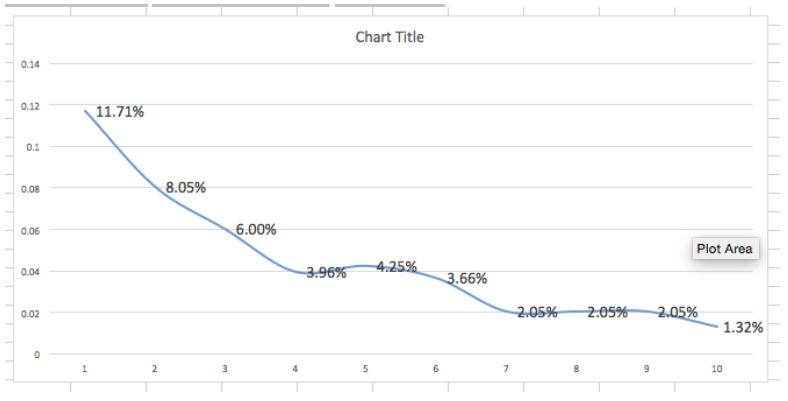

# 3. Project Goal

Build a model with the data provided
1. Data exploration insights – what did you find and what decision did you take?
2. Feature matrix - List of features selected with gain
3. Model evaluation - Gini and rank ordering

# 4. Data

Data Set Fields:

Host: 18.136.56.185

Port: 3306

Username : dm_team1

Password: dm_team1123#

Database : project_banking

<b> 1) Customers Account Table </b>

dt_opened

customer_no

upload_dt

acct_type

owner_indic

opened_dt

last_paymt_dt

closed_dt

reporting_dt

high_credit_amt

cur_balance_amt

amt_past_due

paymenthistory1

paymenthistory2

paymt_str_dt

paymt_end_dt

creditlimit

cashlimit

rateofinterest

paymentfrequency

actualpaymentamount


<b> 2) Enquiry Table </b>

dt_opened

customer_no

upload_dt

enquiry_dt

enq_purpose

enq_amt

<b> 3) Customer Demographics Table </b>

dt_opened

customer no

entry_time

feature_1 t0 feature_79

Bad_label


# 5. Features

The features of the datasets were provided by DataMites company.

# 6. Assumptions

1. Initially data modelling was performed only on Cust_Demographics data as it had the target variable named "Bad_label".

2. Join operation was done on Cust_Account and Cust_Demographics tables and only "Bad_label" column was included in the Cust_Account table after joining.

3. Join operation was done on Cust_Enquiry and Cust_Demographics tables and only "Bad_label" column was included in the Cust_Enquiry table after joining.

4. Machine learning classification algorithms like Random Forest Classifier, Decision Tree Classifier, Extra Trees Classifier, XGBoost Classifier, Gradient Boosting Classifier, and Logistic Regression

5. Used Randomized Search CV and GridSearch CV for hyperparameter estimation.

6. Used SMOTE to handle imbalanced datasets.

7. Used feature engineering to find correlation of all the parameters with respect to Bad label.

## Import the necessary packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder 
from collections import Counter
from matplotlib import pyplot

## Loading the datasets
## 1) Customer Account Data

In [4]:
data1=pd.read_csv("Cust_Account.csv")
data1.head()

Unnamed: 0  dt_opened  customer_no  upload_dt  acct_type  owner_indic  \
0           0  10-Nov-15        12265  20-Oct-15          6            1   
1           1  10-Nov-15        12265  20-Oct-15         10            1   
2           2  10-Nov-15        12265  20-Oct-15         10            1   
3           3  20-Jul-15        15606  09-Jul-15         10            1   
4           4  20-Jul-15        15606  09-Jul-15          6            1   

   opened_dt last_paymt_dt  closed_dt reporting_dt  ...  amt_past_due  \
0  09-Jun-13     30-Jun-14  05-Jul-14    30-Sep-15  ...           NaN   
1  25-May-12     06-Sep-15        NaN    03-Oct-15  ...           NaN   
2  22-Mar-12     31-Aug-15        NaN    30-Sep-15  ...           NaN   
3  13-Jan-06           NaN  26-Jul-07    31-Jan-09  ...           NaN   
4  18-Jan-15     05-May-15        NaN    31-May-15  ...           NaN   

                                     paymenthistory1  \
0  """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1  """0000000000000000000000000000000000000000000...   
2  """0000000000000000000000000000000000000000000...   
3  """1200900600600600300000000000000000000000000...   
4                              """000000000000000"""   

                                     paymenthistory2 paymt_str_dt  \
0                                                NaN    01-Sep-15   
1  """000000000000000000000000000XXX0000000000000...    01-Oct-15   
2  """0000000000000000000000000000000000000000000...    01-Sep-15   
3                                                NaN    01-Jul-07   
4                                                NaN    01-May-15   

  paymt_end_dt creditlimit cashlimit  rateofinterest  paymentfrequency  \
0    01-Jul-14         NaN       NaN             NaN               NaN   
1    01-Nov-12     14000.0    1400.0             NaN               3.0   
2    01-Oct-12         NaN       NaN             NaN               NaN   
3    01-Feb-06         NaN       NaN             NaN               NaN   
4    01-Jan-15         NaN       NaN             NaN               NaN   

  actualpaymentamount  
0                 NaN  
1              5603.0  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 22 columns]

## Checking for the EDA

In [5]:
data1.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [6]:
data1.head()

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0  10-Nov-15        12265  20-Oct-15          6            1  09-Jun-13   
1  10-Nov-15        12265  20-Oct-15         10            1  25-May-12   
2  10-Nov-15        12265  20-Oct-15         10            1  22-Mar-12   
3  20-Jul-15        15606  09-Jul-15         10            1  13-Jan-06   
4  20-Jul-15        15606  09-Jul-15          6            1  18-Jan-15   

  last_paymt_dt  closed_dt reporting_dt  high_credit_amt  ...  amt_past_due  \
0     30-Jun-14  05-Jul-14    30-Sep-15          20900.0  ...           NaN   
1     06-Sep-15        NaN    03-Oct-15          16201.0  ...           NaN   
2     31-Aug-15        NaN    30-Sep-15          41028.0  ...           NaN   
3           NaN  26-Jul-07    31-Jan-09          93473.0  ...           NaN   
4     05-May-15        NaN    31-May-15          20250.0  ...           NaN   

                                     paymenthistory1  \
0  """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1  """0000000000000000000000000000000000000000000...   
2  """0000000000000000000000000000000000000000000...   
3  """1200900600600600300000000000000000000000000...   
4                              """000000000000000"""   

                                     paymenthistory2 paymt_str_dt  \
0                                                NaN    01-Sep-15   
1  """000000000000000000000000000XXX0000000000000...    01-Oct-15   
2  """0000000000000000000000000000000000000000000...    01-Sep-15   
3                                                NaN    01-Jul-07   
4                                                NaN    01-May-15   

  paymt_end_dt creditlimit  cashlimit  rateofinterest paymentfrequency  \
0    01-Jul-14         NaN        NaN             NaN              NaN   
1    01-Nov-12     14000.0     1400.0             NaN              3.0   
2    01-Oct-12         NaN        NaN             NaN              NaN   
3    01-Feb-06         NaN        NaN             NaN              NaN   
4    01-Jan-15         NaN        NaN             NaN              NaN   

   actualpaymentamount  
0                  NaN  
1               5603.0  
2                  NaN  
3                  NaN  
4                  NaN  

[5 rows x 21 columns]

In [7]:
data1.isnull().sum().to_frame()

0
dt_opened                 0
customer_no               0
upload_dt                 0
acct_type                 0
owner_indic               0
opened_dt               455
last_paymt_dt         25487
closed_dt            109075
reporting_dt              0
high_credit_amt        8875
cur_balance_amt           0
amt_past_due         185453
paymenthistory1           0
paymenthistory2      107824
paymt_str_dt              1
paymt_end_dt              1
creditlimit          137477
cashlimit            151047
rateofinterest       161496
paymentfrequency     122436
actualpaymentamount  145276

In [8]:
data1.fillna(method='ffill',inplace=True)

In [9]:
data1.isnull().sum().to_frame().T

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0          0            0          0          0            0          0   

   last_paymt_dt  closed_dt  reporting_dt  high_credit_amt  ...  amt_past_due  \
0              0          0             0                0  ...            93   

   paymenthistory1  paymenthistory2  paymt_str_dt  paymt_end_dt  creditlimit  \
0                0                1             0             0            1   

   cashlimit  rateofinterest  paymentfrequency  actualpaymentamount  
0          1               8                 1                    1  

[1 rows x 21 columns]

In [10]:
data1.fillna(method='bfill',inplace=True)

In [11]:
data1.isnull().sum().to_frame().T

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0          0            0          0          0            0          0   

   last_paymt_dt  closed_dt  reporting_dt  high_credit_amt  ...  amt_past_due  \
0              0          0             0                0  ...             0   

   paymenthistory1  paymenthistory2  paymt_str_dt  paymt_end_dt  creditlimit  \
0                0                0             0             0            0   

   cashlimit  rateofinterest  paymentfrequency  actualpaymentamount  
0          0               0                 0                    0  

[1 rows x 21 columns]

In [12]:
data1.columns

Index(['dt_opened', 'customer_no', 'upload_dt', 'acct_type', 'owner_indic',
       'opened_dt', 'last_paymt_dt', 'closed_dt', 'reporting_dt',
       'high_credit_amt', 'cur_balance_amt', 'amt_past_due', 'paymenthistory1',
       'paymenthistory2', 'paymt_str_dt', 'paymt_end_dt', 'creditlimit',
       'cashlimit', 'rateofinterest', 'paymentfrequency',
       'actualpaymentamount'],
      dtype='object')

In [13]:
data1.dtypes

dt_opened               object
customer_no              int64
upload_dt               object
acct_type                int64
owner_indic              int64
opened_dt               object
last_paymt_dt           object
closed_dt               object
reporting_dt            object
high_credit_amt        float64
cur_balance_amt          int64
amt_past_due           float64
paymenthistory1         object
paymenthistory2         object
paymt_str_dt            object
paymt_end_dt            object
creditlimit            float64
cashlimit              float64
rateofinterest          object
paymentfrequency       float64
actualpaymentamount    float64
dtype: object

In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_opened            186329 non-null  object 
 1   customer_no          186329 non-null  int64  
 2   upload_dt            186329 non-null  object 
 3   acct_type            186329 non-null  int64  
 4   owner_indic          186329 non-null  int64  
 5   opened_dt            186329 non-null  object 
 6   last_paymt_dt        186329 non-null  object 
 7   closed_dt            186329 non-null  object 
 8   reporting_dt         186329 non-null  object 
 9   high_credit_amt      186329 non-null  float64
 10  cur_balance_amt      186329 non-null  int64  
 11  amt_past_due         186329 non-null  float64
 12  paymenthistory1      186329 non-null  object 
 13  paymenthistory2      186329 non-null  object 
 14  paymt_str_dt         186329 non-null  object 
 15  paymt_end_dt     

In [15]:
data1.describe()

customer_no      acct_type    owner_indic  high_credit_amt  \
count  186329.000000  186329.000000  186329.000000     1.863290e+05   
mean    11431.820447       8.403104       1.122128     1.802378e+05   
std      6730.432139       5.179466       0.567040     9.975305e+05   
min         1.000000       0.000000       1.000000     1.000000e+00   
25%      5879.000000       6.000000       1.000000     2.289800e+04   
50%     11169.000000      10.000000       1.000000     4.542400e+04   
75%     16982.000000      10.000000       1.000000     1.074590e+05   
max     23896.000000      59.000000       4.000000     1.800000e+08   

       cur_balance_amt  amt_past_due   creditlimit       cashlimit  \
count     1.863290e+05  1.863290e+05  1.863290e+05   186329.000000   
mean      7.640269e+04  1.837156e+04  7.463652e+04    20429.387481   
std       6.186783e+05  1.143562e+05  7.079296e+04    24196.013211   
min      -7.355205e+06  1.000000e+00  1.000000e+00        1.000000   
25%       0.000000e+00  1.790000e+02  3.100000e+04     7200.000000   
50%       0.000000e+00  1.378000e+03  5.800000e+04    12600.000000   
75%       2.099800e+04  8.248000e+03  9.900000e+04    27000.000000   
max       1.360100e+08  4.869309e+06  2.500000e+06  1000000.000000   

       paymentfrequency  actualpaymentamount  
count     186329.000000         1.863290e+05  
mean           2.995674         2.949781e+04  
std            0.092912         2.266878e+05  
min            1.000000         1.000000e+00  
25%            3.000000         3.205000e+03  
50%            3.000000         8.000000e+03  
75%            3.000000         1.881700e+04  
max            3.000000         6.785322e+07

In [16]:
data1.size

3912909

In [17]:
data1.index

RangeIndex(start=0, stop=186329, step=1)

In [18]:
data1.duplicated().sum()

1538

In [19]:
Counter(data1.paymenthistory1)

Counter({'"""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXSTD"""': 2,
         '"""000000000000000000000000000000000000000000000000000000"""': 44979,
         '"""120090060060060030000000000000000000000000000000000000"""': 1,
         '"""000000000000000"""': 3654,
         '"""000000000000000000"""': 3676,
         '"""000000000000000000000000"""': 3642,
         '"""000000000XXX000000000000030XXX000000000000000000000000"""': 1,
         '"""000900900900900900900888857829798767737706676645614584"""': 1,
         '"""000"""': 12550,
         '"""000017000"""': 1,
         '"""XXX"""': 6489,
         '"""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"""': 584,
         '"""000000"""': 5163,
         '"""STDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTDSTD"""': 1645,
         '"""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"""': 2246,
         '"""000000000000000000000000000"""': 3916,
         '"""000000000000"""': 4138,
         '"""000000000000000000000000000000000000

In [20]:
Counter(data1.paymenthistory2)

Counter({'"""000000000000000000000000000XXX000000000000000000000000"""': 507,
         '"""000000000000000000000000000000000000000000000000000000"""': 44844,
         '"""000000000000000000000000000000000000"""': 2517,
         '"""030000000000XXX000000000000000000000000XXX000000000"""': 1,
         '"""553523492464433402372XXX311280249219188158127099XXX007"""': 5,
         '"""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXSTDSTDSTDSTDSTDSTDSTDSTD"""': 10,
         '"""XXXSTD"""': 156,
         '"""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"""': 9375,
         '"""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"""': 24,
         '"""STD"""': 855,
         '"""XXX000000000000000000000000000000000000000000000000000"""': 387,
         '"""000000000000000000000"""': 4640,
         '"""000000000000000000000000000000000000000000000"""': 2018,
         '"""000000000000000000000000000000000000000000000000000XXX"""': 509,
         '"""000000XXX000000XXX000XXX000000000XXXXXX000000000000000"""': 

In [21]:
Counter(data1.owner_indic)

Counter({1: 177287, 4: 6253, 2: 1581, 3: 1208})

In [22]:
Counter(data1.customer_no)

Counter({12265: 3,
         15606: 14,
         11742: 5,
         12379: 54,
         17744: 8,
         370: 9,
         14707: 5,
         5802: 5,
         6218: 9,
         20797: 11,
         4901: 6,
         19312: 28,
         810: 10,
         13081: 4,
         11240: 8,
         16592: 15,
         19597: 1,
         22014: 4,
         11399: 19,
         354: 9,
         2323: 13,
         9891: 13,
         20098: 2,
         15723: 4,
         7645: 2,
         7748: 7,
         3203: 4,
         11865: 8,
         1388: 23,
         5403: 3,
         3122: 3,
         9180: 3,
         18529: 8,
         18855: 44,
         16164: 4,
         4920: 18,
         5353: 16,
         3201: 4,
         14485: 2,
         15408: 2,
         18497: 4,
         10765: 11,
         23435: 7,
         5920: 4,
         4064: 5,
         8471: 3,
         9164: 6,
         13676: 9,
         14501: 5,
         8441: 11,
         9556: 14,
         7824: 6,
         883: 12,
      

In [23]:
Counter(data1.acct_type)

Counter({6: 25664,
         10: 100239,
         1: 9427,
         13: 8569,
         0: 3944,
         5: 22921,
         7: 4256,
         12: 1196,
         51: 732,
         2: 5639,
         3: 672,
         32: 744,
         15: 519,
         8: 407,
         52: 97,
         4: 188,
         56: 8,
         17: 453,
         53: 386,
         54: 73,
         35: 54,
         9: 53,
         34: 5,
         11: 4,
         59: 22,
         33: 5,
         14: 5,
         31: 27,
         55: 17,
         16: 2,
         57: 1})

## 2) Customer Demographics Data

In [24]:
data2=pd.read_csv("Cust_Demographics.csv")
data2.head()

Unnamed: 0  dt_opened  customer_no entry_time feature_1  feature_2  \
0           0  18-Apr-15            1  13-Apr-15  Insignia  13-Apr-15   
1           1  21-Apr-15            2  21-Apr-15  Insignia  21-Apr-15   
2           2  22-Apr-15            3  21-Apr-15  Insignia  21-Apr-15   
3           3  25-Apr-15            4  15-Apr-15  Insignia  20-Apr-15   
4           4  06-May-15            5  30-Apr-15  Insignia        NaN   

   feature_3  feature_4   feature_5  feature_6  ...  feature_71 feature_72  \
0      650.0        2.0  Card Setup       14.0  ...        21.0          R   
1      760.0        1.0  Card Setup       14.0  ...        17.0          R   
2      774.0        1.0  Card Setup       14.0  ...        17.0          R   
3      770.0        1.0  Card Setup       14.0  ...        21.0          R   
4        NaN        3.0  Card Setup       14.0  ...        13.0          R   

  feature_73 feature_74  feature_75 feature_76  feature_77  feature_78  \
0        NaN        NaN  0000-00-00        0.0  98332XXXXX         1.0   
1        NaN        NaN  0000-00-00        0.0  99455XXXXX         1.0   
2        NaN        NaN  0000-00-00        0.0  98456XXXXX         1.0   
3        NaN        NaN     6/15/65        1.0  98220XXXXX         1.0   
4        NaN        NaN  0000-00-00        0.0  98111XXXXX         1.0   

  feature_79 Bad_label  
0          N         0  
1          N         0  
2          N         0  
3          N         0  
4          N         0  

[5 rows x 84 columns]

## Checking for the EDA

In [25]:
data2.columns

Index(['Unnamed: 0', 'dt_opened', 'customer_no', 'entry_time', 'feature_1',
       'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6',
       'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21',
       'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26',
       'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31',
       'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36',
       'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41',
       'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46',
       'feature_47', 'feature_48', 'feature_49', 'feature_50', 'feature_51',
       'feature_52', 'feature_53', 'feature_54', 'feature_55', 'feature_56',
       'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_61',
       '

In [26]:
data2.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [27]:
data2.head()

dt_opened  customer_no entry_time feature_1  feature_2  feature_3  \
0  18-Apr-15            1  13-Apr-15  Insignia  13-Apr-15      650.0   
1  21-Apr-15            2  21-Apr-15  Insignia  21-Apr-15      760.0   
2  22-Apr-15            3  21-Apr-15  Insignia  21-Apr-15      774.0   
3  25-Apr-15            4  15-Apr-15  Insignia  20-Apr-15      770.0   
4  06-May-15            5  30-Apr-15  Insignia        NaN        NaN   

   feature_4   feature_5  feature_6  feature_7  ... feature_71 feature_72  \
0        2.0  Card Setup       14.0   500000.0  ...       21.0          R   
1        1.0  Card Setup       14.0  1200000.0  ...       17.0          R   
2        1.0  Card Setup       14.0   700000.0  ...       17.0          R   
3        1.0  Card Setup       14.0   500000.0  ...       21.0          R   
4        3.0  Card Setup       14.0   500000.0  ...       13.0          R   

  feature_73 feature_74  feature_75 feature_76  feature_77 feature_78  \
0        NaN        NaN  0000-00-00        0.0  98332XXXXX        1.0   
1        NaN        NaN  0000-00-00        0.0  99455XXXXX        1.0   
2        NaN        NaN  0000-00-00        0.0  98456XXXXX        1.0   
3        NaN        NaN     6/15/65        1.0  98220XXXXX        1.0   
4        NaN        NaN  0000-00-00        0.0  98111XXXXX        1.0   

  feature_79 Bad_label  
0          N         0  
1          N         0  
2          N         0  
3          N         0  
4          N         0  

[5 rows x 83 columns]

In [28]:
data2.isnull().sum().to_frame().T

dt_opened  customer_no  entry_time  feature_1  feature_2  feature_3  \
0          0            0          15         15       2836       2836   

   feature_4  feature_5  feature_6  feature_7  ...  feature_71  feature_72  \
0         15         15         15         15  ...          15          15   

   feature_73  feature_74  feature_75  feature_76  feature_77  feature_78  \
0       20951       23879          15          15           0          15   

   feature_79  Bad_label  
0          15          0  

[1 rows x 83 columns]

In [29]:
data2.fillna(method='ffill',inplace=True)

In [30]:
data2.isnull().sum().to_frame().T

dt_opened  customer_no  entry_time  feature_1  feature_2  feature_3  \
0          0            0           0          0          0          0   

   feature_4  feature_5  feature_6  feature_7  ...  feature_71  feature_72  \
0          0          0          0          0  ...           0           0   

   feature_73  feature_74  feature_75  feature_76  feature_77  feature_78  \
0          57         125           0           0           0           0   

   feature_79  Bad_label  
0           0          0  

[1 rows x 83 columns]

In [31]:
data2.fillna(method='bfill',inplace=True)

In [32]:
data2.isnull().sum().to_frame().T

dt_opened  customer_no  entry_time  feature_1  feature_2  feature_3  \
0          0            0           0          0          0          0   

   feature_4  feature_5  feature_6  feature_7  ...  feature_71  feature_72  \
0          0          0          0          0  ...           0           0   

   feature_73  feature_74  feature_75  feature_76  feature_77  feature_78  \
0           0           0           0           0           0           0   

   feature_79  Bad_label  
0           0          0  

[1 rows x 83 columns]

In [33]:
data2.shape

(23896, 83)

In [34]:
data2.size

1983368

In [35]:
data2.describe()

customer_no     feature_3     feature_4  feature_6     feature_7  \
count  23896.000000  23896.000000  23896.000000    23896.0  2.389600e+04   
mean   11948.500000    723.324197      2.321476       14.0  1.190880e+05   
std     6898.325352     37.488767      0.892892        0.0  7.753044e+04   
min        1.000000     -1.000000      1.000000       14.0  0.000000e+00   
25%     5974.750000    698.000000      1.000000       14.0  7.200000e+04   
50%    11948.500000    721.000000      3.000000       14.0  1.040000e+05   
75%    17922.250000    745.000000      3.000000       14.0  1.390000e+05   
max    23896.000000    896.000000      3.000000       14.0  1.217000e+06   

         feature_14    feature_19    feature_25    feature_26     feature_29  \
count  23896.000000  23896.000000  23896.000000  23896.000000   23896.000000   
mean       5.784566      1.049422      1.233972      0.725896  217725.278038   
std        5.996257      0.216753      0.423364      1.125158  159343.209227   
min        0.000000      1.000000      1.000000      0.000000  110001.000000   
25%        0.000000      1.000000      1.000000      0.000000  110051.000000   
50%        0.000000      1.000000      1.000000      0.000000  110094.000000   
75%       12.000000      1.000000      1.000000      2.000000  390002.000000   
max       12.000000      2.000000      2.000000     10.000000  712245.000000   

       ...    feature_65     feature_66    feature_67    feature_68  \
count  ...  23896.000000   23896.000000  23896.000000  23896.000000   
mean   ...    157.608344  264449.721836      0.184257      1.238785   
std    ...    191.028110  202017.016219      0.387702      0.429966   
min    ...      1.000000  110001.000000      0.000000      1.000000   
25%    ...     39.000000  110059.000000      0.000000      1.000000   
50%    ...    157.000000  122015.000000      0.000000      1.000000   
75%    ...    157.000000  400601.000000      0.000000      1.000000   
max    ...  10008.000000  874401.000000      1.000000      3.000000   

         feature_69    feature_71    feature_74    feature_76    feature_78  \
count  2.389600e+04  23896.000000  23896.000000  23896.000000  23896.000000   
mean   3.279411e+04     14.540551      2.524983      0.003850      1.043229   
std    1.087543e+05      9.079594      0.611568      0.084259      0.224689   
min    1.000000e+00      2.000000      2.000000      0.000000      1.000000   
25%    1.000000e+00     10.000000      2.000000      0.000000      1.000000   
50%    3.000000e+04     10.000000      2.000000      0.000000      1.000000   
75%    4.300000e+04     17.000000      3.000000      0.000000      1.000000   
max    1.500000e+07     35.000000      4.000000      4.000000      3.000000   

          Bad_label  
count  23896.000000  
mean       0.042015  
std        0.200628  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 34 columns]

In [36]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 83 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt_opened    23896 non-null  object 
 1   customer_no  23896 non-null  int64  
 2   entry_time   23896 non-null  object 
 3   feature_1    23896 non-null  object 
 4   feature_2    23896 non-null  object 
 5   feature_3    23896 non-null  float64
 6   feature_4    23896 non-null  float64
 7   feature_5    23896 non-null  object 
 8   feature_6    23896 non-null  float64
 9   feature_7    23896 non-null  float64
 10  feature_8    23896 non-null  object 
 11  feature_9    23896 non-null  object 
 12  feature_10   23896 non-null  object 
 13  feature_11   23896 non-null  object 
 14  feature_12   23896 non-null  object 
 15  feature_13   23896 non-null  object 
 16  feature_14   23896 non-null  float64
 17  feature_15   23896 non-null  object 
 18  feature_16   23896 non-null  object 
 19  feat

In [37]:
data2.fillna(method='ffill',inplace=True)

In [38]:
data2.columns

Index(['dt_opened', 'customer_no', 'entry_time', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12',
       'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
       'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22',
       'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27',
       'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32',
       'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37',
       'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42',
       'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47',
       'feature_48', 'feature_49', 'feature_50', 'feature_51', 'feature_52',
       'feature_53', 'feature_54', 'feature_55', 'feature_56', 'feature_57',
       'feature_58', 'feature_59', 'feature_60', 'feature_61', 'feature_62',
       '

In [39]:
data2.dtypes

dt_opened       object
customer_no      int64
entry_time      object
feature_1       object
feature_2       object
                ...   
feature_76     float64
feature_77      object
feature_78     float64
feature_79      object
Bad_label        int64
Length: 83, dtype: object

In [40]:
data2.size

1983368

In [41]:
data2.isna().sum().to_frame()

0
dt_opened    0
customer_no  0
entry_time   0
feature_1    0
feature_2    0
...         ..
feature_76   0
feature_77   0
feature_78   0
feature_79   0
Bad_label    0

[83 rows x 1 columns]

In [42]:
data2.head()

dt_opened  customer_no entry_time feature_1  feature_2  feature_3  \
0  18-Apr-15            1  13-Apr-15  Insignia  13-Apr-15      650.0   
1  21-Apr-15            2  21-Apr-15  Insignia  21-Apr-15      760.0   
2  22-Apr-15            3  21-Apr-15  Insignia  21-Apr-15      774.0   
3  25-Apr-15            4  15-Apr-15  Insignia  20-Apr-15      770.0   
4  06-May-15            5  30-Apr-15  Insignia  20-Apr-15      770.0   

   feature_4   feature_5  feature_6  feature_7  ... feature_71 feature_72  \
0        2.0  Card Setup       14.0   500000.0  ...       21.0          R   
1        1.0  Card Setup       14.0  1200000.0  ...       17.0          R   
2        1.0  Card Setup       14.0   700000.0  ...       17.0          R   
3        1.0  Card Setup       14.0   500000.0  ...       21.0          R   
4        3.0  Card Setup       14.0   500000.0  ...       13.0          R   

  feature_73 feature_74  feature_75 feature_76  feature_77 feature_78  \
0          Y        3.0  0000-00-00        0.0  98332XXXXX        1.0   
1          Y        3.0  0000-00-00        0.0  99455XXXXX        1.0   
2          Y        3.0  0000-00-00        0.0  98456XXXXX        1.0   
3          Y        3.0     6/15/65        1.0  98220XXXXX        1.0   
4          Y        3.0  0000-00-00        0.0  98111XXXXX        1.0   

  feature_79 Bad_label  
0          N         0  
1          N         0  
2          N         0  
3          N         0  
4          N         0  

[5 rows x 83 columns]

## 3) Customer Enquiry Data

In [43]:
data3=pd.read_csv("Cust_Enquiry.csv")
data3.head()

Unnamed: 0  dt_opened  customer_no  upload_dt enquiry_dt  enq_purpose  \
0           0  18-Apr-15            1  21-Apr-15  19-Dec-14          2.0   
1           1  18-Apr-15            1  21-Apr-15  05-Mar-14          5.0   
2           2  18-Apr-15            1  21-Apr-15  05-Mar-14          0.0   
3           3  18-Apr-15            1  21-Apr-15  22-Feb-14         10.0   
4           4  18-Apr-15            1  21-Apr-15  11-Jun-13         10.0   

     enq_amt  
0  3500000.0  
1   500000.0  
2    50000.0  
3    50000.0  
4     1000.0

## Checking for the EDA

In [44]:
data3.columns

Index(['Unnamed: 0', 'dt_opened', 'customer_no', 'upload_dt', 'enquiry_dt',
       'enq_purpose', 'enq_amt'],
      dtype='object')

In [45]:
data3.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [46]:
data3.head()

dt_opened  customer_no  upload_dt enquiry_dt  enq_purpose    enq_amt
0  18-Apr-15            1  21-Apr-15  19-Dec-14          2.0  3500000.0
1  18-Apr-15            1  21-Apr-15  05-Mar-14          5.0   500000.0
2  18-Apr-15            1  21-Apr-15  05-Mar-14          0.0    50000.0
3  18-Apr-15            1  21-Apr-15  22-Feb-14         10.0    50000.0
4  18-Apr-15            1  21-Apr-15  11-Jun-13         10.0     1000.0

In [47]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413188 entries, 0 to 413187
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt_opened    413188 non-null  object 
 1   customer_no  413188 non-null  int64  
 2   upload_dt    413078 non-null  object 
 3   enquiry_dt   413078 non-null  object 
 4   enq_purpose  413078 non-null  float64
 5   enq_amt      413078 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [48]:
data3.describe()

customer_no    enq_purpose       enq_amt
count  413188.000000  413078.000000  4.130780e+05
mean    11399.813414       8.154804  8.289094e+05
std      6672.675047       5.637857  1.204328e+07
min         1.000000       0.000000  1.000000e+00
25%      5999.000000       5.000000  1.000000e+04
50%     11067.000000      10.000000  5.000000e+04
75%     16856.000000      10.000000  1.430000e+05
max     23896.000000      59.000000  1.000000e+09

In [49]:
data3.columns

Index(['dt_opened', 'customer_no', 'upload_dt', 'enquiry_dt', 'enq_purpose',
       'enq_amt'],
      dtype='object')

In [50]:
data3.dtypes

dt_opened       object
customer_no      int64
upload_dt       object
enquiry_dt      object
enq_purpose    float64
enq_amt        float64
dtype: object

In [51]:
data3.shape

(413188, 6)

In [52]:
data3.size

2479128

In [53]:
data3.isna().sum().to_frame()

0
dt_opened      0
customer_no    0
upload_dt    110
enquiry_dt   110
enq_purpose  110
enq_amt      110

In [54]:
data3.fillna(method='ffill',inplace=True)

In [55]:
data3.isna().sum().to_frame()

0
dt_opened    0
customer_no  0
upload_dt    0
enquiry_dt   0
enq_purpose  0
enq_amt      0

In [56]:
data3.shape

(413188, 6)

In [57]:
data3.size

2479128

## Checking for the Outliers

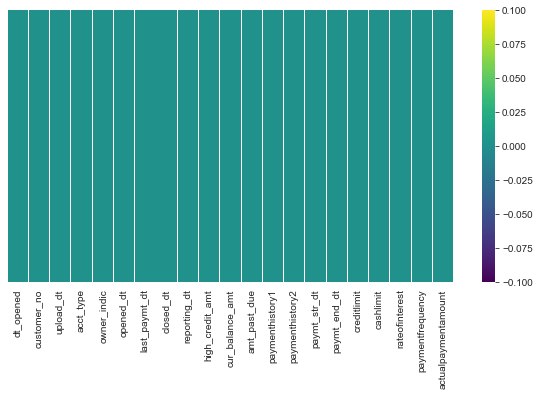

In [58]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data1.isnull(),yticklabels=False,cbar=True,cmap='viridis')

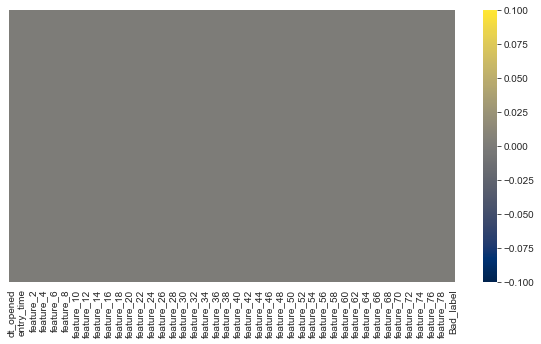

In [59]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data2.isnull(),yticklabels=False,cbar=True,cmap='cividis')

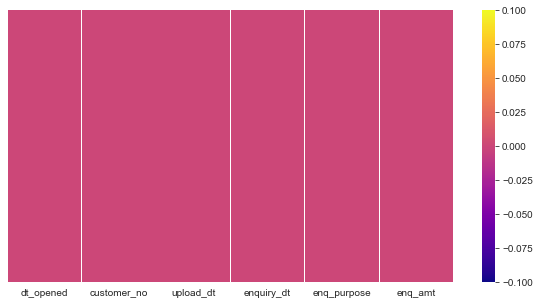

In [60]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data3.isnull(),yticklabels=False,cbar=True,cmap='plasma')

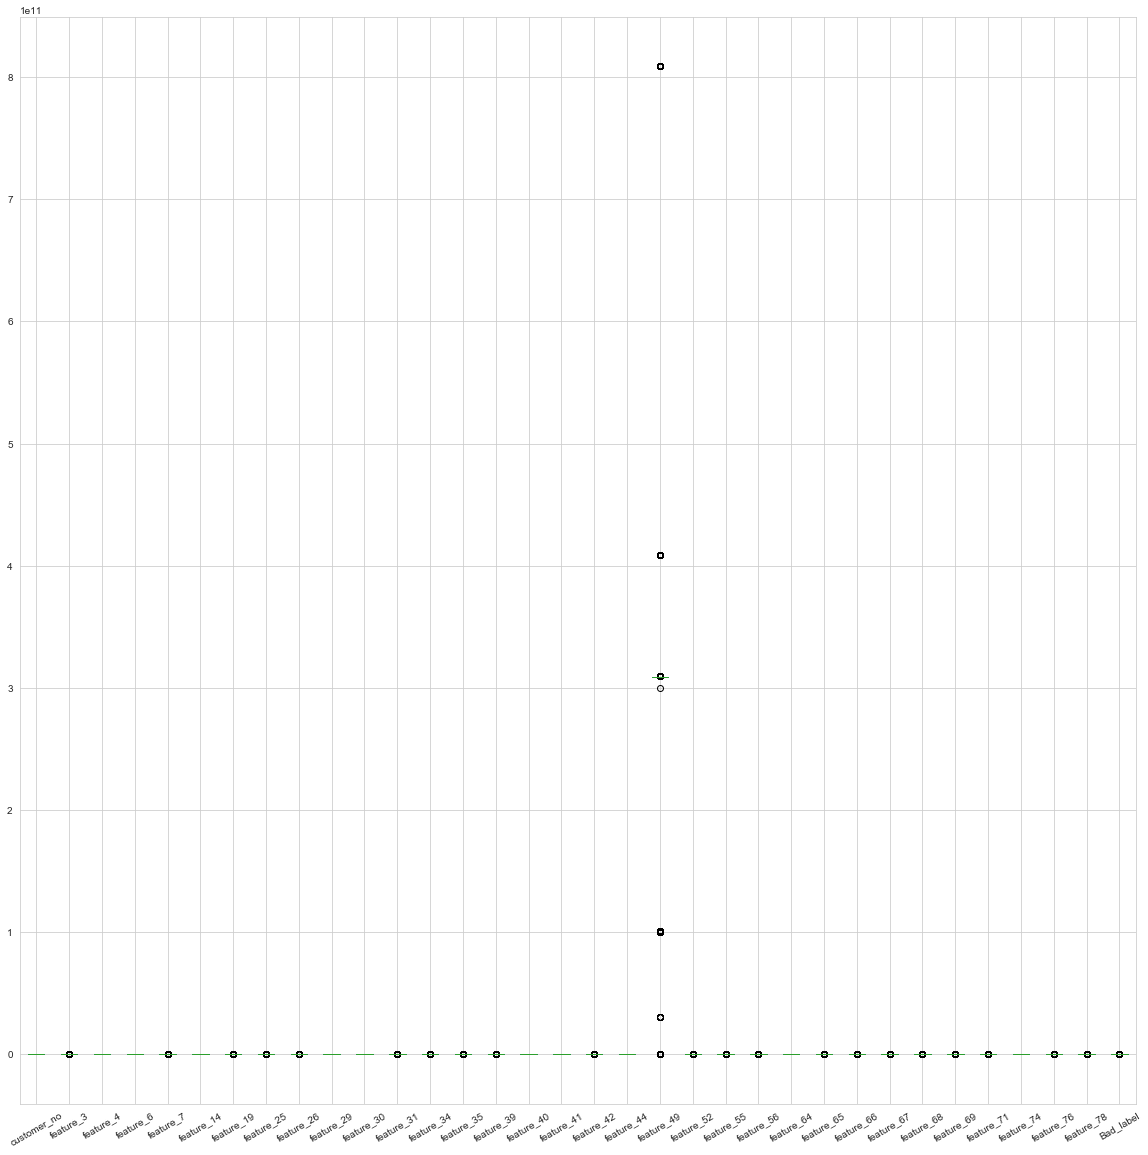

In [61]:
data2.boxplot(figsize=(20,20),rot=30);

In [62]:
Counter(data2.customer_no)

Counter({1: 1,
         2: 1,
         3: 1,
         4: 1,
         5: 1,
         6: 1,
         7: 1,
         8: 1,
         9: 1,
         10: 1,
         11: 1,
         12: 1,
         13: 1,
         14: 1,
         15: 1,
         16: 1,
         17: 1,
         18: 1,
         19: 1,
         20: 1,
         21: 1,
         22: 1,
         23: 1,
         24: 1,
         25: 1,
         26: 1,
         27: 1,
         28: 1,
         29: 1,
         30: 1,
         31: 1,
         32: 1,
         33: 1,
         34: 1,
         35: 1,
         36: 1,
         37: 1,
         38: 1,
         39: 1,
         40: 1,
         41: 1,
         42: 1,
         43: 1,
         44: 1,
         45: 1,
         46: 1,
         47: 1,
         48: 1,
         49: 1,
         50: 1,
         51: 1,
         52: 1,
         53: 1,
         54: 1,
         55: 1,
         56: 1,
         57: 1,
         58: 1,
         59: 1,
         60: 1,
         61: 1,
         62: 1,
         63: 1,
 

In [63]:
Counter(data2.entry_time)

Counter({'13-Apr-15': 106,
         '21-Apr-15': 103,
         '15-Apr-15': 109,
         '30-Apr-15': 86,
         '06-May-15': 81,
         '15-May-15': 89,
         '27-May-15': 80,
         '28-May-15': 74,
         '02-Jun-15': 70,
         '23-May-15': 90,
         '17-Jun-15': 99,
         '26-Jun-15': 121,
         '30-Jun-15': 131,
         '02-Jul-15': 109,
         '20-Jul-15': 101,
         '01-Jul-15': 107,
         '25-Jul-15': 120,
         '29-Jul-15': 111,
         '27-Jul-15': 102,
         '31-Jul-15': 97,
         '23-Jul-15': 114,
         '07-Aug-15': 172,
         '17-Aug-15': 117,
         '26-Aug-15': 143,
         '25-Aug-15': 150,
         '21-Aug-15': 108,
         '24-Aug-15': 130,
         '27-Aug-15': 145,
         '01-Sep-15': 132,
         '08-Sep-15': 131,
         '14-Sep-15': 117,
         '16-Sep-15': 121,
         '24-Sep-15': 165,
         '20-Aug-15': 117,
         '21-Sep-15': 124,
         '25-Sep-15': 130,
         '12-Mar-15': 2,
         '21

In [64]:
Counter(data2.dt_opened)

Counter({'18-Apr-15': 1,
         '21-Apr-15': 1,
         '22-Apr-15': 4,
         '25-Apr-15': 16,
         '06-May-15': 46,
         '12-May-15': 38,
         '22-May-15': 61,
         '28-May-15': 52,
         '30-May-15': 42,
         '01-Jun-15': 166,
         '04-Jun-15': 88,
         '05-Jun-15': 97,
         '19-Jun-15': 88,
         '30-Jun-15': 123,
         '02-Jul-15': 101,
         '06-Jul-15': 153,
         '22-Jul-15': 89,
         '27-Jul-15': 114,
         '29-Jul-15': 131,
         '31-Jul-15': 113,
         '05-Aug-15': 177,
         '07-Aug-15': 139,
         '11-Aug-15': 104,
         '17-Jul-15': 148,
         '22-Aug-15': 106,
         '26-Aug-15': 77,
         '28-Aug-15': 106,
         '29-Aug-15': 103,
         '09-Sep-15': 97,
         '10-Sep-15': 137,
         '14-Sep-15': 169,
         '15-Sep-15': 70,
         '19-Sep-15': 124,
         '24-Sep-15': 176,
         '05-Oct-15': 114,
         '06-Oct-15': 188,
         '09-Oct-15': 118,
         '29-Oct-15'

In [65]:
Counter(data2.Bad_label)

Counter({0: 22892, 1: 1004})

## Data Exploration Insights

In [66]:
from scipy import stats

In [67]:
dt_open=data2.groupby(by=['Bad_label'])['customer_no'].mean()
dt_open

Bad_label
0    11950.917569
1    11893.377490
Name: customer_no, dtype: float64

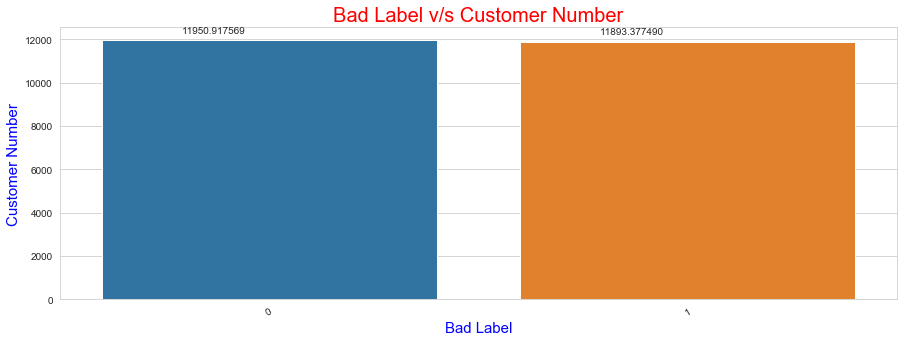

In [68]:
plt.figure(figsize=(15,5))
splot=sns.barplot(data2['Bad_label'],data2['customer_no'],ci=None)
plt.xticks(rotation=30)
plt.xlabel("Bad Label",fontsize=15,color='blue')
plt.ylabel("Customer Number",fontsize=15,color='blue')
plt.title("Bad Label v/s Customer Number",fontdict={'fontsize':20,'color':'Red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Text(0.5, 1.0, 'Count of Opened Date')

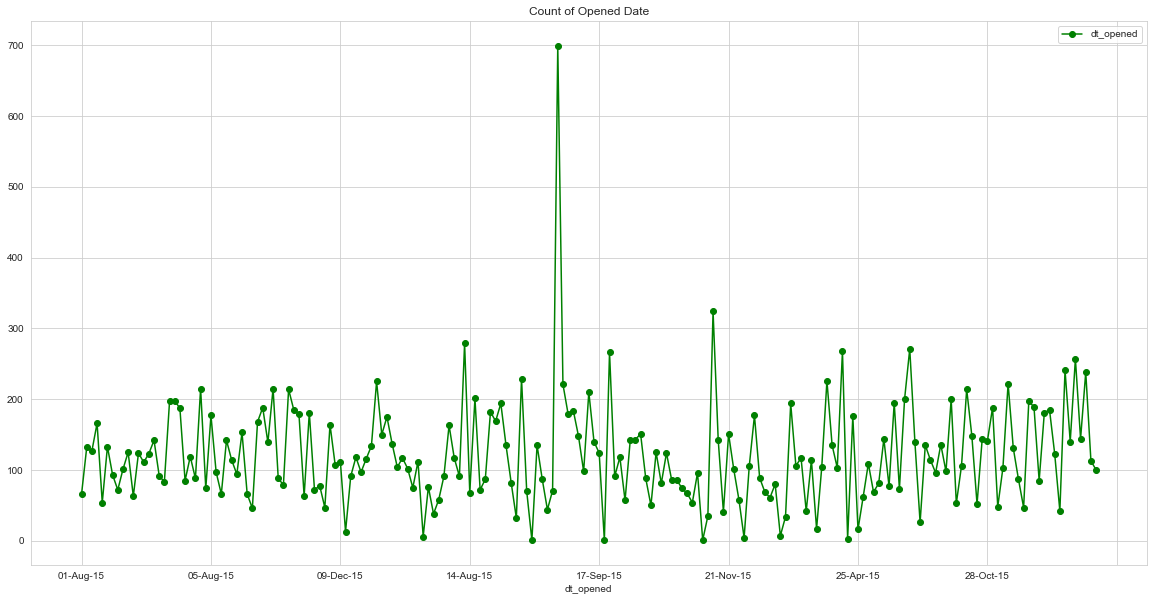

In [69]:
Cust_demo=data2.groupby(['dt_opened'])['dt_opened'].count().to_frame()
Cust_demo.plot(kind='line',figsize=[20,10],color='green',marker='o')
plt.title("Count of Opened Date")

Text(0.5, 1.0, 'Count of Entry Time')

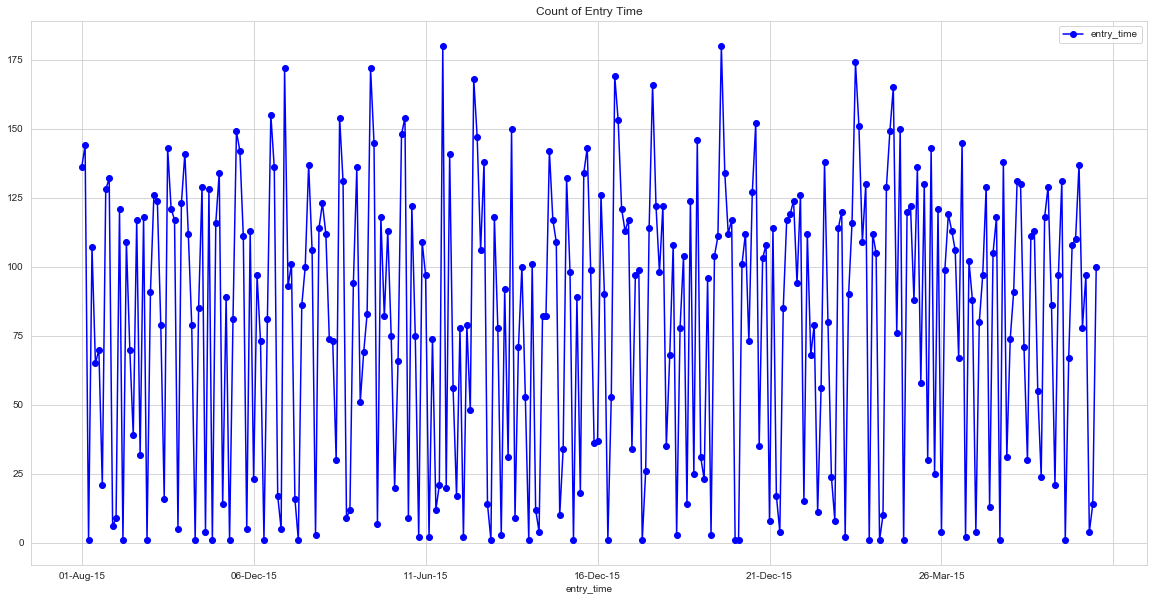

In [70]:
Cust_demo=data2.groupby(['entry_time'])['entry_time'].count().to_frame()
Cust_demo.plot(kind='line',figsize=[20,10],color='blue',marker='o')
plt.title("Count of Entry Time")

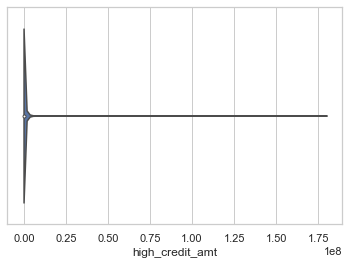

In [71]:
import seaborn as sns
sns.set(style='whitegrid')
ax=sns.violinplot(x=data1['high_credit_amt'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

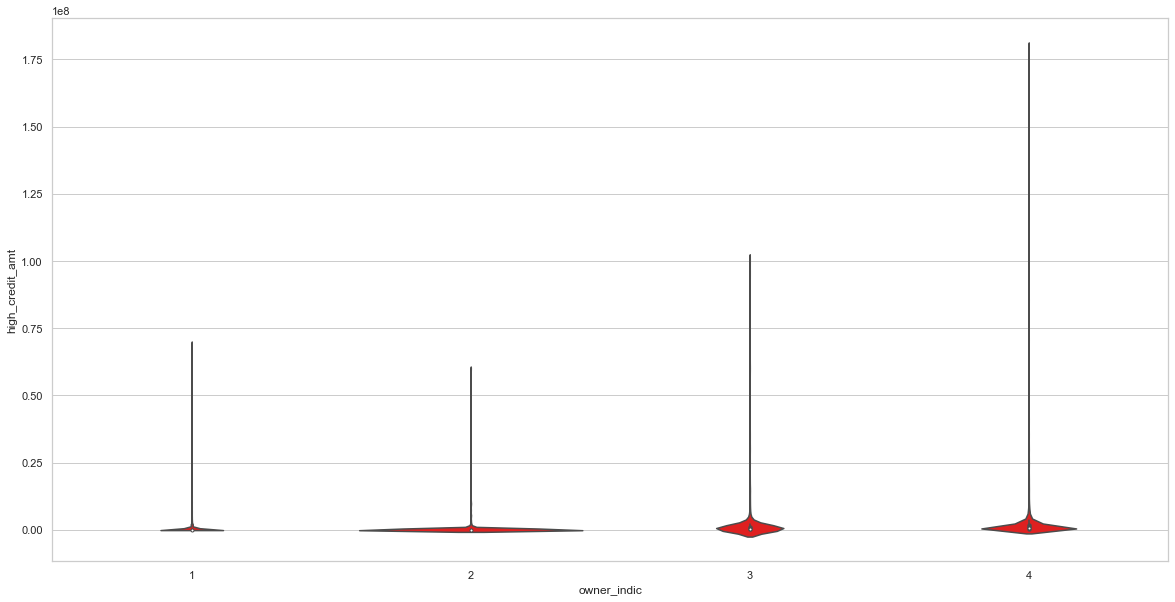

In [72]:
plt.figure(figsize=(20,10))
ax=sns.violinplot(x='owner_indic',y='high_credit_amt',data=data1,color='red')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

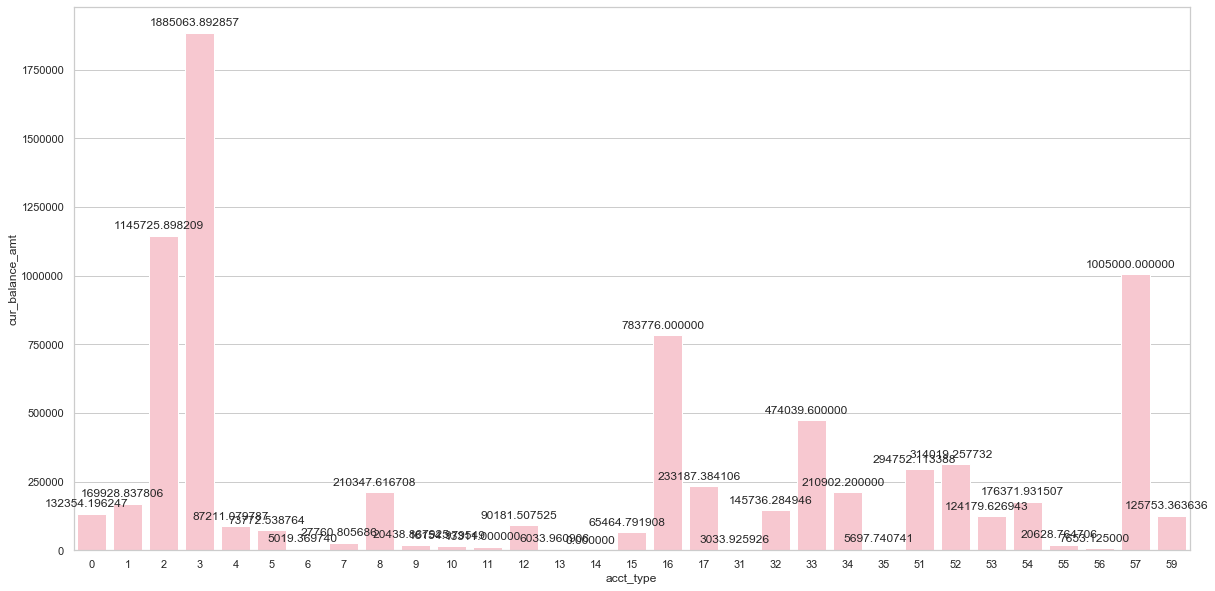

In [73]:
plt.figure(figsize=(20,10))
splot=sns.barplot(x='acct_type',y='cur_balance_amt',data=data1,color='pink',ci=None)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [74]:
data3['customer_no'].value_counts()

10076    308
6775     254
6147     246
11922    214
12736    176
        ... 
522        1
18448      1
18802      1
21060      1
3648       1
Name: customer_no, Length: 23896, dtype: int64

In [75]:
data3['customer_no'].value_counts().index[:10]

Int64Index([10076, 6775, 6147, 11922, 12736, 8770, 22677, 6397, 10043, 16124], dtype='int64')

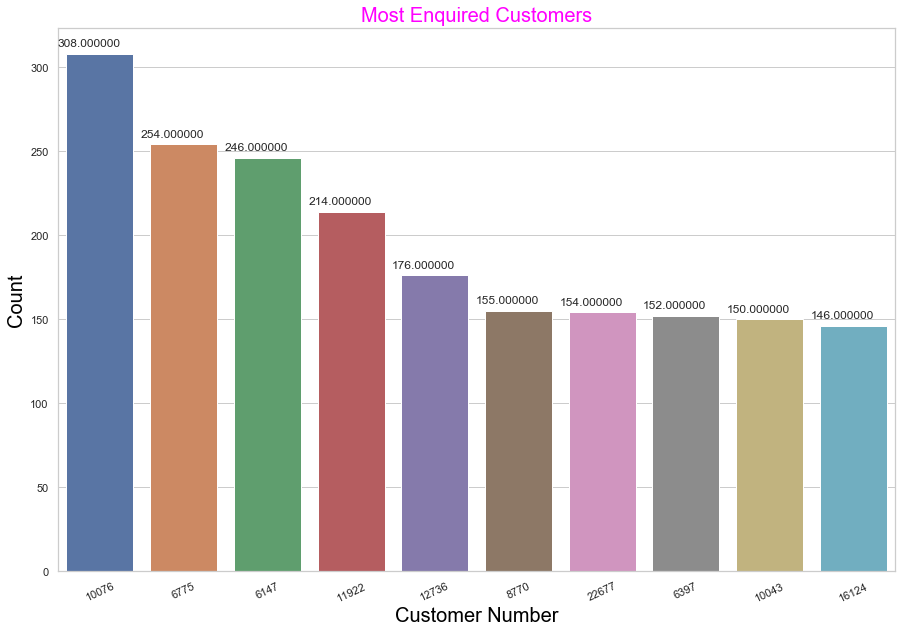

In [76]:
plt.figure(figsize=(15,10))
sns.set(style='whitegrid')
splot=sns.countplot(data3['customer_no'],order=data3['customer_no'].value_counts().index[:10])
plt.xticks(rotation=25)
plt.xlabel('Customer Number',fontsize=20,color='black')
plt.ylabel('Count',fontsize=20,color='black')
plt.title("Most Enquired Customers",fontdict={'fontsize':20,'color':'magenta'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [77]:
data3['enq_purpose'].value_counts().index[:10]

Float64Index([10.0, 5.0, 1.0, 6.0, 2.0, 0.0, 13.0, 51.0, 3.0, 7.0], dtype='float64')

In [78]:
data3['enq_purpose'].value_counts()

10.0    238220
5.0      81889
1.0      23713
6.0      17431
2.0      15583
0.0      15051
13.0     11191
51.0      3942
3.0       1728
7.0       1351
12.0      1000
8.0        563
17.0       410
4.0        280
32.0       170
54.0       154
52.0       130
14.0        95
53.0        72
9.0         51
40.0        22
35.0        19
59.0        15
33.0        14
15.0        13
11.0        13
56.0        13
55.0        12
57.0        10
41.0         7
43.0         6
58.0         6
36.0         6
31.0         3
34.0         3
16.0         2
Name: enq_purpose, dtype: int64

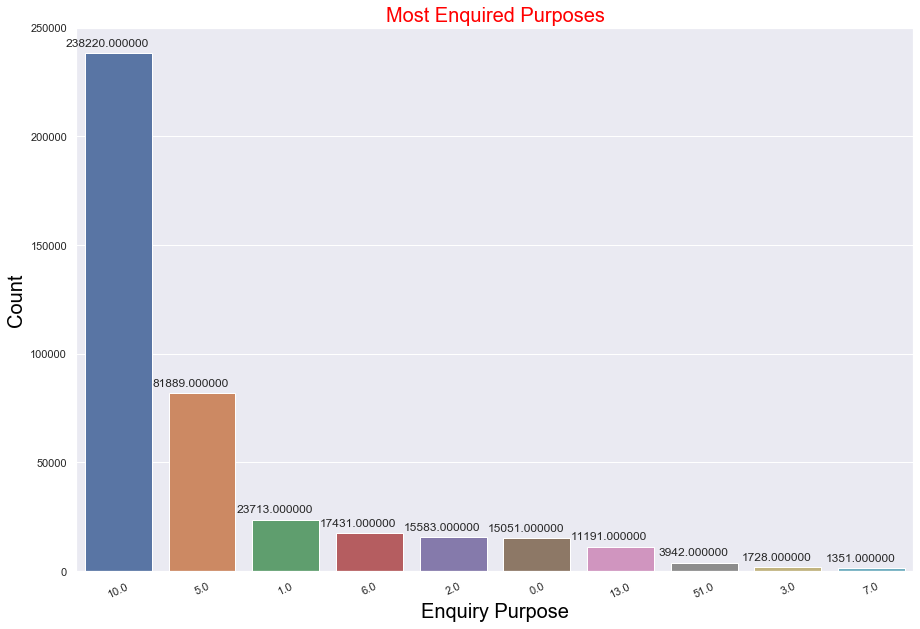

In [79]:
plt.figure(figsize=(15,10))
sns.set(style='darkgrid')
splot=sns.countplot(data3['enq_purpose'],order=data3['enq_purpose'].value_counts().index[:10])
plt.xticks(rotation=25)
plt.xlabel('Enquiry Purpose',fontsize=20,color='black')
plt.ylabel('Count',fontsize=20,color='black')
plt.title("Most Enquired Purposes",fontdict={'fontsize':20,'color':'red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [80]:
data3['enq_amt'].value_counts()

50000.0     79968
10000.0     54590
1000.0      50186
100000.0    38887
15000.0     15442
            ...  
398923.0        1
398947.0        1
70200.0         1
24948.0         1
188805.0        1
Name: enq_amt, Length: 7383, dtype: int64

In [81]:
data3['enq_amt'].value_counts().index[:10]

Float64Index([ 50000.0,  10000.0,   1000.0, 100000.0,  15000.0, 300000.0,
              200000.0, 500000.0,      1.0,  25000.0],
             dtype='float64')

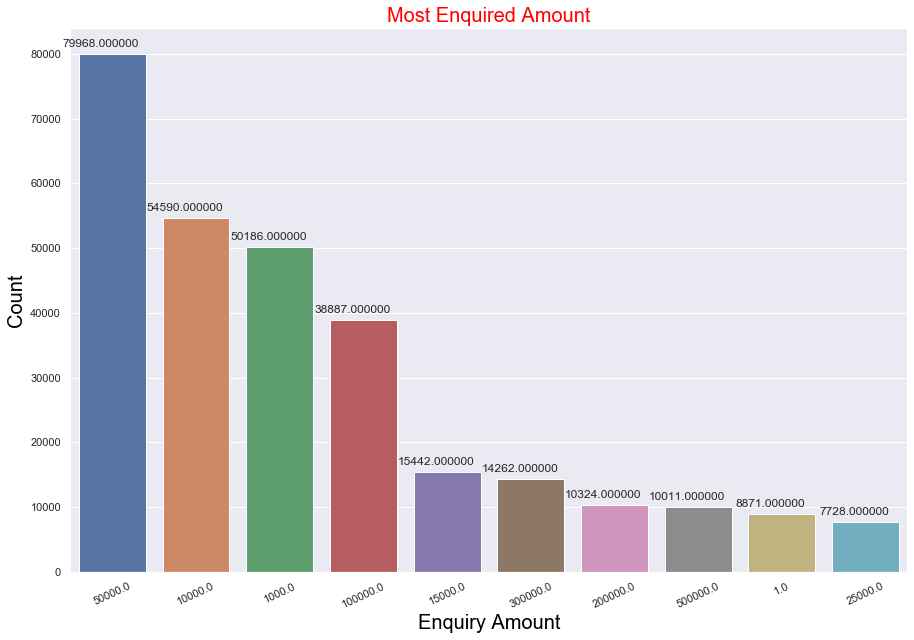

In [82]:
plt.figure(figsize=(15,10))
sns.set(style='darkgrid')
splot=sns.countplot(data3['enq_amt'],order=data3['enq_amt'].value_counts().index[:10])
plt.xticks(rotation=25)
plt.xlabel('Enquiry Amount',fontsize=20,color='black')
plt.ylabel('Count',fontsize=20,color='black')
plt.title("Most Enquired Amount",fontdict={'fontsize':20,'color':'red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

In [83]:
data3['enq_purpose'].value_counts()

10.0    238220
5.0      81889
1.0      23713
6.0      17431
2.0      15583
0.0      15051
13.0     11191
51.0      3942
3.0       1728
7.0       1351
12.0      1000
8.0        563
17.0       410
4.0        280
32.0       170
54.0       154
52.0       130
14.0        95
53.0        72
9.0         51
40.0        22
35.0        19
59.0        15
33.0        14
15.0        13
11.0        13
56.0        13
55.0        12
57.0        10
41.0         7
43.0         6
58.0         6
36.0         6
31.0         3
34.0         3
16.0         2
Name: enq_purpose, dtype: int64

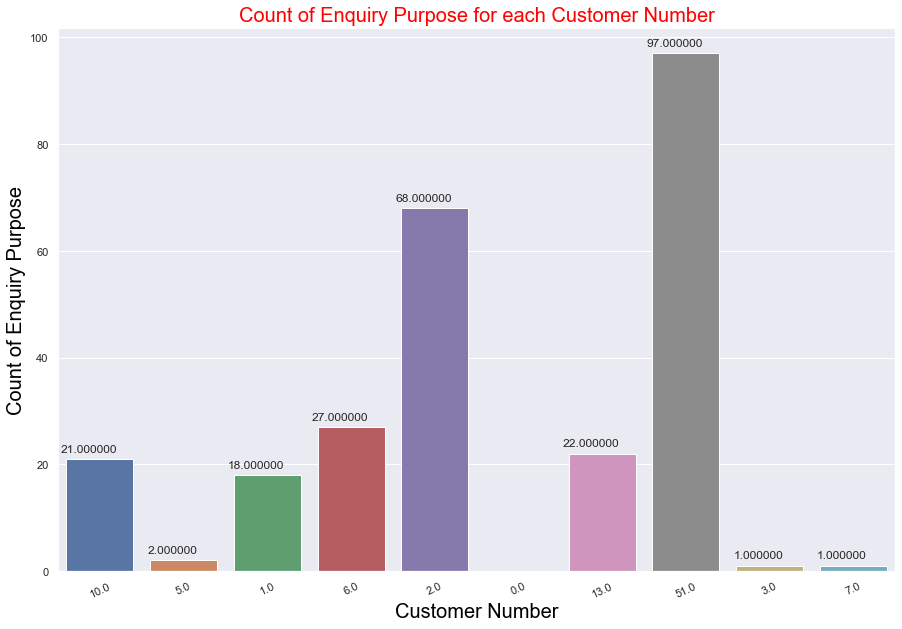

In [84]:
plt.figure(figsize=(15,10))
sns.set(style='darkgrid')
splot=sns.countplot(order=data3['enq_purpose'].value_counts().index[:10],x=data3['customer_no'])
plt.xticks(rotation=25)
plt.xlabel('Customer Number',fontsize=20,color='black')
plt.ylabel('Count of Enquiry Purpose',fontsize=20,color='black')
plt.title("Count of Enquiry Purpose for each Customer Number",fontdict={'fontsize':20,'color':'red'})
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 3., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10),textcoords = 'offset points')

Text(0.5, 1.0, 'Upload Date v/s Enquiry Purpose')

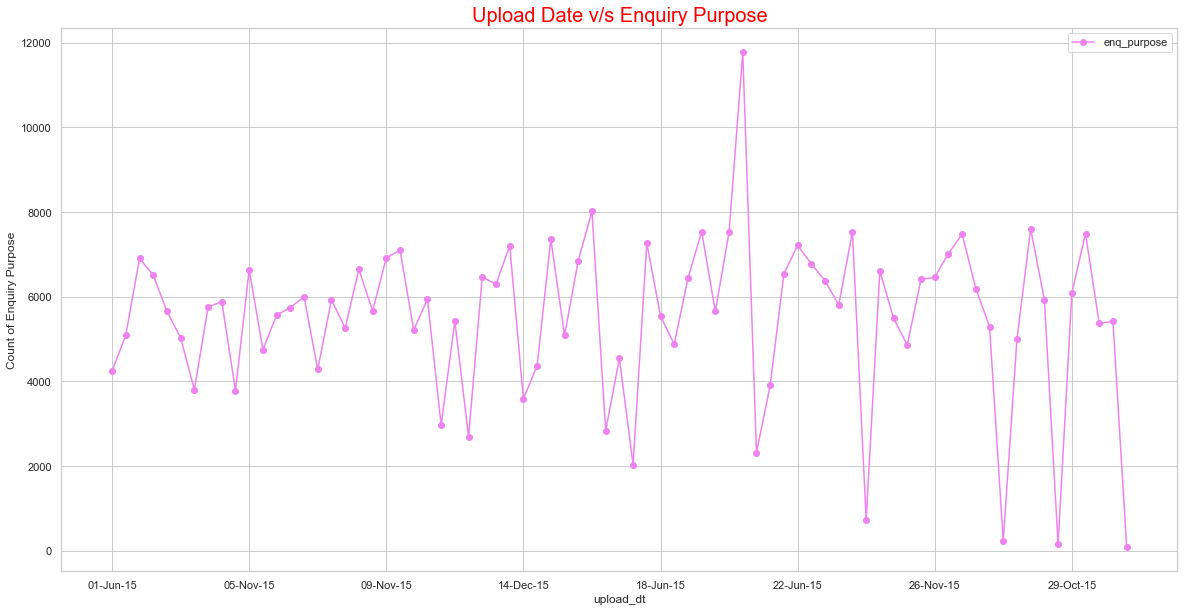

In [85]:
sns.set(style='whitegrid')
upload=data3.groupby(['upload_dt'])['enq_purpose'].count().to_frame()
upload.plot(kind='line',figsize=[20,10],color='violet',marker='o')
plt.ylabel('Count of Enquiry Purpose')
plt.title("Upload Date v/s Enquiry Purpose",fontsize=20,color='red')

In [86]:
data1.isna().sum().to_frame()

0
dt_opened            0
customer_no          0
upload_dt            0
acct_type            0
owner_indic          0
opened_dt            0
last_paymt_dt        0
closed_dt            0
reporting_dt         0
high_credit_amt      0
cur_balance_amt      0
amt_past_due         0
paymenthistory1      0
paymenthistory2      0
paymt_str_dt         0
paymt_end_dt         0
creditlimit          0
cashlimit            0
rateofinterest       0
paymentfrequency     0
actualpaymentamount  0

In [87]:
data2.isna().sum().to_frame()

0
dt_opened    0
customer_no  0
entry_time   0
feature_1    0
feature_2    0
...         ..
feature_76   0
feature_77   0
feature_78   0
feature_79   0
Bad_label    0

[83 rows x 1 columns]

In [88]:
data3.isna().sum().to_frame()

0
dt_opened    0
customer_no  0
upload_dt    0
enquiry_dt   0
enq_purpose  0
enq_amt      0

# 2. Feature matrix - List of features selected with gain

## Generating the new features

## 1) Payment History Average

In [89]:
enc=LabelEncoder()
data1.paymenthistory1=enc.fit_transform(data1.paymenthistory1)
data1.paymenthistory2=enc.fit_transform(data1.paymenthistory2)

In [90]:
data1['payment_history_avg']=data1['paymenthistory1'].mean()+data1['paymenthistory2'].mean()

In [91]:
data1.head()

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0  10-Nov-15        12265  20-Oct-15          6            1  09-Jun-13   
1  10-Nov-15        12265  20-Oct-15         10            1  25-May-12   
2  10-Nov-15        12265  20-Oct-15         10            1  22-Mar-12   
3  20-Jul-15        15606  09-Jul-15         10            1  13-Jan-06   
4  20-Jul-15        15606  09-Jul-15          6            1  18-Jan-15   

  last_paymt_dt  closed_dt reporting_dt  high_credit_amt  ...  \
0     30-Jun-14  05-Jul-14    30-Sep-15          20900.0  ...   
1     06-Sep-15  05-Jul-14    03-Oct-15          16201.0  ...   
2     31-Aug-15  05-Jul-14    30-Sep-15          41028.0  ...   
3     31-Aug-15  26-Jul-07    31-Jan-09          93473.0  ...   
4     05-May-15  26-Jul-07    31-May-15          20250.0  ...   

   paymenthistory1  paymenthistory2  paymt_str_dt  paymt_end_dt creditlimit  \
0            15698             1142     01-Sep-15     01-Jul-14     14000.0   
1               17             1142     01-Oct-15     01-Nov-12     14000.0   
2               17               17     01-Sep-15     01-Oct-12     14000.0   
3            14004               17     01-Jul-07     01-Feb-06     14000.0   
4                4               17     01-May-15     01-Jan-15     14000.0   

  cashlimit  rateofinterest  paymentfrequency actualpaymentamount  \
0    1400.0              39               3.0              5603.0   
1    1400.0              39               3.0              5603.0   
2    1400.0              39               3.0              5603.0   
3    1400.0              39               3.0              5603.0   
4    1400.0              39               3.0              5603.0   

   payment_history_avg  
0          6867.553033  
1          6867.553033  
2          6867.553033  
3          6867.553033  
4          6867.553033  

[5 rows x 22 columns]

## 2) Difference between Last Payment Date and Opened Date

In [92]:
data1.last_paymt_dt=enc.fit_transform(data1.last_paymt_dt)
data1.opened_dt=enc.fit_transform(data1.opened_dt)

In [93]:
data1['total_diff_lastpaymt_opened_dt']=data1['last_paymt_dt']-data1['opened_dt']

In [94]:
data1.head()

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0  10-Nov-15        12265  20-Oct-15          6            1       1755   
1  10-Nov-15        12265  20-Oct-15         10            1       5013   
2  10-Nov-15        12265  20-Oct-15         10            1       4391   
3  20-Jul-15        15606  09-Jul-15         10            1       2526   
4  20-Jul-15        15606  09-Jul-15          6            1       3543   

   last_paymt_dt  closed_dt reporting_dt  high_credit_amt  ...  \
0           4345  05-Jul-14    30-Sep-15          20900.0  ...   
1            889  05-Jul-14    03-Oct-15          16201.0  ...   
2           4425  05-Jul-14    30-Sep-15          41028.0  ...   
3           4425  26-Jul-07    31-Jan-09          93473.0  ...   
4            707  26-Jul-07    31-May-15          20250.0  ...   

   paymenthistory2  paymt_str_dt  paymt_end_dt  creditlimit cashlimit  \
0             1142     01-Sep-15     01-Jul-14      14000.0    1400.0   
1             1142     01-Oct-15     01-Nov-12      14000.0    1400.0   
2               17     01-Sep-15     01-Oct-12      14000.0    1400.0   
3               17     01-Jul-07     01-Feb-06      14000.0    1400.0   
4               17     01-May-15     01-Jan-15      14000.0    1400.0   

  rateofinterest  paymentfrequency  actualpaymentamount payment_history_avg  \
0             39               3.0               5603.0         6867.553033   
1             39               3.0               5603.0         6867.553033   
2             39               3.0               5603.0         6867.553033   
3             39               3.0               5603.0         6867.553033   
4             39               3.0               5603.0         6867.553033   

   total_diff_lastpaymt_opened_dt  
0                            2590  
1                           -4124  
2                              34  
3                            1899  
4                           -2836  

[5 rows x 23 columns]

## 3) Ratio of Current Balance to Credit Limit

In [95]:
data1['Ratio_currbalance_creditlimit']=data1['cur_balance_amt']/data1['creditlimit']

In [96]:
data1.head()

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0  10-Nov-15        12265  20-Oct-15          6            1       1755   
1  10-Nov-15        12265  20-Oct-15         10            1       5013   
2  10-Nov-15        12265  20-Oct-15         10            1       4391   
3  20-Jul-15        15606  09-Jul-15         10            1       2526   
4  20-Jul-15        15606  09-Jul-15          6            1       3543   

   last_paymt_dt  closed_dt reporting_dt  high_credit_amt  ...  paymt_str_dt  \
0           4345  05-Jul-14    30-Sep-15          20900.0  ...     01-Sep-15   
1            889  05-Jul-14    03-Oct-15          16201.0  ...     01-Oct-15   
2           4425  05-Jul-14    30-Sep-15          41028.0  ...     01-Sep-15   
3           4425  26-Jul-07    31-Jan-09          93473.0  ...     01-Jul-07   
4            707  26-Jul-07    31-May-15          20250.0  ...     01-May-15   

   paymt_end_dt  creditlimit  cashlimit rateofinterest paymentfrequency  \
0     01-Jul-14      14000.0     1400.0             39              3.0   
1     01-Nov-12      14000.0     1400.0             39              3.0   
2     01-Oct-12      14000.0     1400.0             39              3.0   
3     01-Feb-06      14000.0     1400.0             39              3.0   
4     01-Jan-15      14000.0     1400.0             39              3.0   

   actualpaymentamount  payment_history_avg total_diff_lastpaymt_opened_dt  \
0               5603.0          6867.553033                           2590   
1               5603.0          6867.553033                          -4124   
2               5603.0          6867.553033                             34   
3               5603.0          6867.553033                           1899   
4               5603.0          6867.553033                          -2836   

   Ratio_currbalance_creditlimit  
0                       0.000000  
1                       0.742143  
2                       2.458571  
3                       0.000000  
4                       0.964286  

[5 rows x 24 columns]

## 4) Mean Difference between Last Payment Date and Opened Date

In [97]:
data1['mean_diff_lastpaymt_opened_dt']=data1['last_paymt_dt'].mean()-data1['opened_dt'].mean()

In [98]:
data1.head()

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0  10-Nov-15        12265  20-Oct-15          6            1       1755   
1  10-Nov-15        12265  20-Oct-15         10            1       5013   
2  10-Nov-15        12265  20-Oct-15         10            1       4391   
3  20-Jul-15        15606  09-Jul-15         10            1       2526   
4  20-Jul-15        15606  09-Jul-15          6            1       3543   

   last_paymt_dt  closed_dt reporting_dt  high_credit_amt  ...  paymt_end_dt  \
0           4345  05-Jul-14    30-Sep-15          20900.0  ...     01-Jul-14   
1            889  05-Jul-14    03-Oct-15          16201.0  ...     01-Nov-12   
2           4425  05-Jul-14    30-Sep-15          41028.0  ...     01-Oct-12   
3           4425  26-Jul-07    31-Jan-09          93473.0  ...     01-Feb-06   
4            707  26-Jul-07    31-May-15          20250.0  ...     01-Jan-15   

   creditlimit  cashlimit  rateofinterest paymentfrequency  \
0      14000.0     1400.0              39              3.0   
1      14000.0     1400.0              39              3.0   
2      14000.0     1400.0              39              3.0   
3      14000.0     1400.0              39              3.0   
4      14000.0     1400.0              39              3.0   

  actualpaymentamount  payment_history_avg  total_diff_lastpaymt_opened_dt  \
0              5603.0          6867.553033                            2590   
1              5603.0          6867.553033                           -4124   
2              5603.0          6867.553033                              34   
3              5603.0          6867.553033                            1899   
4              5603.0          6867.553033                           -2836   

  Ratio_currbalance_creditlimit  mean_diff_lastpaymt_opened_dt  
0                      0.000000                   -1618.902377  
1                      0.742143                   -1618.902377  
2                      2.458571                   -1618.902377  
3                      0.000000                   -1618.902377  
4                      0.964286                   -1618.902377  

[5 rows x 25 columns]

## 5) Mean Difference Open Date for Enquiry and Enquiry Date 

In [99]:
data3.dt_opened=enc.fit_transform(data3.dt_opened)
data3.enquiry_dt=enc.fit_transform(data3.enquiry_dt)

In [100]:
data3['mean_diff_open_enquiry_dt']=data3['dt_opened'] - data3['enquiry_dt']

In [101]:
data3.head()

dt_opened  customer_no  upload_dt  enquiry_dt  enq_purpose    enq_amt  \
0        101            1  21-Apr-15        2244          2.0  3500000.0   
1        101            1  21-Apr-15         574          5.0   500000.0   
2        101            1  21-Apr-15         574          0.0    50000.0   
3        101            1  21-Apr-15        2627         10.0    50000.0   
4        101            1  21-Apr-15        1304         10.0     1000.0   

   mean_diff_open_enquiry_dt  
0                      -2143  
1                       -473  
2                       -473  
3                      -2526  
4                      -1203

## 6) Payment History Mean Length

In [102]:
data1['payment_history_mean_length']=len(data1['payment_history_avg'])

In [103]:
data1.head()

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0  10-Nov-15        12265  20-Oct-15          6            1       1755   
1  10-Nov-15        12265  20-Oct-15         10            1       5013   
2  10-Nov-15        12265  20-Oct-15         10            1       4391   
3  20-Jul-15        15606  09-Jul-15         10            1       2526   
4  20-Jul-15        15606  09-Jul-15          6            1       3543   

   last_paymt_dt  closed_dt reporting_dt  high_credit_amt  ...  creditlimit  \
0           4345  05-Jul-14    30-Sep-15          20900.0  ...      14000.0   
1            889  05-Jul-14    03-Oct-15          16201.0  ...      14000.0   
2           4425  05-Jul-14    30-Sep-15          41028.0  ...      14000.0   
3           4425  26-Jul-07    31-Jan-09          93473.0  ...      14000.0   
4            707  26-Jul-07    31-May-15          20250.0  ...      14000.0   

   cashlimit  rateofinterest  paymentfrequency actualpaymentamount  \
0     1400.0              39               3.0              5603.0   
1     1400.0              39               3.0              5603.0   
2     1400.0              39               3.0              5603.0   
3     1400.0              39               3.0              5603.0   
4     1400.0              39               3.0              5603.0   

  payment_history_avg  total_diff_lastpaymt_opened_dt  \
0         6867.553033                            2590   
1         6867.553033                           -4124   
2         6867.553033                              34   
3         6867.553033                            1899   
4         6867.553033                           -2836   

   Ratio_currbalance_creditlimit mean_diff_lastpaymt_opened_dt  \
0                       0.000000                  -1618.902377   
1                       0.742143                  -1618.902377   
2                       2.458571                  -1618.902377   
3                       0.000000                  -1618.902377   
4                       0.964286                  -1618.902377   

   payment_history_mean_length  
0                       186329  
1                       186329  
2                       186329  
3                       186329  
4                       186329  

[5 rows x 26 columns]

## 7) Maximum Frequency Enquiry

In [104]:
data3['max_freq_enquiry']=data3['enq_purpose'].value_counts().idxmax()

In [105]:
data3.head()

dt_opened  customer_no  upload_dt  enquiry_dt  enq_purpose    enq_amt  \
0        101            1  21-Apr-15        2244          2.0  3500000.0   
1        101            1  21-Apr-15         574          5.0   500000.0   
2        101            1  21-Apr-15         574          0.0    50000.0   
3        101            1  21-Apr-15        2627         10.0    50000.0   
4        101            1  21-Apr-15        1304         10.0     1000.0   

   mean_diff_open_enquiry_dt  max_freq_enquiry  
0                      -2143              10.0  
1                       -473              10.0  
2                       -473              10.0  
3                      -2526              10.0  
4                      -1203              10.0

## 8) Utilization Trend

In [106]:
data1['utilisation_trend']=(data1.cur_balance_amt/data1.creditlimit)/[data1.cur_balance_amt.mean()/(data1.cashlimit.mean()+data1.creditlimit.mean())]

In [107]:
data1.head()

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0  10-Nov-15        12265  20-Oct-15          6            1       1755   
1  10-Nov-15        12265  20-Oct-15         10            1       5013   
2  10-Nov-15        12265  20-Oct-15         10            1       4391   
3  20-Jul-15        15606  09-Jul-15         10            1       2526   
4  20-Jul-15        15606  09-Jul-15          6            1       3543   

   last_paymt_dt  closed_dt reporting_dt  high_credit_amt  ...  cashlimit  \
0           4345  05-Jul-14    30-Sep-15          20900.0  ...     1400.0   
1            889  05-Jul-14    03-Oct-15          16201.0  ...     1400.0   
2           4425  05-Jul-14    30-Sep-15          41028.0  ...     1400.0   
3           4425  26-Jul-07    31-Jan-09          93473.0  ...     1400.0   
4            707  26-Jul-07    31-May-15          20250.0  ...     1400.0   

   rateofinterest  paymentfrequency  actualpaymentamount payment_history_avg  \
0              39               3.0               5603.0         6867.553033   
1              39               3.0               5603.0         6867.553033   
2              39               3.0               5603.0         6867.553033   
3              39               3.0               5603.0         6867.553033   
4              39               3.0               5603.0         6867.553033   

  total_diff_lastpaymt_opened_dt  Ratio_currbalance_creditlimit  \
0                           2590                       0.000000   
1                          -4124                       0.742143   
2                             34                       2.458571   
3                           1899                       0.000000   
4                          -2836                       0.964286   

   mean_diff_lastpaymt_opened_dt payment_history_mean_length  \
0                   -1618.902377                      186329   
1                   -1618.902377                      186329   
2                   -1618.902377                      186329   
3                   -1618.902377                      186329   
4                   -1618.902377                      186329   

   utilisation_trend  
0           0.000000  
1           0.923429  
2           3.059137  
3           0.000000  
4           1.199836  

[5 rows x 27 columns]

## Generating Correlation Matrix for Customer Account Data

In [108]:
corr=data1.corr()
corr

customer_no     acct_type   owner_indic  \
customer_no                     1.000000e+00  2.400909e-03 -9.511131e-03   
acct_type                       2.400909e-03  1.000000e+00 -8.503243e-02   
owner_indic                    -9.511131e-03 -8.503243e-02  1.000000e+00   
opened_dt                      -5.681111e-03 -3.158573e-02  3.869421e-02   
last_paymt_dt                   1.150056e-02  9.257302e-02  1.331766e-02   
high_credit_amt                -1.363167e-02 -6.644059e-02  2.555419e-01   
cur_balance_amt                -5.074271e-03 -8.430043e-02  2.279362e-01   
amt_past_due                   -7.494869e-03  2.778470e-03  1.767759e-03   
paymenthistory1                -6.106957e-03 -7.506959e-02  3.992206e-02   
paymenthistory2                 1.924442e-02 -1.176766e-02  2.561578e-02   
creditlimit                    -6.901914e-03  3.259024e-03  3.111445e-02   
cashlimit                      -7.118445e-03  4.959635e-03  2.375378e-02   
paymentfrequency                2.275210e-02  2.421050e-02 -7.411508e-02   
actualpaymentamount            -9.478220e-03 -1.737900e-02  3.663150e-02   
payment_history_avg             1.659865e-15 -8.809132e-16 -2.062352e-15   
total_diff_lastpaymt_opened_dt  1.141065e-02  8.077360e-02 -2.223817e-02   
Ratio_currbalance_creditlimit  -2.009770e-03 -4.697331e-03  2.365631e-03   
mean_diff_lastpaymt_opened_dt   8.310142e-15  1.659588e-15 -2.199276e-15   
payment_history_mean_length              NaN           NaN           NaN   
utilisation_trend              -2.009770e-03 -4.697331e-03  2.365631e-03   

                                   opened_dt  last_paymt_dt  high_credit_amt  \
customer_no                    -5.681111e-03   1.150056e-02    -1.363167e-02   
acct_type                      -3.158573e-02   9.257302e-02    -6.644059e-02   
owner_indic                     3.869421e-02   1.331766e-02     2.555419e-01   
opened_dt                       1.000000e+00  -2.146267e-02     2.419563e-02   
last_paymt_dt                  -2.146267e-02   1.000000e+00     6.965235e-03   
high_credit_amt                 2.419563e-02   6.965235e-03     1.000000e+00   
cur_balance_amt                 2.864594e-02  -5.582549e-03     7.265598e-01   
amt_past_due                   -1.158817e-03   6.830935e-03     1.694658e-03   
paymenthistory1                -1.287544e-02  -1.226916e-02     1.220080e-02   
paymenthistory2                 2.212041e-03   1.927256e-02     1.096830e-02   
creditlimit                    -3.382777e-03   1.082522e-02     5.382383e-02   
cashlimit                      -2.450516e-03   2.302894e-02     3.017579e-02   
paymentfrequency               -4.524876e-03   3.086265e-03    -3.624532e-02   
actualpaymentamount             8.661636e-03   4.849341e-03     3.499377e-01   
payment_history_avg             9.665053e-15   7.654709e-15     1.569182e-15   
total_diff_lastpaymt_opened_dt -7.960589e-01   6.221653e-01    -1.473032e-02   
Ratio_currbalance_creditlimit   4.558130e-04  -6.802165e-04     1.567131e-02   
mean_diff_lastpaymt_opened_dt   6.067692e-16   9.988324e-15     4.470325e-15   
payment_history_mean_length              NaN            NaN              NaN   
utilisation_trend               4.558130e-04  -6.802165e-04     1.567131e-02   

                                cur_balance_amt  amt_past_due  \
customer_no                       -5.074271e-03 -7.494869e-03   
acct_type                         -8.430043e-02  2.778470e-03   
owner_indic                        2.279362e-01  1.767759e-03   
opened_dt                          2.864594e-02 -1.158817e-03   
last_paymt_dt                     -5.582549e-03  6.830935e-03   
high_credit_amt                    7.265598e-01  1.694658e-03   
cur_balance_amt                    1.000000e+00  1.553317e-03   
amt_past_due                       1.553317e-03  1.000000e+00   
paymenthistory1                   -4.054510e-03  3.464914e-03   
paymenthistory2                    4.965630e-03  6.994993e-03   
creditlimit                        2.884

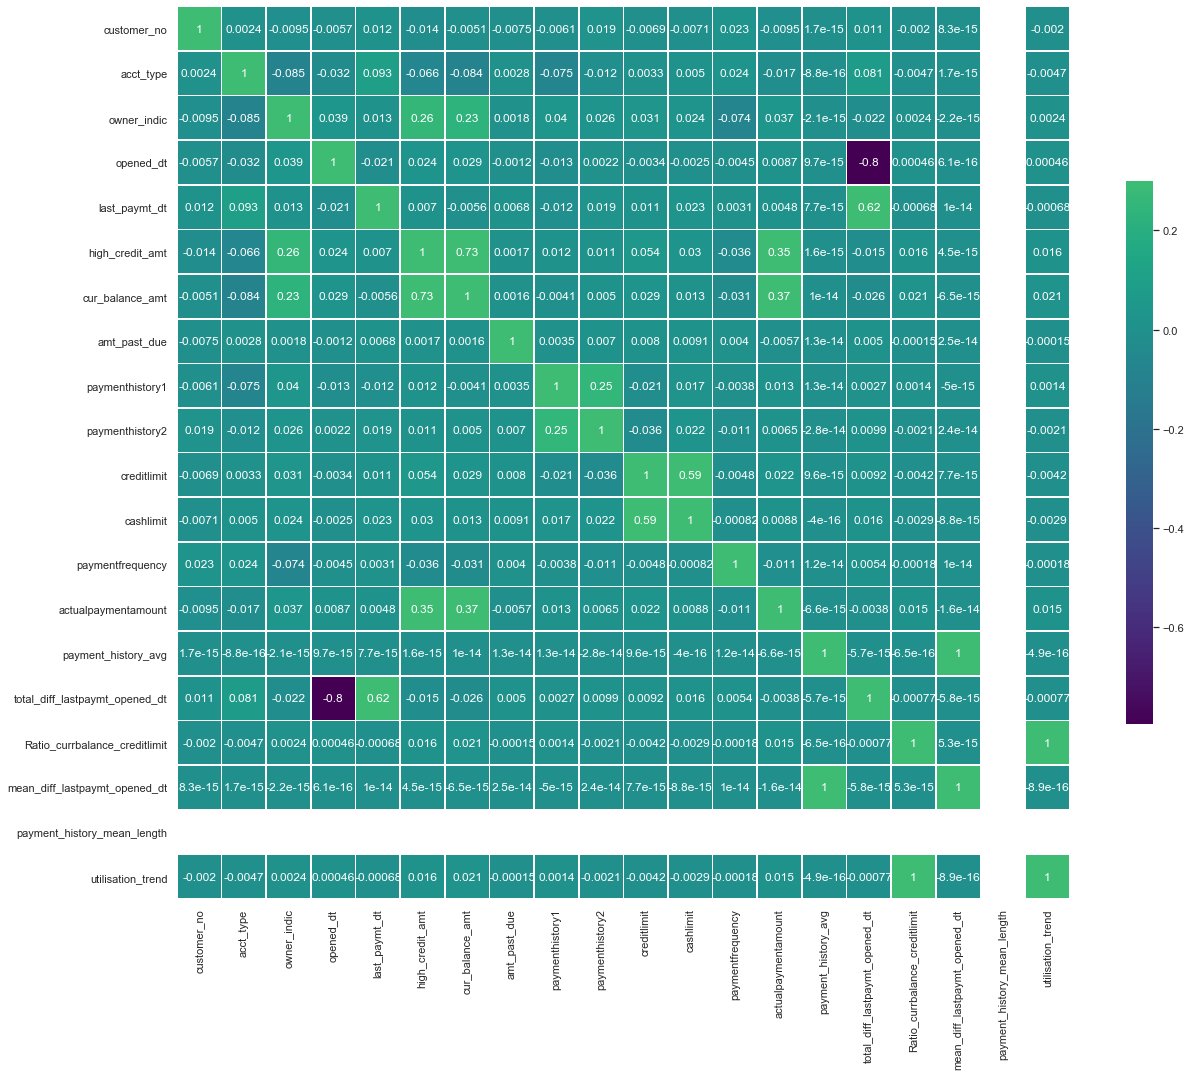

In [109]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='viridis', vmax=.3, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5}, annot=True)

## Generating Correlation Matrix for Customer Demographics

In [110]:
corr1=data2.corr()
corr1

customer_no  feature_3  feature_4  feature_6  feature_7  \
customer_no     1.000000   0.028871  -0.200995        NaN  -0.041899   
feature_3       0.028871   1.000000  -0.231575        NaN   0.277440   
feature_4      -0.200995  -0.231575   1.000000        NaN  -0.092094   
feature_6            NaN        NaN        NaN        NaN        NaN   
feature_7      -0.041899   0.277440  -0.092094        NaN   1.000000   
feature_14      0.434207   0.027545   0.116583        NaN  -0.014025   
feature_19     -0.003668   0.037649  -0.026092        NaN  -0.018837   
feature_25      0.035733  -0.099090   0.029075        NaN  -0.126733   
feature_26     -0.308480   0.026980   0.187440        NaN   0.086936   
feature_29     -0.237698  -0.015662  -0.152124        NaN   0.044310   
feature_30     -0.022459  -0.048438   0.036305        NaN  -0.061348   
feature_31      0.199731  -0.000031  -0.222854        NaN  -0.023088   
feature_34     -0.008879   0.100200  -0.073727        NaN   0.113226   
feature_35     -0.053414   0.049933   0.004923        NaN   0.091281   
feature_39      0.009234  -0.099692   0.074290        NaN  -0.112981   
feature_40      0.005503  -0.071148   0.000409        NaN  -0.078695   
feature_41     -0.035314  -0.003740   0.027231        NaN   0.013931   
feature_42      0.018286  -0.041436   0.018770        NaN  -0.042724   
feature_44     -0.233933  -0.020369  -0.149468        NaN   0.039702   
feature_49      0.159461   0.018320  -0.001935        NaN  -0.010423   
feature_52     -0.080486   0.049084   0.062304        NaN   0.573924   
feature_55     -0.007215   0.040120  -0.026375        NaN  -0.009857   
feature_56      0.036675   0.052401   0.014411        NaN   0.024233   
feature_64      0.052364   0.027801   0.043222        NaN  -0.001162   
feature_65      0.056138  -0.035341   0.076579        NaN  -0.056767   
feature_66     -0.150789  -0.055417  -0.073933        NaN  -0.007125   
feature_67      0.043709  -0.060712   0.085536        NaN  -0.060945   
feature_68     -0.008879   0.100200  -0.073727        NaN   0.113226   
feature_69     -0.053414   0.049933   0.004923        NaN   0.091281   
feature_71      0.064654   0.028774   0.032539        NaN   0.000162   
feature_74     -0.637515  -0.027212   0.072660        NaN   0.040272   
feature_76     -0.003088  -0.005032  -0.018677        NaN   0.048085   
feature_78     -0.010139  -0.004287   0.024388        NaN  -0.009875   
Bad_label      -0.001673  -0.039920   0.017343        NaN  -0.059598   

             feature_14  feature_19  feature_25  feature_26  feature_29  ...  \
customer_no    0.434207   -0.003668    0.035733   -0.308480   -0.237698  ...   
feature_3      0.027545    0.037649   -0.099090    0.026980   -0.015662  ...   
feature_4      0.116583   -0.026092    0.029075    0.187440   -0.152124  ...   
feature_6           NaN         NaN         NaN         NaN         NaN  ...   
feature_7     -0.014025   -0.018837   -0.126733    0.086936    0.044310  ...   
feature_14     1.000000   -0.000888    0.003734    0.095978   -0.387803  ...   
feature_19    -0.000888    1.000000    0.016271   -0.045179   -0.017432  ...   
feature_25     0.003734    0.016271    1.000000   -0.248847   -0.044128  ...   
feature_26     0.095978   -0.045179   -0.248847    1.000000    0.088615  ...   
feature_29    -0.387803   -0.017432   -0.044128    0.088615    1.000000  ...   
feature_30    -0.022132    0.033848    0.054062   -0.029302    0.077582  ...   
feature_31    -0.069685    0.011088    0.007121   -0.167965   -0.019951  ...   
feature_34    -0.086010    0.029186   -0.101628    0.014277   -0.007002  ...   
feature_35    -0.027886   -0.003647   -0.027045    0.057353    0.080519  ...   
feature_39     0.087329   -0.028972    0.102988   -0.013731    0.007746  ...   
feature_40    -0.011539   -0.014537    0.080641   -0.029878    0.082059  ...   
feature_41     0.044505   -0.037186   -0.132193    0.100564    0.069565  ...   
feature_42     0.020214   -0.006624    0.097812   -0

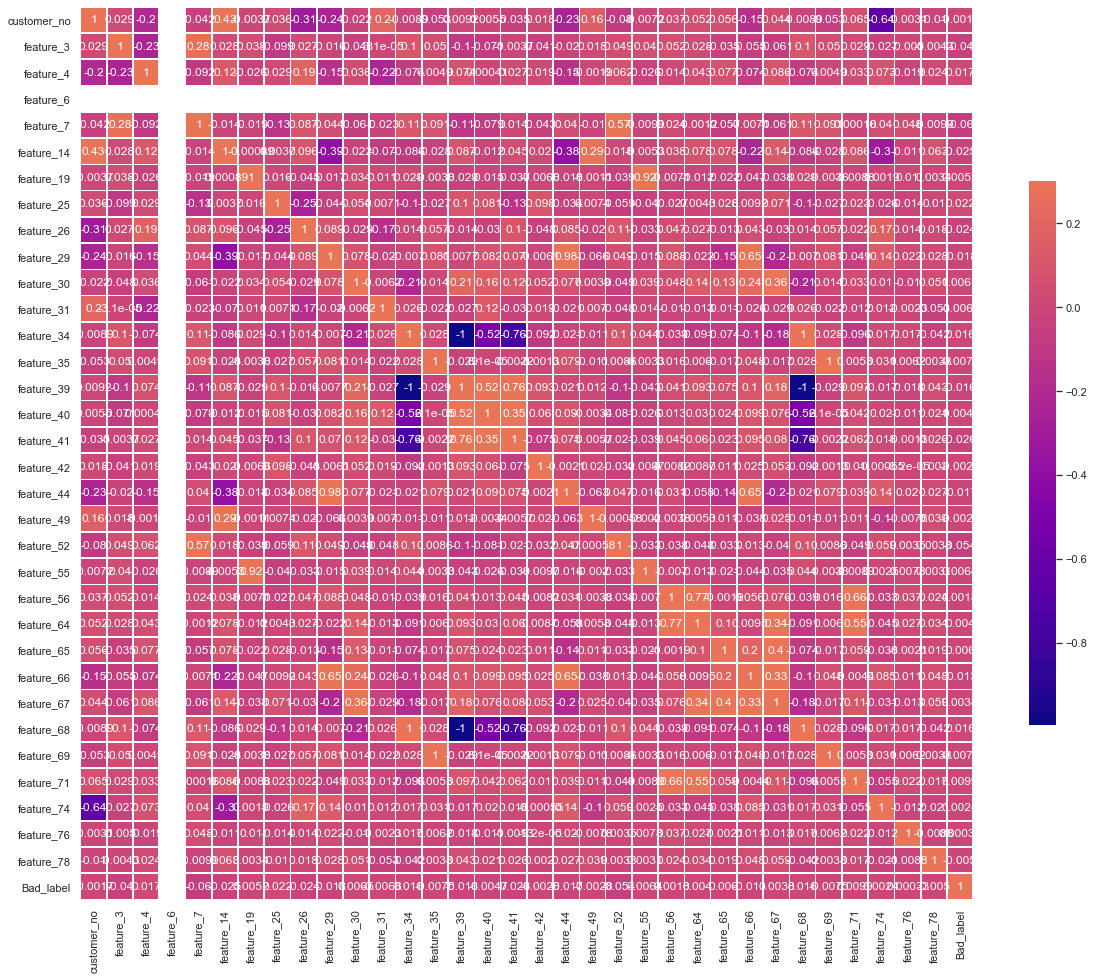

In [111]:
plt.figure(figsize=(20,20))
sns.heatmap(corr1, cmap='plasma', vmax=.3, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5}, annot=True)

## Generating Correlation Matrix for Customer Enquiry

In [112]:
corr2=data3.corr()
corr2

dt_opened  customer_no  enquiry_dt  enq_purpose  \
dt_opened                   1.000000     0.104641   -0.001883    -0.000519   
customer_no                 0.104641     1.000000    0.002824    -0.010924   
enquiry_dt                 -0.001883     0.002824    1.000000    -0.008608   
enq_purpose                -0.000519    -0.010924   -0.008608     1.000000   
enq_amt                     0.002975    -0.014090   -0.005866     0.050614   
mean_diff_open_enquiry_dt   0.056826     0.002931   -0.998489     0.008566   
max_freq_enquiry                 NaN          NaN         NaN          NaN   

                            enq_amt  mean_diff_open_enquiry_dt  \
dt_opened                  0.002975                   0.056826   
customer_no               -0.014090                   0.002931   
enquiry_dt                -0.005866                  -0.998489   
enq_purpose                0.050614                   0.008566   
enq_amt                    1.000000                   0.006020   
mean_diff_open_enquiry_dt  0.006020                   1.000000   
max_freq_enquiry                NaN                        NaN   

                           max_freq_enquiry  
dt_opened                               NaN  
customer_no                             NaN  
enquiry_dt                              NaN  
enq_purpose                             NaN  
enq_amt                                 NaN  
mean_diff_open_enquiry_dt               NaN  
max_freq_enquiry                        NaN

In [113]:
data3.isna().sum().to_frame().T

dt_opened  customer_no  upload_dt  enquiry_dt  enq_purpose  enq_amt  \
0          0            0          0           0            0        0   

   mean_diff_open_enquiry_dt  max_freq_enquiry  
0                          0                 0

In [114]:
data1.isna().sum().to_frame()

0
dt_opened                       0
customer_no                     0
upload_dt                       0
acct_type                       0
owner_indic                     0
opened_dt                       0
last_paymt_dt                   0
closed_dt                       0
reporting_dt                    0
high_credit_amt                 0
cur_balance_amt                 0
amt_past_due                    0
paymenthistory1                 0
paymenthistory2                 0
paymt_str_dt                    0
paymt_end_dt                    0
creditlimit                     0
cashlimit                       0
rateofinterest                  0
paymentfrequency                0
actualpaymentamount             0
payment_history_avg             0
total_diff_lastpaymt_opened_dt  0
Ratio_currbalance_creditlimit   0
mean_diff_lastpaymt_opened_dt   0
payment_history_mean_length     0
utilisation_trend               0

In [115]:
data2.isna().sum().to_frame()

0
dt_opened    0
customer_no  0
entry_time   0
feature_1    0
feature_2    0
...         ..
feature_76   0
feature_77   0
feature_78   0
feature_79   0
Bad_label    0

[83 rows x 1 columns]

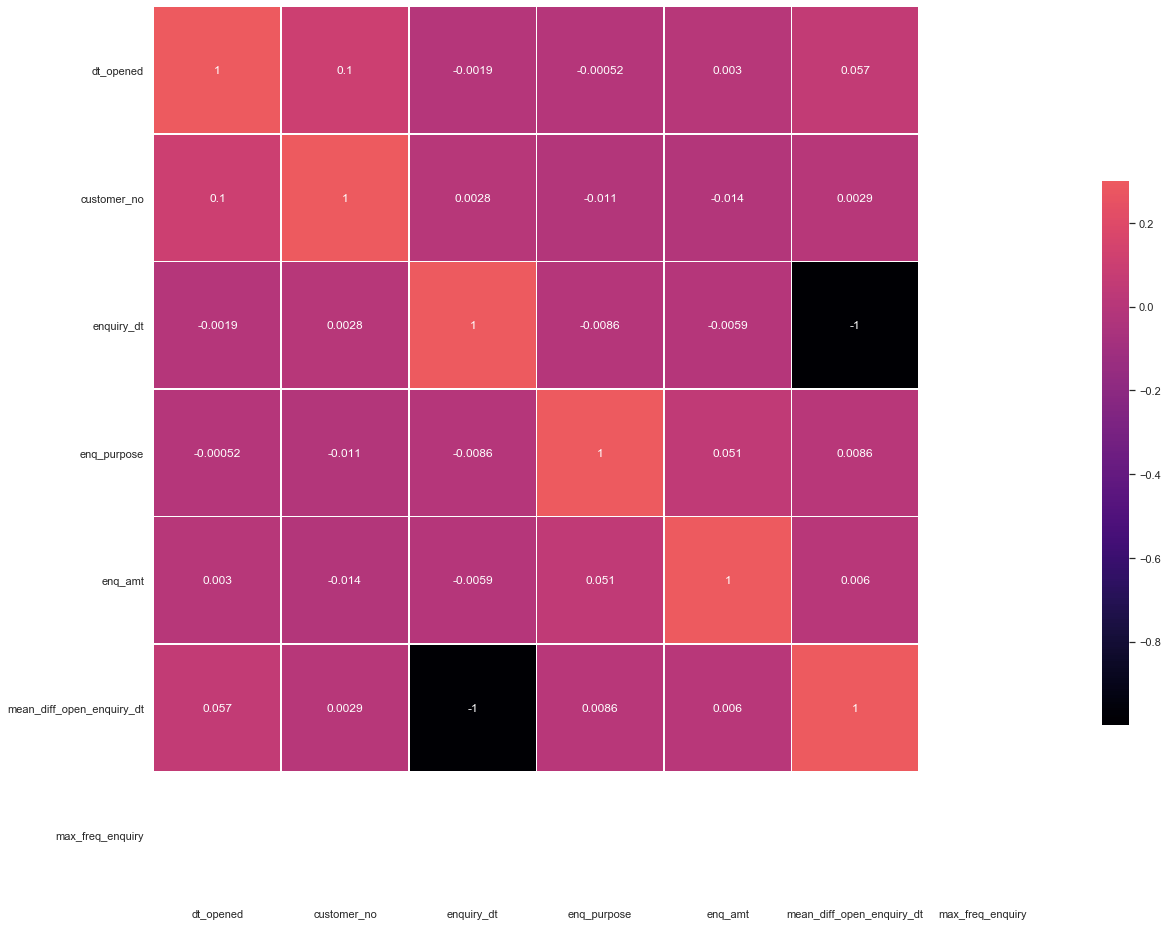

In [116]:
plt.figure(figsize=(20,20))
sns.heatmap(corr2, cmap='magma', vmax=.3, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5}, annot=True)

# 3. Model evaluation - Classify Good Label or Bad Label

# 3.1) Implementing the model only on Cust_Demographics Data

### 1) Using Random Forest Classifier

#### Import the packages

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score,confusion_matrix,classification_report

In [118]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 83 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt_opened    23896 non-null  object 
 1   customer_no  23896 non-null  int64  
 2   entry_time   23896 non-null  object 
 3   feature_1    23896 non-null  object 
 4   feature_2    23896 non-null  object 
 5   feature_3    23896 non-null  float64
 6   feature_4    23896 non-null  float64
 7   feature_5    23896 non-null  object 
 8   feature_6    23896 non-null  float64
 9   feature_7    23896 non-null  float64
 10  feature_8    23896 non-null  object 
 11  feature_9    23896 non-null  object 
 12  feature_10   23896 non-null  object 
 13  feature_11   23896 non-null  object 
 14  feature_12   23896 non-null  object 
 15  feature_13   23896 non-null  object 
 16  feature_14   23896 non-null  float64
 17  feature_15   23896 non-null  object 
 18  feature_16   23896 non-null  object 
 19  feat

In [119]:
enc=LabelEncoder()
a=['dt_opened','entry_time','feature_1','feature_2','feature_5','feature_21','feature_11','feature_12',
'feature_23','feature_32','feature_33','feature_43','feature_53','feature_50','feature_54','feature_70',
'feature_15','feature_16','feature_17','feature_20','feature_22','feature_24','feature_28','feature_63',
'feature_45','feature_46','feature_47','feature_48','feature_51','feature_58','feature_59','feature_60',
'feature_62','feature_72','feature_75','feature_77', 'feature_79']
for i in a:
    data2[[i]]=enc.fit_transform(data2[[i]])

In [120]:
data2.drop(labels=['feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_18',
 'feature_21','feature_23','feature_27','feature_32','feature_33','feature_36','feature_37','feature_38',
   'feature_43','feature_17','feature_18','feature_50','feature_53','feature_54','feature_57','feature_61',
   'feature_70','feature_72','feature_73'], axis=1, inplace=True)

#### Define X and y variables

In [121]:
X = data2.loc[:,data2.columns!='Bad_label']
y = data2.Bad_label

#### Splitting the data into training data and testing data using train-test split 

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (16727, 57)
X_test shape =  (7169, 57)
y_train shape =  (16727,)
y_test shape =  (7169,)


In [123]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 58 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dt_opened    23896 non-null  int32  
 1   customer_no  23896 non-null  int64  
 2   entry_time   23896 non-null  int32  
 3   feature_1    23896 non-null  int32  
 4   feature_2    23896 non-null  int32  
 5   feature_3    23896 non-null  float64
 6   feature_4    23896 non-null  float64
 7   feature_5    23896 non-null  int32  
 8   feature_6    23896 non-null  float64
 9   feature_7    23896 non-null  float64
 10  feature_14   23896 non-null  float64
 11  feature_15   23896 non-null  int32  
 12  feature_16   23896 non-null  int32  
 13  feature_19   23896 non-null  float64
 14  feature_20   23896 non-null  int32  
 15  feature_22   23896 non-null  int32  
 16  feature_24   23896 non-null  int32  
 17  feature_25   23896 non-null  float64
 18  feature_26   23896 non-null  float64
 19  feat

 Model Feature Importances of a Random Forest Classifier =  [0.  0.2 0.2 0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.2 0.  0.2 0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0. ]


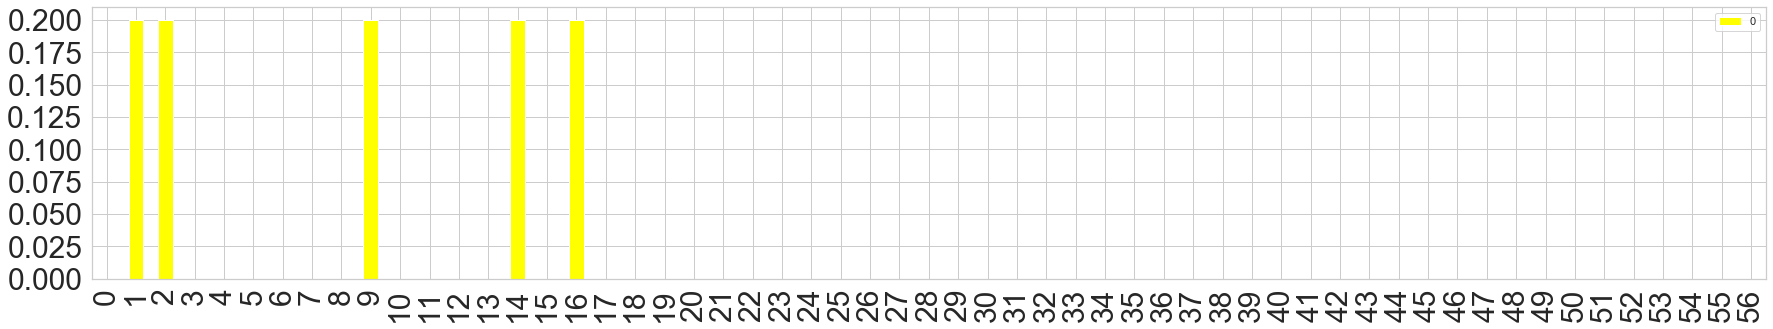

In [124]:
model_rf=RandomForestClassifier(n_estimators=5,criterion="gini",max_depth=1,n_jobs=2,random_state=5)
model_rf.fit(X_train,y_train)
print(" Model Feature Importances of a Random Forest Classifier = " ,model_rf.feature_importances_)
feature_importances_rf=pd.DataFrame(model_rf.feature_importances_)
feature_importances_rf.plot(kind='bar',color='yellow',figsize=(30,5),fontsize=30)
y_train_predict=model_rf.predict(X_train)
y_predict=model_rf.predict(X_test)

In [125]:
pd.crosstab(y_test,y_predict,margins=any)

col_0         0   All
Bad_label            
0          6861  6861
1           308   308
All        7169  7169

In [126]:
print(confusion_matrix(y_test,y_predict))

[[6861    0]
 [ 308    0]]


In [127]:
print("Accuracy of Training = ", accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy of Training =  95.83906259341185
Accuracy of Testing =  95.70372436881016
Precision score =  91.59202858061187
Recall score =  95.70372436881016
F1 score =  93.60274453234591


In [128]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6861
           1       0.00      0.00      0.00       308

    accuracy                           0.96      7169
   macro avg       0.48      0.50      0.49      7169
weighted avg       0.92      0.96      0.94      7169



## Receiver Operating Characteristics (ROC) Curve

No state AUC score = 0.500 
Random Forest AUC score = 0.594 


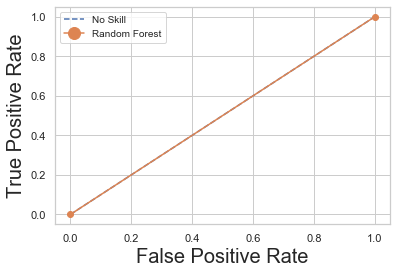

In [129]:
from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
rf_probability=model_rf.predict_proba(X_test)
rf_probability = rf_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
rf_auc=roc_auc_score(y_test,rf_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Random Forest AUC score = %.3f " %(rf_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
rf_fpr, rf_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='o', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Precision-Recall Curve

Random forest: f1=0.000 auc=0.062


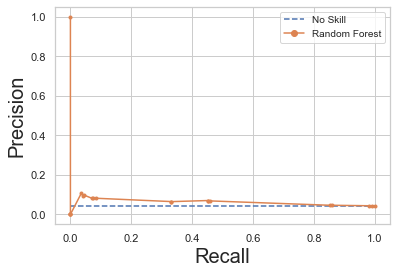

In [130]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
rf_probability = model_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probability = rf_probability[:, 1]
# predict class values
y_predict = model_rf.predict(X_test)
rf_precision, rf_recall,i = precision_recall_curve(y_test, rf_probability)
rf_f1, rf_auc = f1_score(y_test, y_predict), auc(rf_recall, rf_precision)
# summarize scores
print('Random forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## 2) Using Decision Tree Classifier

#### Import the package

In [131]:
from sklearn.tree import DecisionTreeClassifier

#### Define and train the model

 Model Feature Importances of a Decision Tree Classifier =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


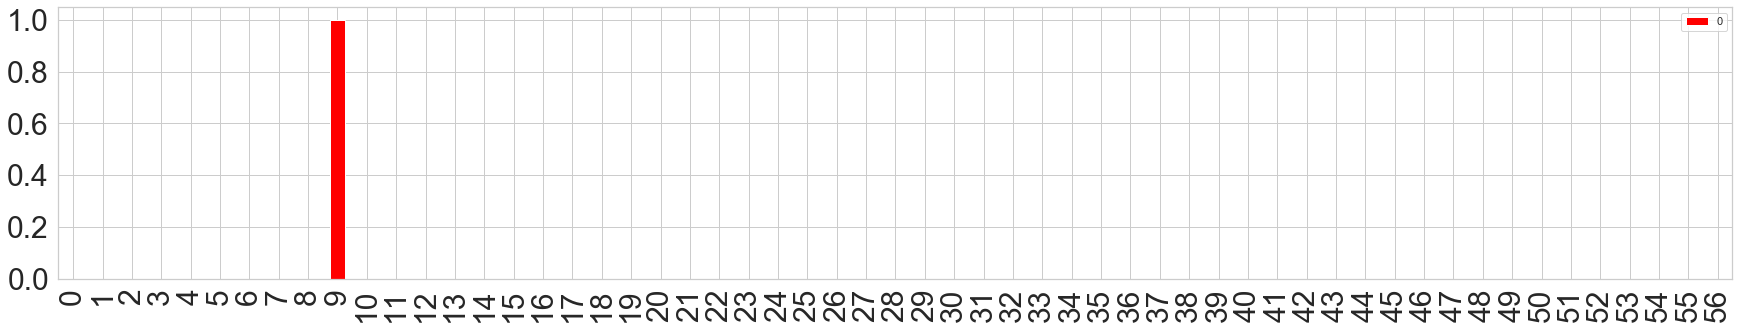

In [132]:
model_dt=DecisionTreeClassifier(splitter='best',criterion="gini",max_depth=1,random_state=5)
model_dt.fit(X_train,y_train)
print(" Model Feature Importances of a Decision Tree Classifier = " ,model_dt.feature_importances_)
feature_importances_dt=pd.DataFrame(model_dt.feature_importances_)
feature_importances_dt.plot(kind='bar',color='red',figsize=(30,5),fontsize=30)
y_train_predict=model_dt.predict(X_train)
y_predict=model_dt.predict(X_test)

In [133]:
print(confusion_matrix(y_test,y_predict))

[[6861    0]
 [ 308    0]]


In [134]:
pd.crosstab(y_test,y_predict,margins=any)

col_0         0   All
Bad_label            
0          6861  6861
1           308   308
All        7169  7169

In [135]:
print("Accuracy of Training = ", accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy of Training =  95.83906259341185
Accuracy of Testing =  95.70372436881016
Precision score =  91.59202858061187
Recall score =  95.70372436881016
F1 score =  93.60274453234591


In [136]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6861
           1       0.00      0.00      0.00       308

    accuracy                           0.96      7169
   macro avg       0.48      0.50      0.49      7169
weighted avg       0.92      0.96      0.94      7169



## ROC Curve

No state AUC score = 0.500 
Decision Tree AUC score = 0.552 


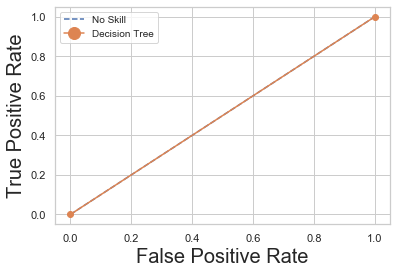

In [137]:
from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
dt_probability=model_dt.predict_proba(X_test)
dt_probability = dt_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
dt_auc=roc_auc_score(y_test,dt_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Decision Tree AUC score = %.3f " %(dt_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
dt_fpr, dt_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(dt_fpr, dt_tpr, marker='o', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Precision-Recall Curve

Decision Tree: f1=0.000 auc=0.182


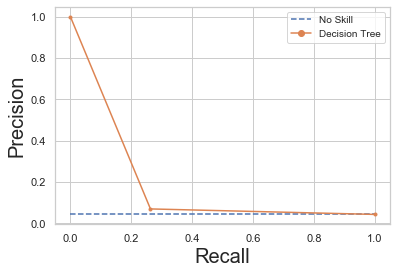

In [138]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
dt_probability = model_dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
dt_probability = dt_probability[:, 1]
# predict class values
y_predict = model_dt.predict(X_test)
dt_precision, dt_recall,i = precision_recall_curve(y_test, dt_probability)
dt_f1, dt_auc = f1_score(y_test, y_predict), auc(dt_recall, dt_precision)
# summarize scores
print('Decision Tree: f1=%.3f auc=%.3f' % (dt_f1, dt_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(dt_recall, dt_precision, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

### 3) Using Extra Trees Classifier

#### Import the package

In [139]:
from sklearn.ensemble import ExtraTreesClassifier

#### Define and train the model

 Model Feature Importances of a Extra Trees Classifier  =  [0.2 0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.2 0.  0.2 0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0. ]


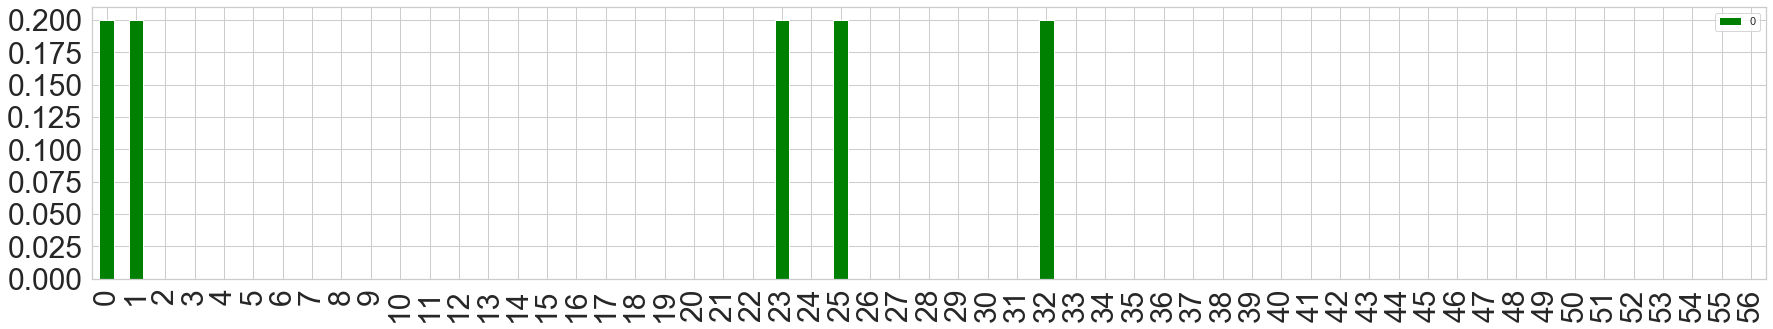

In [140]:
model_et=ExtraTreesClassifier(n_estimators=5,n_jobs=1,criterion="gini",max_depth=1,random_state=5)
model_et.fit(X_train,y_train)
print(" Model Feature Importances of a Extra Trees Classifier  = " ,model_et.feature_importances_)
feature_importances_et=pd.DataFrame(model_et.feature_importances_)
feature_importances_et.plot(kind='bar',color='green',figsize=(30,5),fontsize=30)
y_train_predict=model_et.predict(X_train)
y_predict=model_et.predict(X_test)

In [141]:
print(confusion_matrix(y_test,y_predict))

[[6861    0]
 [ 308    0]]


In [142]:
pd.crosstab(y_test,y_predict,margins=any)

col_0         0   All
Bad_label            
0          6861  6861
1           308   308
All        7169  7169

In [143]:
print("Accuracy of Training = ", accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))

Accuracy of Training =  95.83906259341185
Accuracy of Testing =  95.70372436881016
Precision score =  91.59202858061187
Recall score =  95.70372436881016
F1 score =  93.60274453234591


In [144]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6861
           1       0.00      0.00      0.00       308

    accuracy                           0.96      7169
   macro avg       0.48      0.50      0.49      7169
weighted avg       0.92      0.96      0.94      7169



## ROC Curve

No state AUC score = 0.500 
Extra Tree AUC score = 0.532 


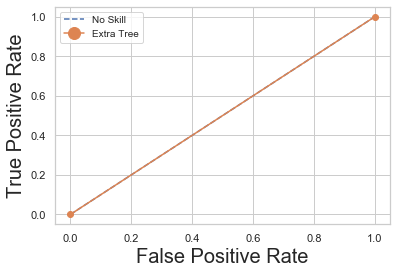

In [145]:
from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
et_probability=model_et.predict_proba(X_test)
et_probability = et_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
et_auc=roc_auc_score(y_test,et_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Extra Tree AUC score = %.3f " %(et_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
et_fpr, et_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(et_fpr, et_tpr, marker='o', label='Extra Tree')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Precision-Recall Curve

Extra Tree: f1=0.000 auc=0.050


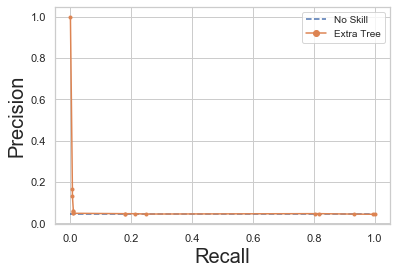

In [146]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
et_probability = model_et.predict_proba(X_test)
# keep probabilities for the positive outcome only
et_probability = et_probability[:, 1]
# predict class values
y_predict = model_et.predict(X_test)
et_precision, et_recall,i = precision_recall_curve(y_test, et_probability)
et_f1, et_auc = f1_score(y_test, y_predict), auc(et_recall, et_precision)
# summarize scores
print('Extra Tree: f1=%.3f auc=%.3f' % (et_f1, et_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(et_recall, et_precision, marker='.', label='Extra Tree')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

### 4) Using XGBoost Classifier

#### Import the package

In [147]:
from xgboost import XGBClassifier

#### Define and train the model

In [148]:
model_xgb=XGBClassifier(max_depth=1,learning_rate=0.1,test_size=0.3,n_estimators=5,n_jobs=1,random_state=5,gamma=0.1)
model_xgb.fit(X_train,y_train)
print(" Model Feature Importances of a XGBoost Classifier = " ,model_xgb.feature_importances_)

 Model Feature Importances of a XGBoost Classifier =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


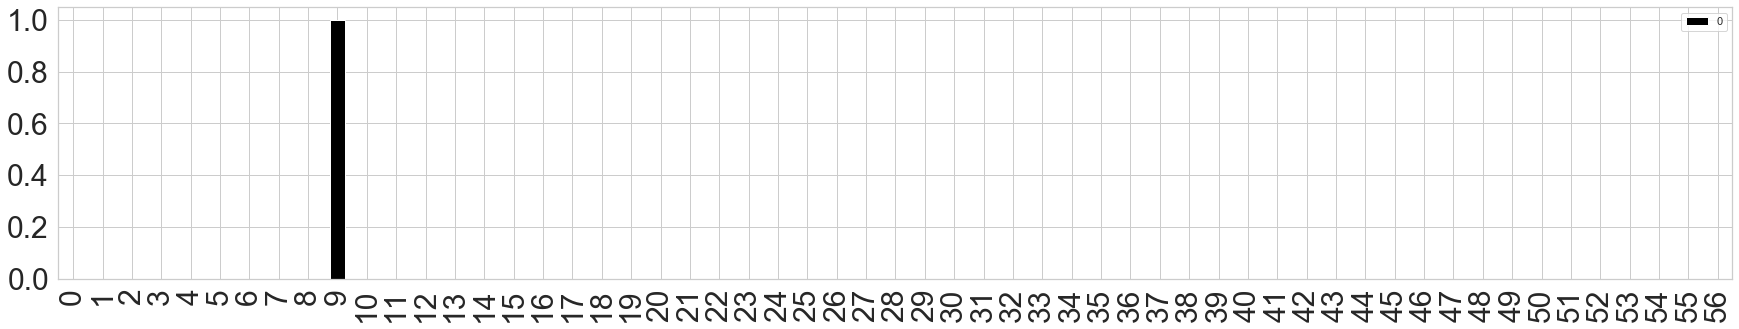

In [149]:
feature_importances_xgb=pd.DataFrame(model_xgb.feature_importances_)
feature_importances_xgb.plot(kind='bar',color='black',figsize=(30,5),fontsize=30)

In [150]:
y_train_predict=model_xgb.predict(X_train)
y_predict=model_xgb.predict(X_test)

In [151]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=any)

[[6861    0]
 [ 308    0]]


col_0         0   All
Bad_label            
0          6861  6861
1           308   308
All        7169  7169

In [152]:
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

Accuracy score of Training =  95.83906259341185
Accuracy score of Testing =  95.70372436881016
Precision score =  91.59202858061187
Recall score =  95.70372436881016
F1 score =  93.60274453234591
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6861
           1       0.00      0.00      0.00       308

    accuracy                           0.96      7169
   macro avg       0.48      0.50      0.49      7169
weighted avg       0.92      0.96      0.94      7169



## ROC Curve

No state AUC score = 0.500 
XGBoost AUC score = 0.587 


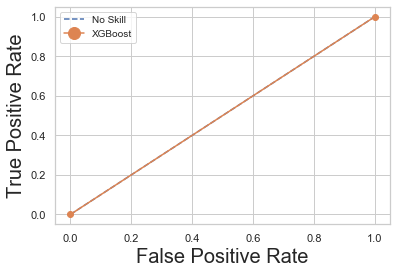

In [153]:
from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
xgb_probability=model_xgb.predict_proba(X_test)
xgb_probability = xgb_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
xgb_auc=roc_auc_score(y_test,xgb_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("XGBoost AUC score = %.3f " %(xgb_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
xgb_fpr, xgb_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='o', label='XGBoost')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Precision-Recall Curve

XGBoost: f1=0.000 auc=0.183


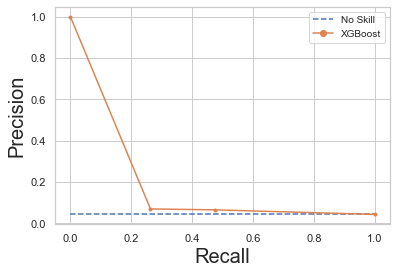

In [154]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
xgb_probability = model_xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_probability = xgb_probability[:, 1]
# predict class values
y_predict = model_xgb.predict(X_test)
xgb_precision, xgb_recall,i = precision_recall_curve(y_test, xgb_probability)
xgb_f1,xgb_auc = f1_score(y_test, y_predict), auc(xgb_recall, xgb_precision)
# summarize scores
print('XGBoost: f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(xgb_recall, xgb_precision, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

### 5) Using Gradient Boosting Classifier

#### Import the package

In [155]:
from sklearn.ensemble import GradientBoostingClassifier

#### Define and train the model

In [156]:
model_gb=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,subsample=1.0,max_depth=1,random_state=5)
model_gb.fit(X_train,y_train)
print(" Model Feature Importances of a Gradient Boosting Classifier = " ,model_gb.feature_importances_)

 Model Feature Importances of a Gradient Boosting Classifier =  [0.07665314 0.08122968 0.         0.073172   0.00827753 0.08762274
 0.         0.         0.         0.3780128  0.00466964 0.
 0.00457683 0.         0.07805763 0.         0.         0.
 0.01580826 0.         0.         0.         0.         0.
 0.         0.         0.03647588 0.         0.         0.01711311
 0.         0.         0.         0.         0.         0.
 0.09373032 0.         0.         0.         0.         0.01550385
 0.         0.         0.         0.         0.00388339 0.
 0.         0.         0.         0.         0.         0.
 0.02521321 0.         0.        ]


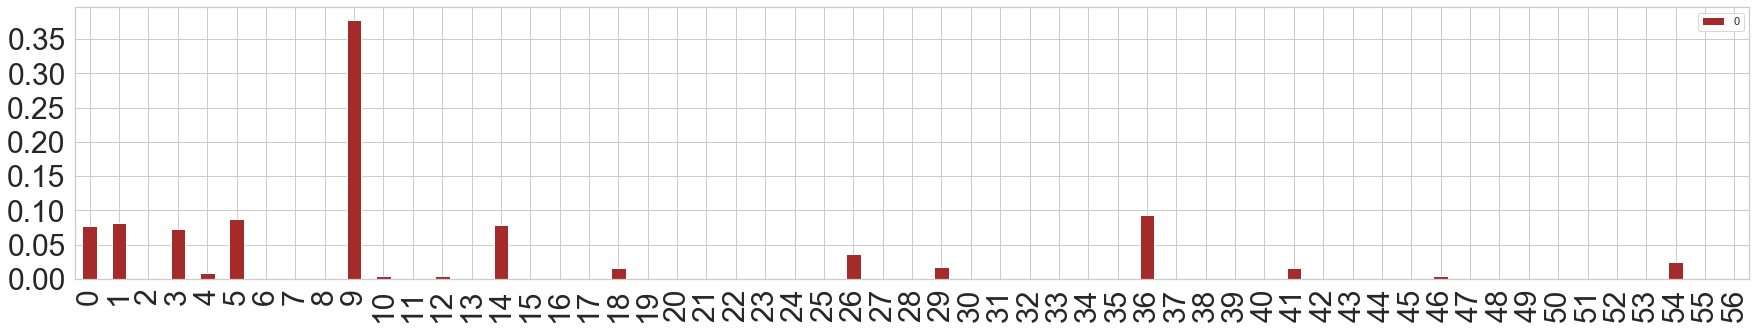

In [157]:
feature_importances_gb=pd.DataFrame(model_gb.feature_importances_)
feature_importances_gb.plot(kind='bar',color='brown',figsize=(30,5),fontsize=30)

In [158]:
y_train_predict=model_gb.predict(X_train)
y_predict=model_gb.predict(X_test)

In [159]:
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=any)

[[6861    0]
 [ 308    0]]


col_0         0   All
Bad_label            
0          6861  6861
1           308   308
All        7169  7169

In [160]:
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

Accuracy score of Training =  95.83906259341185
Accuracy score of Testing =  95.70372436881016
Precision score =  91.59202858061187
Recall score =  95.70372436881016
F1 score =  93.60274453234591
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6861
           1       0.00      0.00      0.00       308

    accuracy                           0.96      7169
   macro avg       0.48      0.50      0.49      7169
weighted avg       0.92      0.96      0.94      7169



## ROC Curve

No state AUC score = 0.500 
Gradient Boosting AUC score = 0.661 


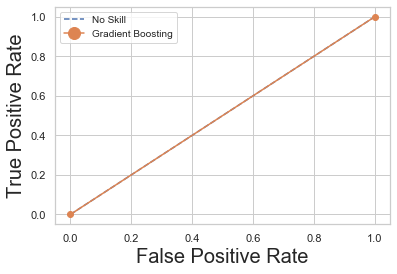

In [161]:
from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
gb_probability=model_gb.predict_proba(X_test)
gb_probability = gb_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
gb_auc=roc_auc_score(y_test,gb_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Gradient Boosting AUC score = %.3f " %(gb_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
gb_fpr, gb_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(gb_fpr, gb_tpr, marker='o', label='Gradient Boosting')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Precision-Recall Curve

Gradient Boosting: f1=0.000 auc=0.078


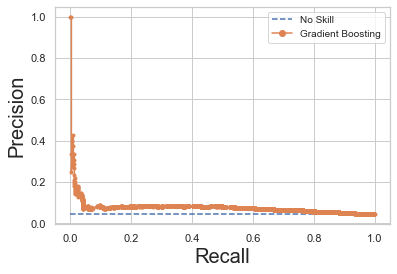

In [162]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
gb_probability = model_gb.predict_proba(X_test)
# keep probabilities for the positive outcome only
gb_probability = gb_probability[:, 1]
# predict class values
y_predict = model_gb.predict(X_test)
gb_precision, gb_recall,i = precision_recall_curve(y_test, gb_probability)
gb_f1,gb_auc = f1_score(y_test, y_predict), auc(gb_recall, gb_precision)
# summarize scores
print('Gradient Boosting: f1=%.3f auc=%.3f' % (gb_f1, gb_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(gb_recall, gb_precision, marker='.', label='Gradient Boosting')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

### 6) Using Logistic Regression

In [163]:
from sklearn.linear_model import LogisticRegression

Model Feature Importances of a Logistic Regression =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


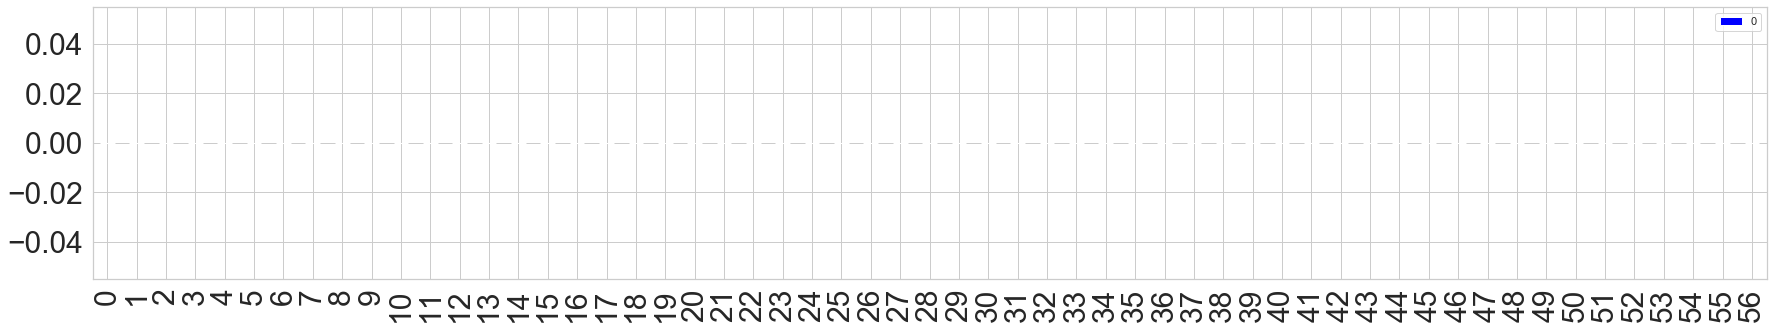

In [164]:
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)
print("Model Feature Importances of a Logistic Regression = ", model_lr.coef_[0])
feature_importances_lr=pd.DataFrame(model_lr.coef_[0])
feature_importances_lr.plot(kind='bar',color='blue',figsize=(30,5),fontsize=30)

In [165]:
y_train_predict=model_lr.predict(X_train)
y_predict=model_lr.predict(X_test)

In [166]:
pd.crosstab(y_test,y_predict,margins=any)

col_0         0   All
Bad_label            
0          6861  6861
1           308   308
All        7169  7169

In [167]:
print(confusion_matrix(y_test,y_predict))
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[6861    0]
 [ 308    0]]
Accuracy score of Training =  95.83906259341185
Accuracy score of Testing =  95.70372436881016
Precision score =  91.59202858061187
Recall score =  95.70372436881016
F1 score =  93.60274453234591
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6861
           1       0.00      0.00      0.00       308

    accuracy                           0.96      7169
   macro avg       0.48      0.50      0.49      7169
weighted avg       0.92      0.96      0.94      7169



## ROC Curve

No state AUC score = 0.500 
Logistic Regression AUC score = 0.500 


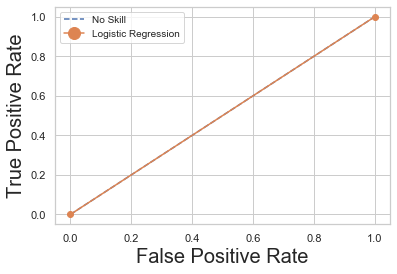

In [168]:
from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
lr_probability=model_lr.predict_proba(X_test)
lr_probability = lr_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
lr_auc=roc_auc_score(y_test,lr_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Logistic Regression AUC score = %.3f " %(lr_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
lr_fpr, lr_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='o', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Precision-Recall Curve

Logistic Regression: f1=0.000 auc=0.521


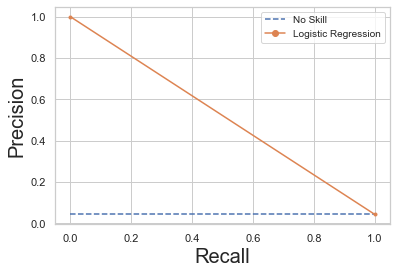

In [169]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
lr_probability = model_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probability = lr_probability[:, 1]
# predict class values
y_predict = model_lr.predict(X_test)
lr_precision, lr_recall,i = precision_recall_curve(y_test, lr_probability)
lr_f1,lr_auc = f1_score(y_test, y_predict), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

# ---------------------------------------------------------------------------------------------------------------

## 3.2] Merging Cust_Account with Cust_Demographics and implementing the model 

In [170]:
data1.head()

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0  10-Nov-15        12265  20-Oct-15          6            1       1755   
1  10-Nov-15        12265  20-Oct-15         10            1       5013   
2  10-Nov-15        12265  20-Oct-15         10            1       4391   
3  20-Jul-15        15606  09-Jul-15         10            1       2526   
4  20-Jul-15        15606  09-Jul-15          6            1       3543   

   last_paymt_dt  closed_dt reporting_dt  high_credit_amt  ...  cashlimit  \
0           4345  05-Jul-14    30-Sep-15          20900.0  ...     1400.0   
1            889  05-Jul-14    03-Oct-15          16201.0  ...     1400.0   
2           4425  05-Jul-14    30-Sep-15          41028.0  ...     1400.0   
3           4425  26-Jul-07    31-Jan-09          93473.0  ...     1400.0   
4            707  26-Jul-07    31-May-15          20250.0  ...     1400.0   

   rateofinterest  paymentfrequency  actualpaymentamount payment_history_avg  \
0              39               3.0               5603.0         6867.553033   
1              39               3.0               5603.0         6867.553033   
2              39               3.0               5603.0         6867.553033   
3              39               3.0               5603.0         6867.553033   
4              39               3.0               5603.0         6867.553033   

  total_diff_lastpaymt_opened_dt  Ratio_currbalance_creditlimit  \
0                           2590                       0.000000   
1                          -4124                       0.742143   
2                             34                       2.458571   
3                           1899                       0.000000   
4                          -2836                       0.964286   

   mean_diff_lastpaymt_opened_dt payment_history_mean_length  \
0                   -1618.902377                      186329   
1                   -1618.902377                      186329   
2                   -1618.902377                      186329   
3                   -1618.902377                      186329   
4                   -1618.902377                      186329   

   utilisation_trend  
0           0.000000  
1           0.923429  
2           3.059137  
3           0.000000  
4           1.199836  

[5 rows x 27 columns]

In [171]:
Bad_label=data2['Bad_label']
data_Account_Demographics=data1.join(Bad_label)

In [172]:
data_Account_Demographics.head()

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0  10-Nov-15        12265  20-Oct-15          6            1       1755   
1  10-Nov-15        12265  20-Oct-15         10            1       5013   
2  10-Nov-15        12265  20-Oct-15         10            1       4391   
3  20-Jul-15        15606  09-Jul-15         10            1       2526   
4  20-Jul-15        15606  09-Jul-15          6            1       3543   

   last_paymt_dt  closed_dt reporting_dt  high_credit_amt  ...  \
0           4345  05-Jul-14    30-Sep-15          20900.0  ...   
1            889  05-Jul-14    03-Oct-15          16201.0  ...   
2           4425  05-Jul-14    30-Sep-15          41028.0  ...   
3           4425  26-Jul-07    31-Jan-09          93473.0  ...   
4            707  26-Jul-07    31-May-15          20250.0  ...   

   rateofinterest  paymentfrequency  actualpaymentamount  payment_history_avg  \
0              39               3.0               5603.0          6867.553033   
1              39               3.0               5603.0          6867.553033   
2              39               3.0               5603.0          6867.553033   
3              39               3.0               5603.0          6867.553033   
4              39               3.0               5603.0          6867.553033   

  total_diff_lastpaymt_opened_dt Ratio_currbalance_creditlimit  \
0                           2590                      0.000000   
1                          -4124                      0.742143   
2                             34                      2.458571   
3                           1899                      0.000000   
4                          -2836                      0.964286   

   mean_diff_lastpaymt_opened_dt  payment_history_mean_length  \
0                   -1618.902377                       186329   
1                   -1618.902377                       186329   
2                   -1618.902377                       186329   
3                   -1618.902377                       186329   
4                   -1618.902377                       186329   

  utilisation_trend  Bad_label  
0          0.000000        0.0  
1          0.923429        0.0  
2          3.059137        0.0  
3          0.000000        0.0  
4          1.199836        0.0  

[5 rows x 28 columns]

In [173]:
data_Account_Demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   dt_opened                       186329 non-null  object 
 1   customer_no                     186329 non-null  int64  
 2   upload_dt                       186329 non-null  object 
 3   acct_type                       186329 non-null  int64  
 4   owner_indic                     186329 non-null  int64  
 5   opened_dt                       186329 non-null  int32  
 6   last_paymt_dt                   186329 non-null  int32  
 7   closed_dt                       186329 non-null  object 
 8   reporting_dt                    186329 non-null  object 
 9   high_credit_amt                 186329 non-null  float64
 10  cur_balance_amt                 186329 non-null  int64  
 11  amt_past_due                    186329 non-null  float64
 12  paymenthistory1 

In [174]:
data_Account_Demographics.describe()

customer_no      acct_type    owner_indic      opened_dt  \
count  186329.000000  186329.000000  186329.000000  186329.000000   
mean    11431.820447       8.403104       1.122128    3539.723151   
std      6730.432139       5.179466       0.567040    1791.797064   
min         1.000000       0.000000       1.000000       0.000000   
25%      5879.000000       6.000000       1.000000    2044.000000   
50%     11169.000000      10.000000       1.000000    3671.000000   
75%     16982.000000      10.000000       1.000000    5141.000000   
max     23896.000000      59.000000       4.000000    6244.000000   

       last_paymt_dt  high_credit_amt  cur_balance_amt  amt_past_due  \
count  186329.000000     1.863290e+05     1.863290e+05  1.863290e+05   
mean     1920.820774     1.802378e+05     7.640269e+04  1.837156e+04   
std      1385.169956     9.975305e+05     6.186783e+05  1.143562e+05   
min         0.000000     1.000000e+00    -7.355205e+06  1.000000e+00   
25%       695.000000     2.289800e+04     0.000000e+00  1.790000e+02   
50%      1473.000000     4.542400e+04     0.000000e+00  1.378000e+03   
75%      3217.000000     1.074590e+05     2.099800e+04  8.248000e+03   
max      4509.000000     1.800000e+08     1.360100e+08  4.869309e+06   

       paymenthistory1  paymenthistory2  ...       cashlimit  \
count    186329.000000    186329.000000  ...   186329.000000   
mean       3938.203908      2929.349124  ...    20429.387481   
std        6012.866354      4195.738916  ...    24196.013211   
min           0.000000         0.000000  ...        1.000000   
25%           9.000000        12.000000  ...     7200.000000   
50%          17.000000        17.000000  ...    12600.000000   
75%        7073.000000      5486.000000  ...    27000.000000   
max       18310.000000     11910.000000  ...  1000000.000000   

       paymentfrequency  actualpaymentamount  payment_history_avg  \
count     186329.000000         1.863290e+05         1.863290e+05   
mean           2.995674         2.949781e+04         6.867553e+03   
std            0.092912         2.266878e+05         2.471104e-09   
min            1.000000         1.000000e+00         6.867553e+03   
25%            3.000000         3.205000e+03         6.867553e+03   
50%            3.000000         8.000000e+03         6.867553e+03   
75%            3.000000         1.881700e+04         6.867553e+03   
max            3.000000         6.785322e+07         6.867553e+03   

       total_diff_lastpaymt_opened_dt  Ratio_currbalance_creditlimit  \
count                   186329.000000                  186329.000000   
mean                     -1618.902377                       5.778230   
std                       2288.180675                    1179.625914   
min                      -6226.000000                    -735.520500   
25%                      -3392.000000                       0.000000   
50%                      -1649.000000                       0.000000   
75%                        -44.000000                       0.376850   
max                       4490.000000                  399360.000000   

       mean_diff_lastpaymt_opened_dt  payment_history_mean_length  \
count                   1.863290e+05                     186329.0   
mean                   -1.618902e+03                     186329.0   
std                     2.130724e-09                          0.0   
min                    -1.618902e+03                     186329.0   
25%                    -1.618902e+03                     186329.0   
50%                    -1.618902e+03                     186329.0   
75%                    -1.618902e+03                     186329.0   
max                    -1.618902e+03                     186329.0   

       utilisation_trend     Bad_label  
count      186329.000000  23896.000000  
mean            7.189703      0.042015  
std          1467.778136      0.200628  
min          -915.189210      0.000000  
25%             0.000000      0.000000  
50%             0.0000

In [175]:
data_Account_Demographics.dtypes

dt_opened                          object
customer_no                         int64
upload_dt                          object
acct_type                           int64
owner_indic                         int64
opened_dt                           int32
last_paymt_dt                       int32
closed_dt                          object
reporting_dt                       object
high_credit_amt                   float64
cur_balance_amt                     int64
amt_past_due                      float64
paymenthistory1                     int32
paymenthistory2                     int32
paymt_str_dt                       object
paymt_end_dt                       object
creditlimit                       float64
cashlimit                         float64
rateofinterest                     object
paymentfrequency                  float64
actualpaymentamount               float64
payment_history_avg               float64
total_diff_lastpaymt_opened_dt      int32
Ratio_currbalance_creditlimit     

In [176]:
data_Account_Demographics.isna().sum().to_frame()

0
dt_opened                            0
customer_no                          0
upload_dt                            0
acct_type                            0
owner_indic                          0
opened_dt                            0
last_paymt_dt                        0
closed_dt                            0
reporting_dt                         0
high_credit_amt                      0
cur_balance_amt                      0
amt_past_due                         0
paymenthistory1                      0
paymenthistory2                      0
paymt_str_dt                         0
paymt_end_dt                         0
creditlimit                          0
cashlimit                            0
rateofinterest                       0
paymentfrequency                     0
actualpaymentamount                  0
payment_history_avg                  0
total_diff_lastpaymt_opened_dt       0
Ratio_currbalance_creditlimit        0
mean_diff_lastpaymt_opened_dt        0
payment_history_mean_length          0
utilisation_trend                    0
Bad_label                       162433

In [177]:
data_Account_Demographics.fillna(method='ffill',inplace=True)

In [178]:
data_Account_Demographics.isna().sum().to_frame()

0
dt_opened                       0
customer_no                     0
upload_dt                       0
acct_type                       0
owner_indic                     0
opened_dt                       0
last_paymt_dt                   0
closed_dt                       0
reporting_dt                    0
high_credit_amt                 0
cur_balance_amt                 0
amt_past_due                    0
paymenthistory1                 0
paymenthistory2                 0
paymt_str_dt                    0
paymt_end_dt                    0
creditlimit                     0
cashlimit                       0
rateofinterest                  0
paymentfrequency                0
actualpaymentamount             0
payment_history_avg             0
total_diff_lastpaymt_opened_dt  0
Ratio_currbalance_creditlimit   0
mean_diff_lastpaymt_opened_dt   0
payment_history_mean_length     0
utilisation_trend               0
Bad_label                       0

In [179]:
data_Account_Demographics.count()

dt_opened                         186329
customer_no                       186329
upload_dt                         186329
acct_type                         186329
owner_indic                       186329
opened_dt                         186329
last_paymt_dt                     186329
closed_dt                         186329
reporting_dt                      186329
high_credit_amt                   186329
cur_balance_amt                   186329
amt_past_due                      186329
paymenthistory1                   186329
paymenthistory2                   186329
paymt_str_dt                      186329
paymt_end_dt                      186329
creditlimit                       186329
cashlimit                         186329
rateofinterest                    186329
paymentfrequency                  186329
actualpaymentamount               186329
payment_history_avg               186329
total_diff_lastpaymt_opened_dt    186329
Ratio_currbalance_creditlimit     186329
mean_diff_lastpa

### Detecting the outliers

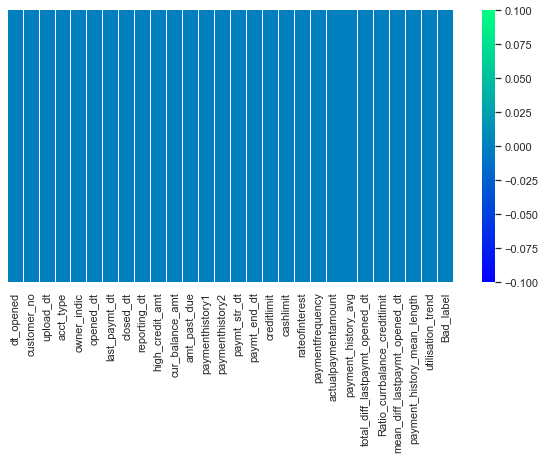

In [180]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data_Account_Demographics.isnull(),yticklabels=False,cbar=True,cmap='winter')

## Generating the Correlation Matrix for Cust_Account_Demographics data

In [181]:
corr_Account_Demographics=data_Account_Demographics.corr()
corr_Account_Demographics

customer_no     acct_type   owner_indic  \
customer_no                     1.000000e+00  2.400909e-03 -9.511131e-03   
acct_type                       2.400909e-03  1.000000e+00 -8.503243e-02   
owner_indic                    -9.511131e-03 -8.503243e-02  1.000000e+00   
opened_dt                      -5.681111e-03 -3.158573e-02  3.869421e-02   
last_paymt_dt                   1.150056e-02  9.257302e-02  1.331766e-02   
high_credit_amt                -1.363167e-02 -6.644059e-02  2.555419e-01   
cur_balance_amt                -5.074271e-03 -8.430043e-02  2.279362e-01   
amt_past_due                   -7.494869e-03  2.778470e-03  1.767759e-03   
paymenthistory1                -6.106957e-03 -7.506959e-02  3.992206e-02   
paymenthistory2                 1.924442e-02 -1.176766e-02  2.561578e-02   
creditlimit                    -6.901914e-03  3.259024e-03  3.111445e-02   
cashlimit                      -7.118445e-03  4.959635e-03  2.375378e-02   
paymentfrequency                2.275210e-02  2.421050e-02 -7.411508e-02   
actualpaymentamount            -9.478220e-03 -1.737900e-02  3.663150e-02   
payment_history_avg             1.659865e-15 -8.809132e-16 -2.062352e-15   
total_diff_lastpaymt_opened_dt  1.141065e-02  8.077360e-02 -2.223817e-02   
Ratio_currbalance_creditlimit  -2.009770e-03 -4.697331e-03  2.365631e-03   
mean_diff_lastpaymt_opened_dt   8.310142e-15  1.659588e-15 -2.199276e-15   
payment_history_mean_length              NaN           NaN           NaN   
utilisation_trend              -2.009770e-03 -4.697331e-03  2.365631e-03   
Bad_label                      -4.650816e-04 -4.652688e-03  3.023164e-03   

                                   opened_dt  last_paymt_dt  high_credit_amt  \
customer_no                    -5.681111e-03   1.150056e-02    -1.363167e-02   
acct_type                      -3.158573e-02   9.257302e-02    -6.644059e-02   
owner_indic                     3.869421e-02   1.331766e-02     2.555419e-01   
opened_dt                       1.000000e+00  -2.146267e-02     2.419563e-02   
last_paymt_dt                  -2.146267e-02   1.000000e+00     6.965235e-03   
high_credit_amt                 2.419563e-02   6.965235e-03     1.000000e+00   
cur_balance_amt                 2.864594e-02  -5.582549e-03     7.265598e-01   
amt_past_due                   -1.158817e-03   6.830935e-03     1.694658e-03   
paymenthistory1                -1.287544e-02  -1.226916e-02     1.220080e-02   
paymenthistory2                 2.212041e-03   1.927256e-02     1.096830e-02   
creditlimit                    -3.382777e-03   1.082522e-02     5.382383e-02   
cashlimit                      -2.450516e-03   2.302894e-02     3.017579e-02   
paymentfrequency               -4.524876e-03   3.086265e-03    -3.624532e-02   
actualpaymentamount             8.661636e-03   4.849341e-03     3.499377e-01   
payment_history_avg             9.665053e-15   7.654709e-15     1.569182e-15   
total_diff_lastpaymt_opened_dt -7.960589e-01   6.221653e-01    -1.473032e-02   
Ratio_currbalance_creditlimit   4.558130e-04  -6.802165e-04     1.567131e-02   
mean_diff_lastpaymt_opened_dt   6.067692e-16   9.988324e-15     4.470325e-15   
payment_history_mean_length              NaN            NaN              NaN   
utilisation_trend               4.558130e-04  -6.802165e-04     1.567131e-02   
Bad_label                      -1.478574e-03  -2.374290e-03    -4.647026e-04   

                                cur_balance_amt  amt_past_due  \
customer_no                       -5.074271e-03 -7.494869e-03   
acct_type                         -8.430043e-02  2.778470e-03   
owner_indic                        2.279362e-01  1.767759e-03   
opened_dt                          2.864594e-02 -1.158817e-03   
last_paymt_dt                     -5.582549e-03  6.830935e-03   
high_credit_amt                    7.265598e-01  1.694658e-03   
cur_balance_amt                    1.000000e+00  1.553317e-03   
amt_past_due                       1.553317e-03  1.000000e+00   
paymenthistory

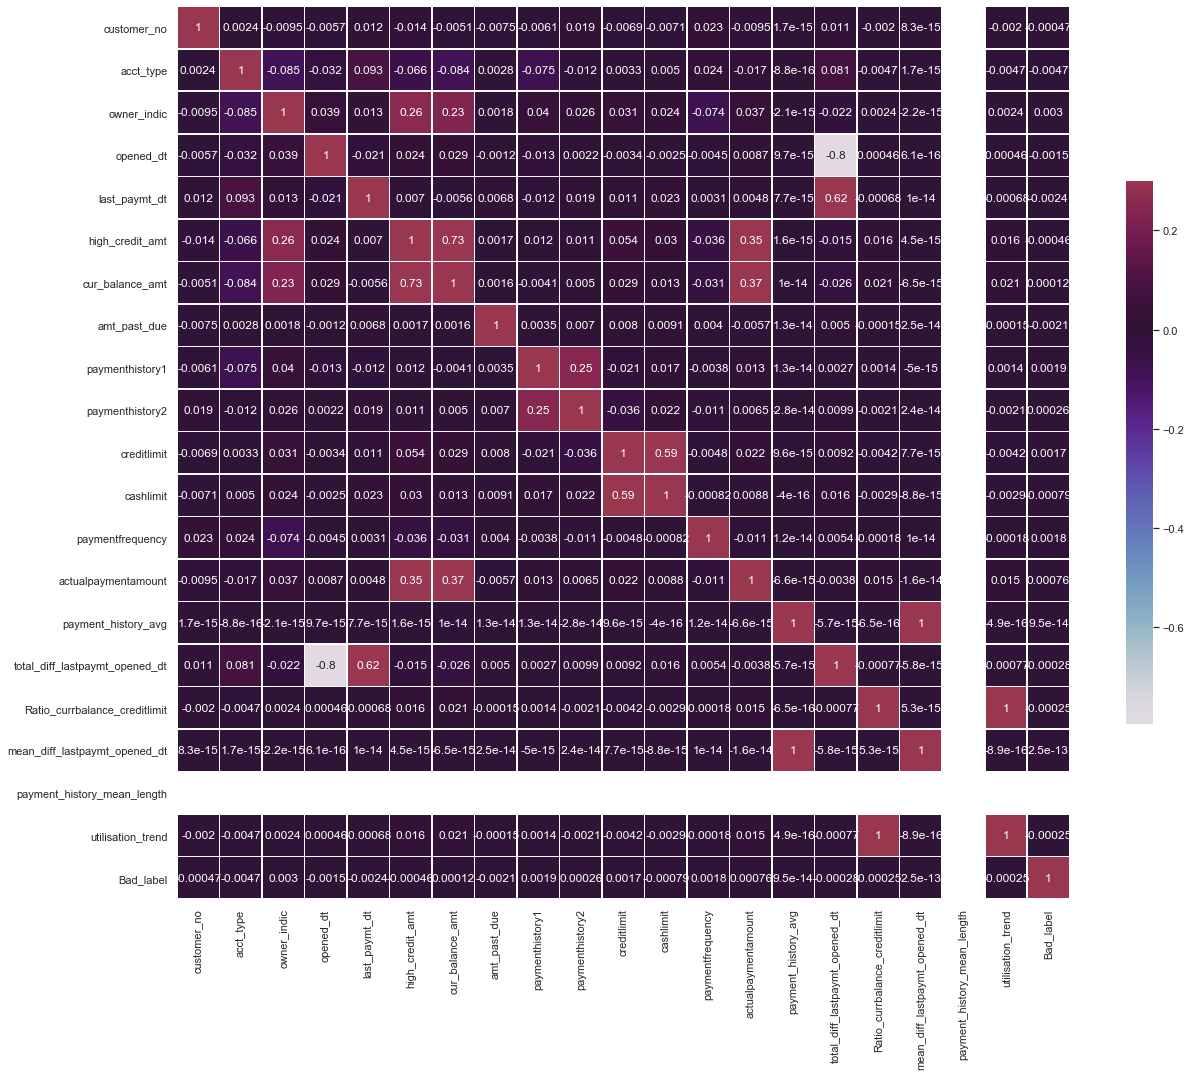

In [182]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_Account_Demographics, cmap='twilight', vmax=.3, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5}, annot=True)

### Using Label Encoding to convert the categorical data into numericals

In [183]:
enc1=LabelEncoder()
data_Account_Demographics.dt_opened=enc1.fit_transform(data_Account_Demographics.dt_opened)
data_Account_Demographics.upload_dt=enc1.fit_transform(data_Account_Demographics.upload_dt)
data_Account_Demographics.closed_dt=enc1.fit_transform(data_Account_Demographics.closed_dt)
data_Account_Demographics.reporting_dt=enc1.fit_transform(data_Account_Demographics.reporting_dt)
data_Account_Demographics.paymt_str_dt=enc1.fit_transform(data_Account_Demographics.paymt_str_dt)
data_Account_Demographics.paymt_end_dt=enc1.fit_transform(data_Account_Demographics.paymt_end_dt)

In [184]:
data_Account_Demographics.drop(labels='rateofinterest',axis=1,inplace=True)

In [185]:
data_Account_Demographics.head()

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0         59        12265         45          6            1       1755   
1         59        12265         45         10            1       5013   
2         59        12265         45         10            1       4391   
3        115        15606         19         10            1       2526   
4        115        15606         19          6            1       3543   

   last_paymt_dt  closed_dt  reporting_dt  high_credit_amt  ...  cashlimit  \
0           4345        720          1795          20900.0  ...     1400.0   
1            889        720           196          16201.0  ...     1400.0   
2           4425        720          1795          41028.0  ...     1400.0   
3           4425       4022          1823          93473.0  ...     1400.0   
4            707       4022          1864          20250.0  ...     1400.0   

   paymentfrequency  actualpaymentamount  payment_history_avg  \
0               3.0               5603.0          6867.553033   
1               3.0               5603.0          6867.553033   
2               3.0               5603.0          6867.553033   
3               3.0               5603.0          6867.553033   
4               3.0               5603.0          6867.553033   

   total_diff_lastpaymt_opened_dt  Ratio_currbalance_creditlimit  \
0                            2590                       0.000000   
1                           -4124                       0.742143   
2                              34                       2.458571   
3                            1899                       0.000000   
4                           -2836                       0.964286   

   mean_diff_lastpaymt_opened_dt  payment_history_mean_length  \
0                   -1618.902377                       186329   
1                   -1618.902377                       186329   
2                   -1618.902377                       186329   
3                   -1618.902377                       186329   
4                   -1618.902377                       186329   

   utilisation_trend  Bad_label  
0           0.000000        0.0  
1           0.923429        0.0  
2           3.059137        0.0  
3           0.000000        0.0  
4           1.199836        0.0  

[5 rows x 27 columns]

### Define X and y variables

In [186]:
X = data_Account_Demographics.loc[:,data_Account_Demographics.columns!='Bad_label']
X.head()

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0         59        12265         45          6            1       1755   
1         59        12265         45         10            1       5013   
2         59        12265         45         10            1       4391   
3        115        15606         19         10            1       2526   
4        115        15606         19          6            1       3543   

   last_paymt_dt  closed_dt  reporting_dt  high_credit_amt  ...  creditlimit  \
0           4345        720          1795          20900.0  ...      14000.0   
1            889        720           196          16201.0  ...      14000.0   
2           4425        720          1795          41028.0  ...      14000.0   
3           4425       4022          1823          93473.0  ...      14000.0   
4            707       4022          1864          20250.0  ...      14000.0   

   cashlimit  paymentfrequency  actualpaymentamount  payment_history_avg  \
0     1400.0               3.0               5603.0          6867.553033   
1     1400.0               3.0               5603.0          6867.553033   
2     1400.0               3.0               5603.0          6867.553033   
3     1400.0               3.0               5603.0          6867.553033   
4     1400.0               3.0               5603.0          6867.553033   

   total_diff_lastpaymt_opened_dt  Ratio_currbalance_creditlimit  \
0                            2590                       0.000000   
1                           -4124                       0.742143   
2                              34                       2.458571   
3                            1899                       0.000000   
4                           -2836                       0.964286   

   mean_diff_lastpaymt_opened_dt  payment_history_mean_length  \
0                   -1618.902377                       186329   
1                   -1618.902377                       186329   
2                   -1618.902377                       186329   
3                   -1618.902377                       186329   
4                   -1618.902377                       186329   

   utilisation_trend  
0           0.000000  
1           0.923429  
2           3.059137  
3           0.000000  
4           1.199836  

[5 rows x 26 columns]

In [187]:
y = data_Account_Demographics.Bad_label
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Bad_label, dtype: float64

### Splitting the data into training data and testing data using train-test split

In [188]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (130430, 26)
X_test shape =  (55899, 26)
y_train shape =  (130430,)
y_test shape =  (55899,)


### 1) Random Forest Classifier

 Model Feature Importances of a Random Forest Classifier =  [0.  0.2 0.1 0.  0.  0.1 0.  0.  0.  0.  0.1 0.  0.1 0.1 0.  0.  0.1 0.
 0.  0.2 0.  0.  0.  0.  0.  0. ]


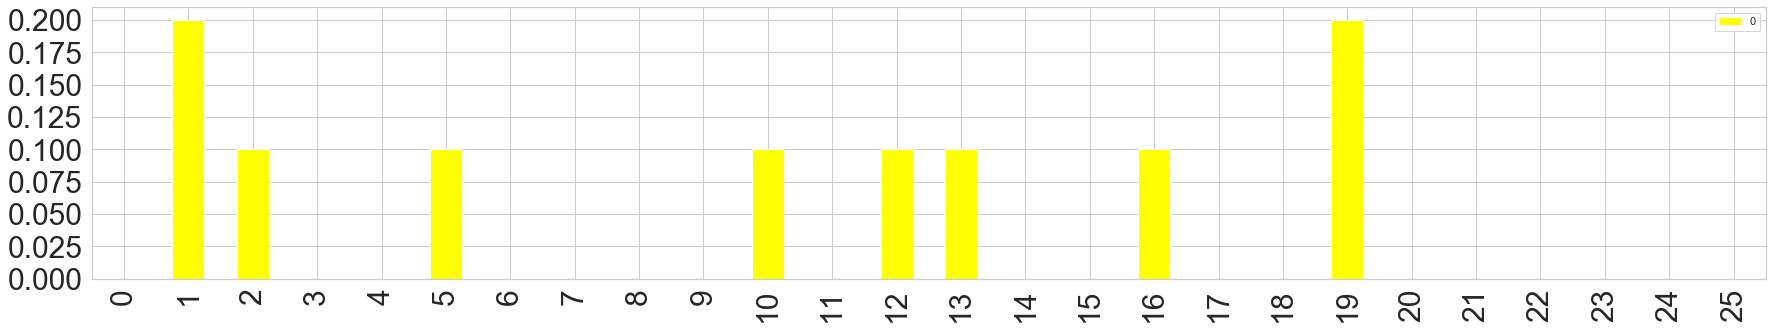

In [189]:
model_rf=RandomForestClassifier(n_estimators=10,criterion="gini",max_depth=1,n_jobs=1,random_state=5)
model_rf.fit(X_train,y_train)
print(" Model Feature Importances of a Random Forest Classifier = " ,model_rf.feature_importances_)
feature_importances_rf=pd.DataFrame(model_rf.feature_importances_)
feature_importances_rf.plot(kind='bar',color='yellow',figsize=(30,5),fontsize=30)

In [190]:
y_train_predict=model_rf.predict(X_train)
y_predict=model_rf.predict(X_test)

In [191]:
pd.crosstab(y_test,y_predict,margins=any)

col_0        0.0    All
Bad_label              
0.0        55592  55592
1.0          307    307
All        55899  55899

In [192]:
print(confusion_matrix(y_test,y_predict))
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[55592     0]
 [  307     0]]
Accuracy score of Training =  99.46561373917044
Accuracy score of Testing =  99.45079518417145
Precision score =  98.90460662764019
Recall score =  99.45079518417145
F1 score =  99.17694891746346
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     55592
         1.0       0.00      0.00      0.00       307

    accuracy                           0.99     55899
   macro avg       0.50      0.50      0.50     55899
weighted avg       0.99      0.99      0.99     55899



## ROC Curve

No state AUC score = 0.500 
Random Forest AUC score = 0.529 


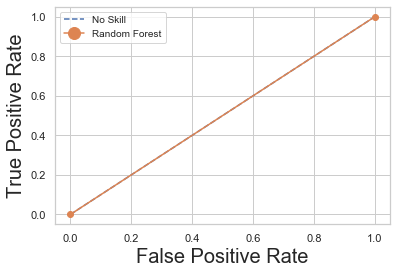

In [193]:
from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
rf_probability=model_rf.predict_proba(X_test)
rf_probability = rf_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
rf_auc=roc_auc_score(y_test,rf_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Random Forest AUC score = %.3f " %(rf_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
rf_fpr, rf_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='o', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Precision-Recall Curve

Random forest: f1=0.000 auc=0.006


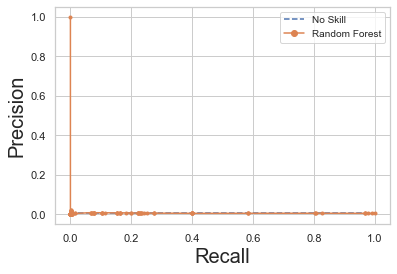

In [194]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
rf_probability = model_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probability = rf_probability[:, 1]
# predict class values
y_predict = model_rf.predict(X_test)
rf_precision, rf_recall,i = precision_recall_curve(y_test, rf_probability)
rf_f1, rf_auc = f1_score(y_test, y_predict), auc(rf_recall, rf_precision)
# summarize scores
print('Random forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

### 2) Decision Tree Classifier

 Model Feature Importances of a Decision Tree Classifier =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


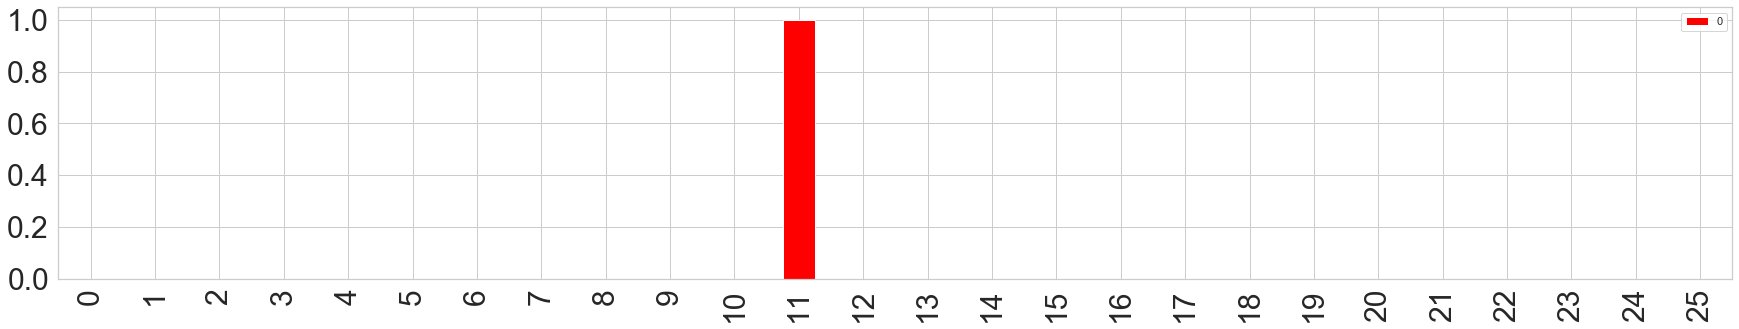

In [195]:
model_dt=DecisionTreeClassifier(splitter='best',criterion="gini",max_depth=1,random_state=5)
model_dt.fit(X_train,y_train)
print(" Model Feature Importances of a Decision Tree Classifier = " ,model_dt.feature_importances_)
feature_importances_dt=pd.DataFrame(model_dt.feature_importances_)
feature_importances_dt.plot(kind='bar',color='red',figsize=(30,5),fontsize=30)

In [196]:
y_train_predict=model_dt.predict(X_train)
y_predict=model_dt.predict(X_test)

In [197]:
pd.crosstab(y_test,y_predict,margins=any)

col_0        0.0    All
Bad_label              
0.0        55592  55592
1.0          307    307
All        55899  55899

In [198]:
print(confusion_matrix(y_test,y_predict))
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[55592     0]
 [  307     0]]
Accuracy score of Training =  99.46561373917044
Accuracy score of Testing =  99.45079518417145
Precision score =  98.90460662764019
Recall score =  99.45079518417145
F1 score =  99.17694891746346
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     55592
         1.0       0.00      0.00      0.00       307

    accuracy                           0.99     55899
   macro avg       0.50      0.50      0.50     55899
weighted avg       0.99      0.99      0.99     55899



## ROC Curve

No state AUC score = 0.500 
Decision Tree AUC score = 0.591 


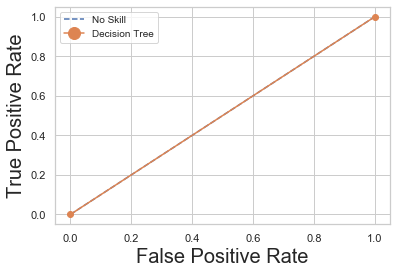

In [199]:
from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
dt_probability=model_dt.predict_proba(X_test)
dt_probability = dt_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
dt_auc=roc_auc_score(y_test,dt_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Decision Tree AUC score = %.3f " %(dt_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
dt_fpr, dt_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(dt_fpr, dt_tpr, marker='o', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Precision-Recall Curve

Decision Tree: f1=0.000 auc=0.263


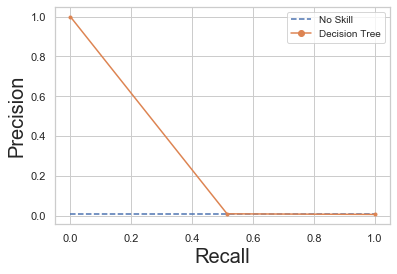

In [200]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
dt_probability = model_dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
dt_probability = dt_probability[:, 1]
# predict class values
y_predict = model_dt.predict(X_test)
dt_precision, dt_recall,i = precision_recall_curve(y_test, dt_probability)
dt_f1, dt_auc = f1_score(y_test, y_predict), auc(dt_recall, dt_precision)
# summarize scores
print('Decision Tree: f1=%.3f auc=%.3f' % (dt_f1, dt_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(dt_recall, dt_precision, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

### 3) Extra Trees Classifier

 Model Feature Importances of a Extra Trees Classifier  =  [0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.1 0.1 0.  0.
 0.3 0.  0.  0.3 0.  0.  0.  0. ]


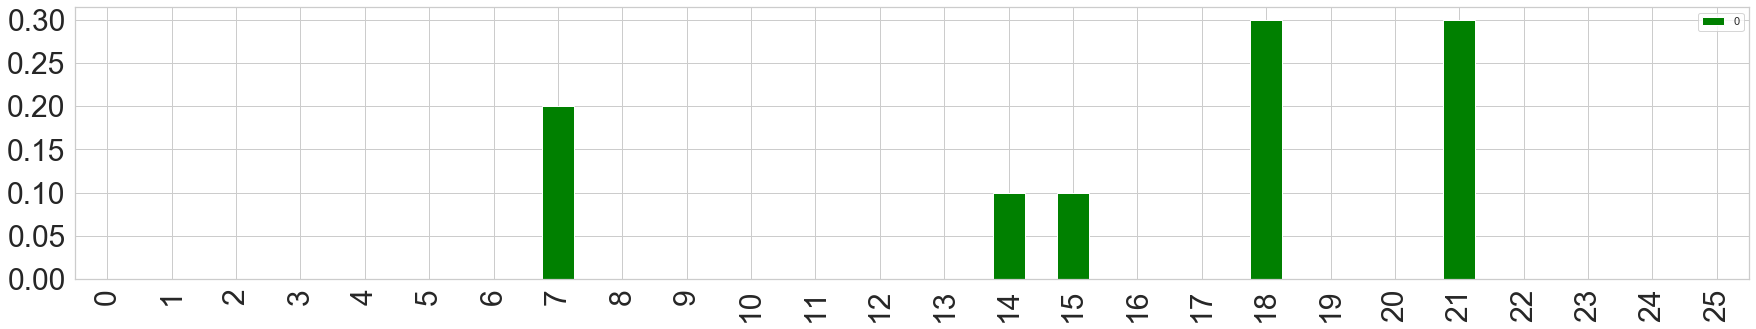

In [201]:
model_et=ExtraTreesClassifier(n_estimators=10,n_jobs=1,criterion="gini",max_depth=1,random_state=5)
model_et.fit(X_train,y_train)
print(" Model Feature Importances of a Extra Trees Classifier  = " ,model_et.feature_importances_)
feature_importances_et=pd.DataFrame(model_et.feature_importances_)
feature_importances_et.plot(kind='bar',color='green',figsize=(30,5),fontsize=30)

In [202]:
y_train_predict=model_et.predict(X_train)
y_predict=model_et.predict(X_test)

In [203]:
pd.crosstab(y_test,y_predict,margins=any)

col_0        0.0    All
Bad_label              
0.0        55592  55592
1.0          307    307
All        55899  55899

In [204]:
print(confusion_matrix(y_test,y_predict))
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[55592     0]
 [  307     0]]
Accuracy score of Training =  99.46561373917044
Accuracy score of Testing =  99.45079518417145
Precision score =  98.90460662764019
Recall score =  99.45079518417145
F1 score =  99.17694891746346
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     55592
         1.0       0.00      0.00      0.00       307

    accuracy                           0.99     55899
   macro avg       0.50      0.50      0.50     55899
weighted avg       0.99      0.99      0.99     55899



## ROC Curve

No state AUC score = 0.500 
Extra Tree AUC score = 0.483 


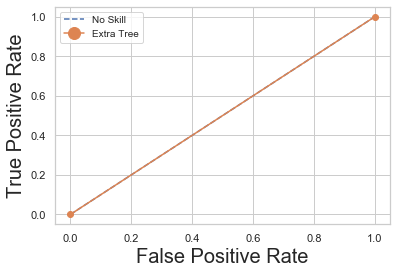

In [205]:
from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
et_probability=model_et.predict_proba(X_test)
et_probability = et_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
et_auc=roc_auc_score(y_test,et_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Extra Tree AUC score = %.3f " %(et_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
et_fpr, et_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(et_fpr, et_tpr, marker='o', label='Extra Tree')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Precision-Recall Curve

Extra Tree: f1=0.000 auc=0.012


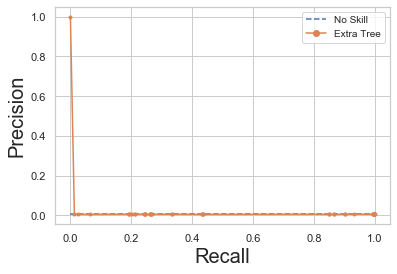

In [206]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
et_probability = model_et.predict_proba(X_test)
# keep probabilities for the positive outcome only
et_probability = et_probability[:, 1]
# predict class values
y_predict = model_et.predict(X_test)
et_precision, et_recall,i = precision_recall_curve(y_test, et_probability)
et_f1, et_auc = f1_score(y_test, y_predict), auc(et_recall, et_precision)
# summarize scores
print('Extra Tree: f1=%.3f auc=%.3f' % (et_f1, et_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(et_recall, et_precision, marker='.', label='Extra Tree')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

### 4) XGBoost Classifier

 Model Feature Importances of a XGBoost Classifier =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


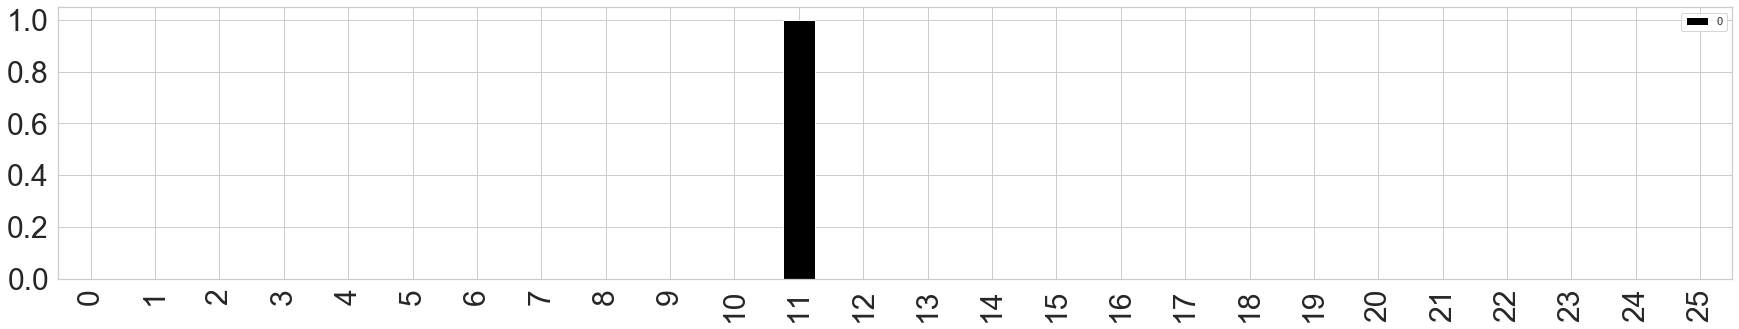

In [207]:
model_xgb=XGBClassifier(max_depth=1,learning_rate=0.1,test_size=0.3,n_estimators=10,n_jobs=1,random_state=5,gamma=0.1)
model_xgb.fit(X_train,y_train)
print(" Model Feature Importances of a XGBoost Classifier = " ,model_xgb.feature_importances_)
feature_importances_xgb=pd.DataFrame(model_xgb.feature_importances_)
feature_importances_xgb.plot(kind='bar',color='black',figsize=(30,5),fontsize=30)

In [208]:
y_train_predict=model_xgb.predict(X_train)
y_predict=model_xgb.predict(X_test)

In [209]:
pd.crosstab(y_test,y_predict,margins=any)

col_0        0.0    All
Bad_label              
0.0        55592  55592
1.0          307    307
All        55899  55899

In [210]:
print(confusion_matrix(y_test,y_predict))
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[55592     0]
 [  307     0]]
Accuracy score of Training =  99.46561373917044
Accuracy score of Testing =  99.45079518417145
Precision score =  98.90460662764019
Recall score =  99.45079518417145
F1 score =  99.17694891746346
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     55592
         1.0       0.00      0.00      0.00       307

    accuracy                           0.99     55899
   macro avg       0.50      0.50      0.50     55899
weighted avg       0.99      0.99      0.99     55899



## ROC Curve

No state AUC score = 0.500 
XGBoost AUC score = 0.591 


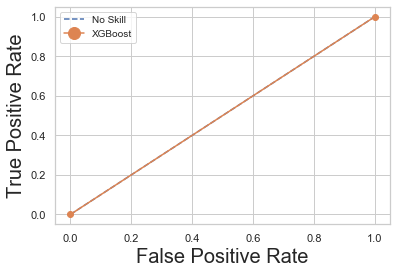

In [211]:
from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
xgb_probability=model_xgb.predict_proba(X_test)
xgb_probability = xgb_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
xgb_auc=roc_auc_score(y_test,xgb_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("XGBoost AUC score = %.3f " %(xgb_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
xgb_fpr, xgb_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='o', label='XGBoost')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Precision-Recall Curve

XGBoost: f1=0.000 auc=0.263


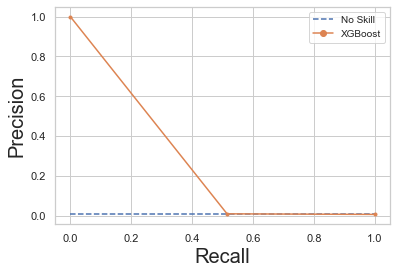

In [212]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
xgb_probability = model_xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_probability = xgb_probability[:, 1]
# predict class values
y_predict = model_xgb.predict(X_test)
xgb_precision, xgb_recall,i = precision_recall_curve(y_test, xgb_probability)
xgb_f1,xgb_auc = f1_score(y_test, y_predict), auc(xgb_recall, xgb_precision)
# summarize scores
print('XGBoost: f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(xgb_recall, xgb_precision, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

### 5) Gradient Boosting Classifier

 Model Feature Importances of a Gradient Boosting Classifier =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


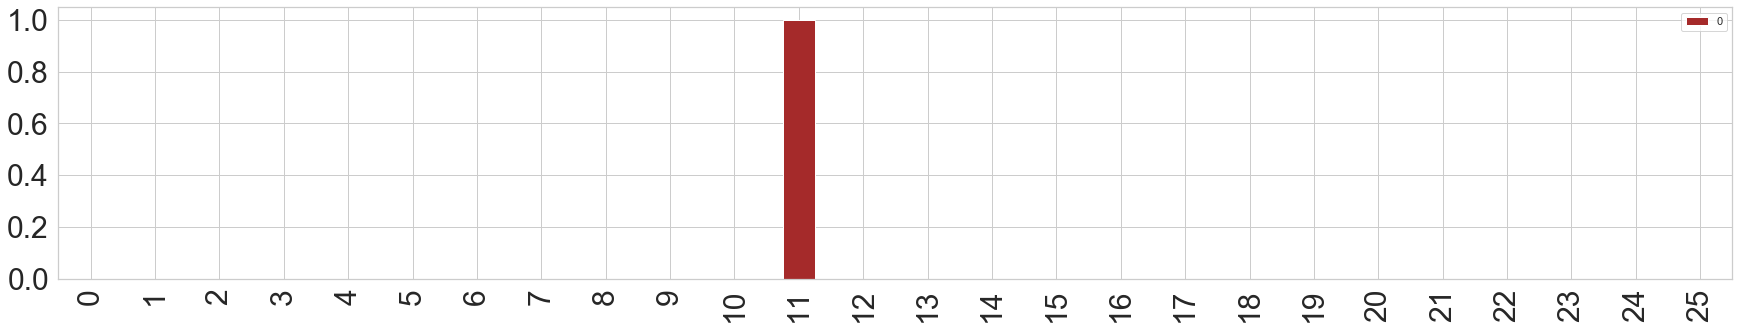

In [213]:
model_gb=GradientBoostingClassifier(learning_rate=0.1,n_estimators=10,subsample=1.0,max_depth=1,random_state=5)
model_gb.fit(X_train,y_train)
print(" Model Feature Importances of a Gradient Boosting Classifier = " ,model_gb.feature_importances_)
feature_importances_gb=pd.DataFrame(model_gb.feature_importances_)
feature_importances_gb.plot(kind='bar',color='brown',figsize=(30,5),fontsize=30)

In [214]:
y_train_predict=model_gb.predict(X_train)
y_predict=model_gb.predict(X_test)

In [215]:
pd.crosstab(y_test,y_predict,margins=any)

col_0        0.0    All
Bad_label              
0.0        55592  55592
1.0          307    307
All        55899  55899

In [216]:
print(confusion_matrix(y_test,y_predict))
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[55592     0]
 [  307     0]]
Accuracy score of Training =  99.46561373917044
Accuracy score of Testing =  99.45079518417145
Precision score =  98.90460662764019
Recall score =  99.45079518417145
F1 score =  99.17694891746346
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     55592
         1.0       0.00      0.00      0.00       307

    accuracy                           0.99     55899
   macro avg       0.50      0.50      0.50     55899
weighted avg       0.99      0.99      0.99     55899



## ROC Curve

No state AUC score = 0.500 
Gradient Boosting AUC score = 0.634 


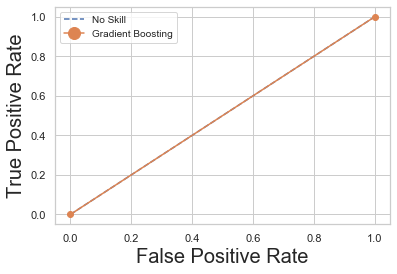

In [217]:
from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
gb_probability=model_gb.predict_proba(X_test)
gb_probability = gb_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
gb_auc=roc_auc_score(y_test,gb_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Gradient Boosting AUC score = %.3f " %(gb_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
gb_fpr, gb_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(gb_fpr, gb_tpr, marker='o', label='Gradient Boosting')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Precision-Recall Curve

Gradient Boosting: f1=0.000 auc=0.208


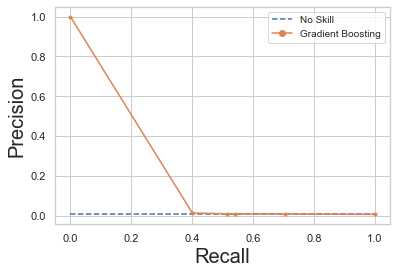

In [218]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
gb_probability = model_gb.predict_proba(X_test)
# keep probabilities for the positive outcome only
gb_probability = gb_probability[:, 1]
# predict class values
y_predict = model_gb.predict(X_test)
gb_precision, gb_recall,i = precision_recall_curve(y_test, gb_probability)
gb_f1,gb_auc = f1_score(y_test, y_predict), auc(gb_recall, gb_precision)
# summarize scores
print('Gradient Boosting: f1=%.3f auc=%.3f' % (gb_f1, gb_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(gb_recall, gb_precision, marker='.', label='Gradient Boosting')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## 6) Logistic Regression

Model Feature Importances of a Logistic Regression =  [-1.35380938e-07 -3.23536769e-06 -1.25371144e-07 -3.04724113e-08
  4.82390654e-09 -6.20642165e-06 -3.93811063e-07 -9.78101951e-06
 -4.23579645e-07 -8.39074241e-10 -4.84517805e-08 -4.00212780e-07
 -6.17783594e-07 -6.99257890e-06 -1.46496614e-07 -3.22570755e-07
  6.13873201e-07 -6.18846983e-07  1.72631539e-10  1.28515166e-07
 -1.01595767e-06  5.81261059e-06 -7.24789946e-07  2.39493789e-07
 -2.75647493e-05 -9.01837458e-07]


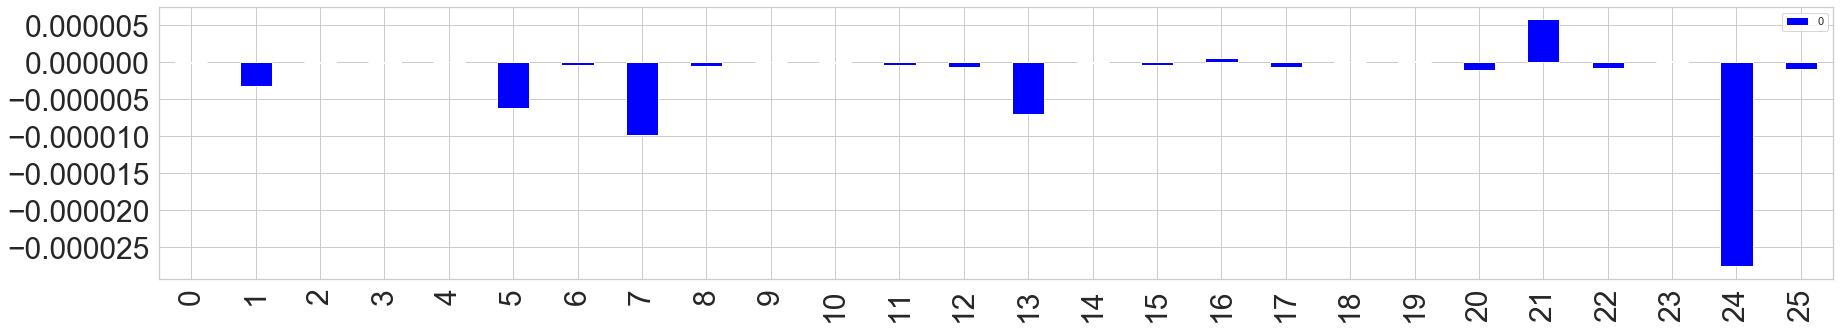

In [219]:
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)
print("Model Feature Importances of a Logistic Regression = ", model_lr.coef_[0])
feature_importances_lr=pd.DataFrame(model_lr.coef_[0])
feature_importances_lr.plot(kind='bar',color='blue',figsize=(30,5),fontsize=30)
y_train_predict=model_lr.predict(X_train)
y_predict=model_lr.predict(X_test)

In [220]:
pd.crosstab(y_test,y_predict,margins=any)

col_0        0.0    All
Bad_label              
0.0        55592  55592
1.0          307    307
All        55899  55899

In [221]:
print(confusion_matrix(y_test,y_predict))
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

[[55592     0]
 [  307     0]]
Accuracy score of Training =  99.46561373917044
Accuracy score of Testing =  99.45079518417145
Precision score =  98.90460662764019
Recall score =  99.45079518417145
F1 score =  99.17694891746346
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     55592
         1.0       0.00      0.00      0.00       307

    accuracy                           0.99     55899
   macro avg       0.50      0.50      0.50     55899
weighted avg       0.99      0.99      0.99     55899



## ROC Curve

No state AUC score = 0.500 
Logistic Regression AUC score = 0.478 


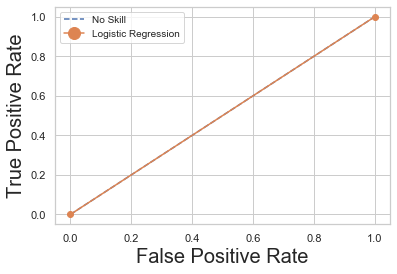

In [222]:
from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
lr_probability=model_lr.predict_proba(X_test)
lr_probability = lr_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
lr_auc=roc_auc_score(y_test,lr_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Logistic Regression AUC score = %.3f " %(lr_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
lr_fpr, lr_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='o', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Precision-Recall Curve

Logistic Regression: f1=0.000 auc=0.005


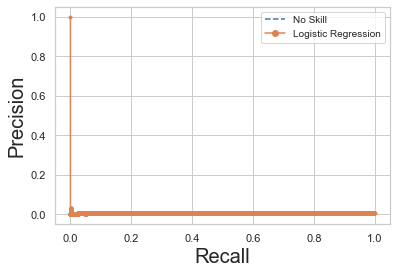

In [223]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
lr_probability = model_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probability = lr_probability[:, 1]
# predict class values
y_predict = model_lr.predict(X_test)
lr_precision, lr_recall,i = precision_recall_curve(y_test, lr_probability)
lr_f1,lr_auc = f1_score(y_test, y_predict), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

# ---------------------------------------------------------------------------------------------------------------

## 3.3] Merging Cust_Enquiry with Cust_Demographics and implementing the model 

In [224]:
data3.head()

dt_opened  customer_no  upload_dt  enquiry_dt  enq_purpose    enq_amt  \
0        101            1  21-Apr-15        2244          2.0  3500000.0   
1        101            1  21-Apr-15         574          5.0   500000.0   
2        101            1  21-Apr-15         574          0.0    50000.0   
3        101            1  21-Apr-15        2627         10.0    50000.0   
4        101            1  21-Apr-15        1304         10.0     1000.0   

   mean_diff_open_enquiry_dt  max_freq_enquiry  
0                      -2143              10.0  
1                       -473              10.0  
2                       -473              10.0  
3                      -2526              10.0  
4                      -1203              10.0

In [225]:
Bad_label=data2['Bad_label']
data_Enquiry_Demographics=data3.join(Bad_label)
data_Enquiry_Demographics.head()

dt_opened  customer_no  upload_dt  enquiry_dt  enq_purpose    enq_amt  \
0        101            1  21-Apr-15        2244          2.0  3500000.0   
1        101            1  21-Apr-15         574          5.0   500000.0   
2        101            1  21-Apr-15         574          0.0    50000.0   
3        101            1  21-Apr-15        2627         10.0    50000.0   
4        101            1  21-Apr-15        1304         10.0     1000.0   

   mean_diff_open_enquiry_dt  max_freq_enquiry  Bad_label  
0                      -2143              10.0        0.0  
1                       -473              10.0        0.0  
2                       -473              10.0        0.0  
3                      -2526              10.0        0.0  
4                      -1203              10.0        0.0

In [226]:
data_Enquiry_Demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413188 entries, 0 to 413187
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   dt_opened                  413188 non-null  int32  
 1   customer_no                413188 non-null  int64  
 2   upload_dt                  413188 non-null  object 
 3   enquiry_dt                 413188 non-null  int32  
 4   enq_purpose                413188 non-null  float64
 5   enq_amt                    413188 non-null  float64
 6   mean_diff_open_enquiry_dt  413188 non-null  int32  
 7   max_freq_enquiry           413188 non-null  float64
 8   Bad_label                  23896 non-null   float64
dtypes: float64(4), int32(3), int64(1), object(1)
memory usage: 23.6+ MB


In [227]:
data_Enquiry_Demographics.describe()

dt_opened    customer_no     enquiry_dt    enq_purpose  \
count  413188.000000  413188.000000  413188.000000  413188.000000   
mean       98.525146   11399.813414    1946.457690       8.154920   
std        57.951794    6672.675047    1052.992594       5.637395   
min         0.000000       1.000000       0.000000       0.000000   
25%        48.000000    5999.000000    1061.000000       5.000000   
50%        95.000000   11067.000000    1975.000000      10.000000   
75%       152.000000   16856.000000    2845.000000      10.000000   
max       196.000000   23896.000000    3770.000000      59.000000   

            enq_amt  mean_diff_open_enquiry_dt  max_freq_enquiry     Bad_label  
count  4.131880e+05              413188.000000          413188.0  23896.000000  
mean   8.290210e+05               -1847.932544              10.0      0.042015  
std    1.204272e+07                1054.695032               0.0      0.200628  
min    1.000000e+00               -3769.000000              10.0      0.000000  
25%    1.000000e+04               -2747.000000              10.0      0.000000  
50%    5.000000e+04               -1873.000000              10.0      0.000000  
75%    1.430000e+05                -961.000000              10.0      0.000000  
max    1.000000e+09                 195.000000              10.0      1.000000

In [228]:
data_Enquiry_Demographics.dtypes

dt_opened                      int32
customer_no                    int64
upload_dt                     object
enquiry_dt                     int32
enq_purpose                  float64
enq_amt                      float64
mean_diff_open_enquiry_dt      int32
max_freq_enquiry             float64
Bad_label                    float64
dtype: object

In [229]:
data_Enquiry_Demographics.columns

Index(['dt_opened', 'customer_no', 'upload_dt', 'enquiry_dt', 'enq_purpose',
       'enq_amt', 'mean_diff_open_enquiry_dt', 'max_freq_enquiry',
       'Bad_label'],
      dtype='object')

In [230]:
data_Enquiry_Demographics.isna().sum().to_frame().T

dt_opened  customer_no  upload_dt  enquiry_dt  enq_purpose  enq_amt  \
0          0            0          0           0            0        0   

   mean_diff_open_enquiry_dt  max_freq_enquiry  Bad_label  
0                          0                 0     389292

In [231]:
data_Enquiry_Demographics.fillna(method='ffill',inplace=True)

In [232]:
data_Enquiry_Demographics.isna().sum().to_frame().T

dt_opened  customer_no  upload_dt  enquiry_dt  enq_purpose  enq_amt  \
0          0            0          0           0            0        0   

   mean_diff_open_enquiry_dt  max_freq_enquiry  Bad_label  
0                          0                 0          0

In [233]:
data_Enquiry_Demographics.count()

dt_opened                    413188
customer_no                  413188
upload_dt                    413188
enquiry_dt                   413188
enq_purpose                  413188
enq_amt                      413188
mean_diff_open_enquiry_dt    413188
max_freq_enquiry             413188
Bad_label                    413188
dtype: int64

### Detecting the outliers

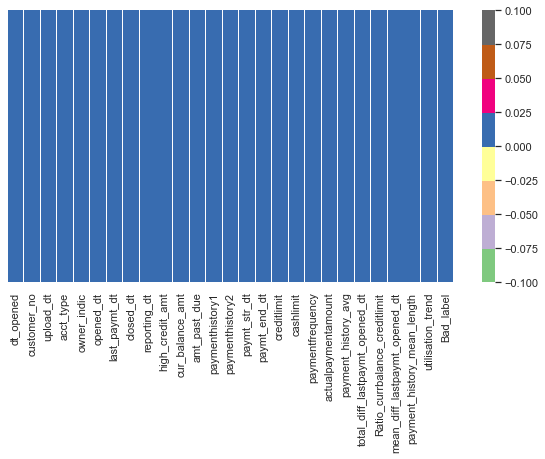

In [234]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.heatmap(data_Account_Demographics.isnull(),yticklabels=False,cbar=True,cmap='Accent')

### Generating Correlation Matrix for Cust_Enquiry_Demographics data

In [235]:
corr_Enquiry_Demographics=data_Enquiry_Demographics.corr()
corr_Enquiry_Demographics

dt_opened  customer_no  enquiry_dt  enq_purpose  \
dt_opened                   1.000000     0.104641   -0.001883    -0.000519   
customer_no                 0.104641     1.000000    0.002824    -0.010924   
enquiry_dt                 -0.001883     0.002824    1.000000    -0.008608   
enq_purpose                -0.000519    -0.010924   -0.008608     1.000000   
enq_amt                     0.002975    -0.014090   -0.005866     0.050614   
mean_diff_open_enquiry_dt   0.056826     0.002931   -0.998489     0.008566   
max_freq_enquiry                 NaN          NaN         NaN          NaN   
Bad_label                  -0.012873    -0.079485   -0.000044     0.000710   

                            enq_amt  mean_diff_open_enquiry_dt  \
dt_opened                  0.002975                   0.056826   
customer_no               -0.014090                   0.002931   
enquiry_dt                -0.005866                  -0.998489   
enq_purpose                0.050614                   0.008566   
enq_amt                    1.000000                   0.006020   
mean_diff_open_enquiry_dt  0.006020                   1.000000   
max_freq_enquiry                NaN                        NaN   
Bad_label                  0.006094                  -0.000663   

                           max_freq_enquiry  Bad_label  
dt_opened                               NaN  -0.012873  
customer_no                             NaN  -0.079485  
enquiry_dt                              NaN  -0.000044  
enq_purpose                             NaN   0.000710  
enq_amt                                 NaN   0.006094  
mean_diff_open_enquiry_dt               NaN  -0.000663  
max_freq_enquiry                        NaN        NaN  
Bad_label                               NaN   1.000000

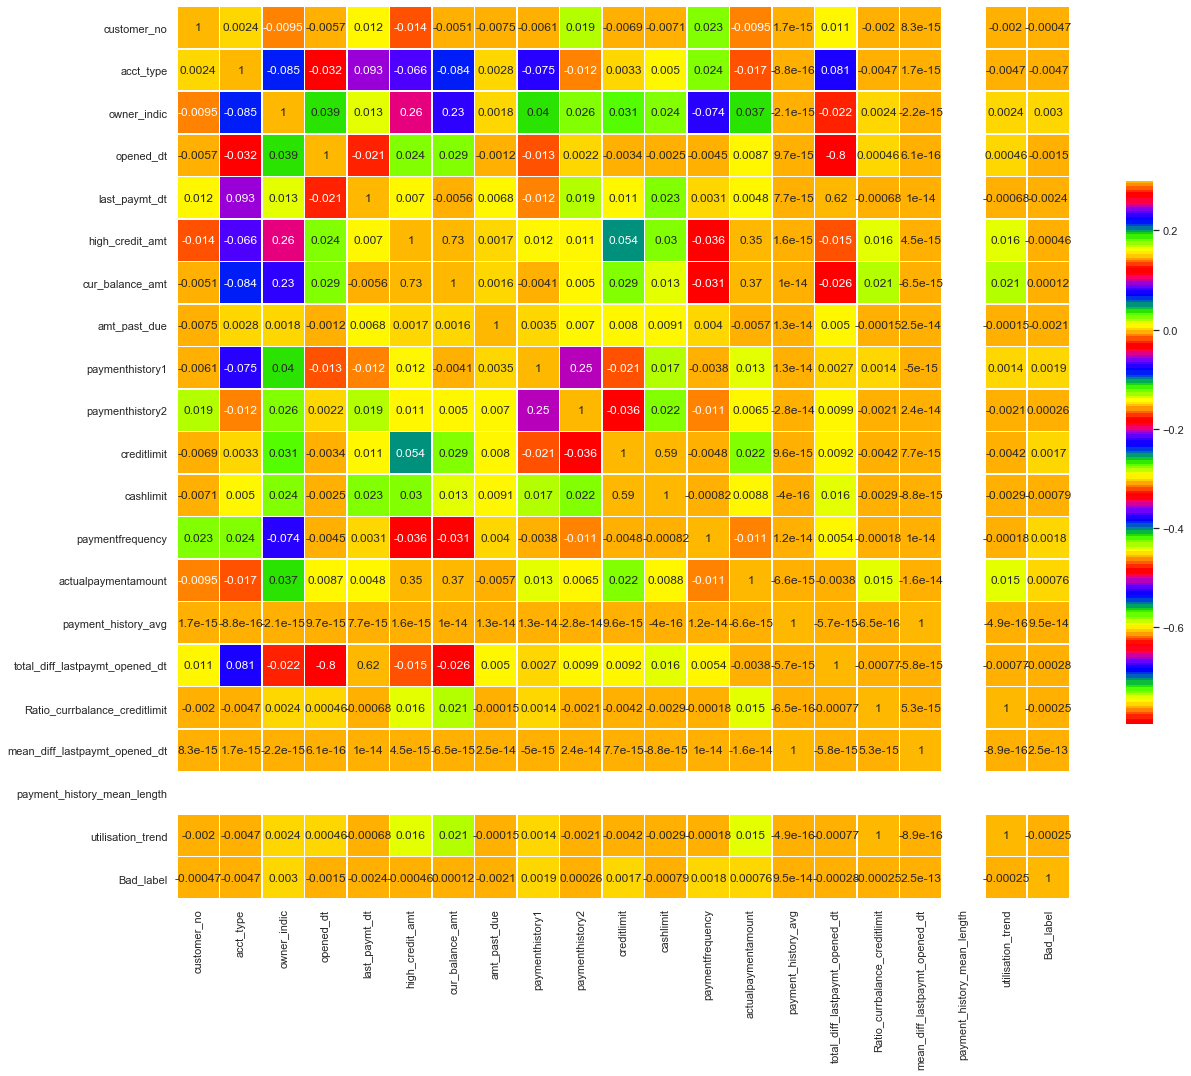

In [236]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_Account_Demographics, cmap='prism', vmax=.3, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5}, annot=True)

### Using Label Encoding to convert the categorical data into numericals

In [237]:
enc= LabelEncoder()
data_Enquiry_Demographics.upload_dt=enc.fit_transform(data_Enquiry_Demographics.upload_dt)

In [238]:
data_Enquiry_Demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413188 entries, 0 to 413187
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   dt_opened                  413188 non-null  int32  
 1   customer_no                413188 non-null  int64  
 2   upload_dt                  413188 non-null  int32  
 3   enquiry_dt                 413188 non-null  int32  
 4   enq_purpose                413188 non-null  float64
 5   enq_amt                    413188 non-null  float64
 6   mean_diff_open_enquiry_dt  413188 non-null  int32  
 7   max_freq_enquiry           413188 non-null  float64
 8   Bad_label                  413188 non-null  float64
dtypes: float64(4), int32(4), int64(1)
memory usage: 22.1 MB


### Define X and y variables

In [239]:
X = data_Enquiry_Demographics.loc[:,data_Enquiry_Demographics.columns!='Bad_label']
X.head()

dt_opened  customer_no  upload_dt  enquiry_dt  enq_purpose    enq_amt  \
0        101            1         46        2244          2.0  3500000.0   
1        101            1         46         574          5.0   500000.0   
2        101            1         46         574          0.0    50000.0   
3        101            1         46        2627         10.0    50000.0   
4        101            1         46        1304         10.0     1000.0   

   mean_diff_open_enquiry_dt  max_freq_enquiry  
0                      -2143              10.0  
1                       -473              10.0  
2                       -473              10.0  
3                      -2526              10.0  
4                      -1203              10.0

In [240]:
y = data_Enquiry_Demographics.Bad_label
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Bad_label, dtype: float64

### Splitting the data into training data and testing data using train-test split

In [241]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5)
print("X_train shape = ",X_train.shape)
print("X_test shape = ",X_test.shape)
print("y_train shape = ",y_train.shape)
print("y_test shape = ",y_test.shape)

X_train shape =  (289231, 8)
X_test shape =  (123957, 8)
y_train shape =  (289231,)
y_test shape =  (123957,)


## 1) Random Forest Classifier

 Model Feature Importances of a Random Forest Classifier =  [0.2 0.4 0.2 0.1 0.  0.1 0.  0. ]
[[123646      0]
 [   311      0]]
Accuracy of Training =  99.76039912734113
Accuracy of Testing =  99.74910654501159
Precision score =  99.49884256528073
Recall score =  99.74910654501159
F1 score =  99.62381738399374
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    123646
         1.0       0.00      0.00      0.00       311

    accuracy                           1.00    123957
   macro avg       0.50      0.50      0.50    123957
weighted avg       0.99      1.00      1.00    123957



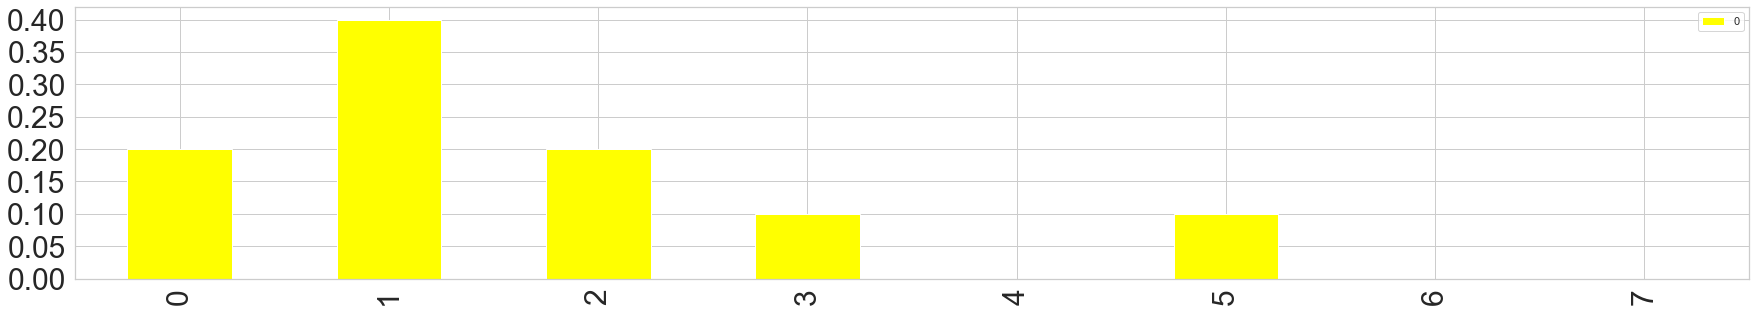

In [242]:
model_rf=RandomForestClassifier(n_estimators=10,criterion="gini",max_depth=1,n_jobs=1,random_state=5)
model_rf.fit(X_train,y_train)
print(" Model Feature Importances of a Random Forest Classifier = " ,model_rf.feature_importances_)
feature_importances_rf=pd.DataFrame(model_rf.feature_importances_)
feature_importances_rf.plot(kind='bar',color='yellow',figsize=(30,5),fontsize=30)
y_train_predict=model_rf.predict(X_train)
y_predict=model_rf.predict(X_test)
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=any)
print("Accuracy of Training = ", accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

## ROC Curve

No state AUC score = 0.500 
Random Forest AUC score = 0.972 


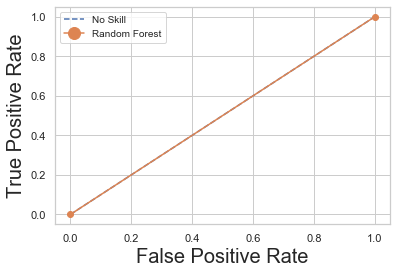

In [243]:
from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
rf_probability=model_rf.predict_proba(X_test)
rf_probability = rf_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
rf_auc=roc_auc_score(y_test,rf_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Random Forest AUC score = %.3f " %(rf_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
rf_fpr, rf_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='o', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Precision-Recall Curve

Random forest: f1=0.000 auc=0.046


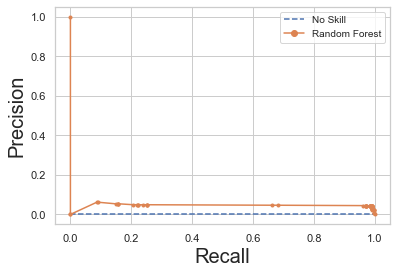

In [244]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
rf_probability = model_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
rf_probability = rf_probability[:, 1]
# predict class values
y_predict = model_rf.predict(X_test)
rf_precision, rf_recall,i = precision_recall_curve(y_test, rf_probability)
rf_f1, rf_auc = f1_score(y_test, y_predict), auc(rf_recall, rf_precision)
# summarize scores
print('Random forest: f1=%.3f auc=%.3f' % (rf_f1, rf_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(rf_recall, rf_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## 2) Decision Tree Classifier

Model Feature Importances of a Decision Tree Classifier =  [0. 1. 0. 0. 0. 0. 0. 0.]
[[123646      0]
 [   311      0]]
Accuracy of Training =  99.76039912734113
Accuracy of Testing =  99.74910654501159
Precision score =  99.49884256528073
Recall score =  99.74910654501159
F1 score =  99.62381738399374
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    123646
         1.0       0.00      0.00      0.00       311

    accuracy                           1.00    123957
   macro avg       0.50      0.50      0.50    123957
weighted avg       0.99      1.00      1.00    123957



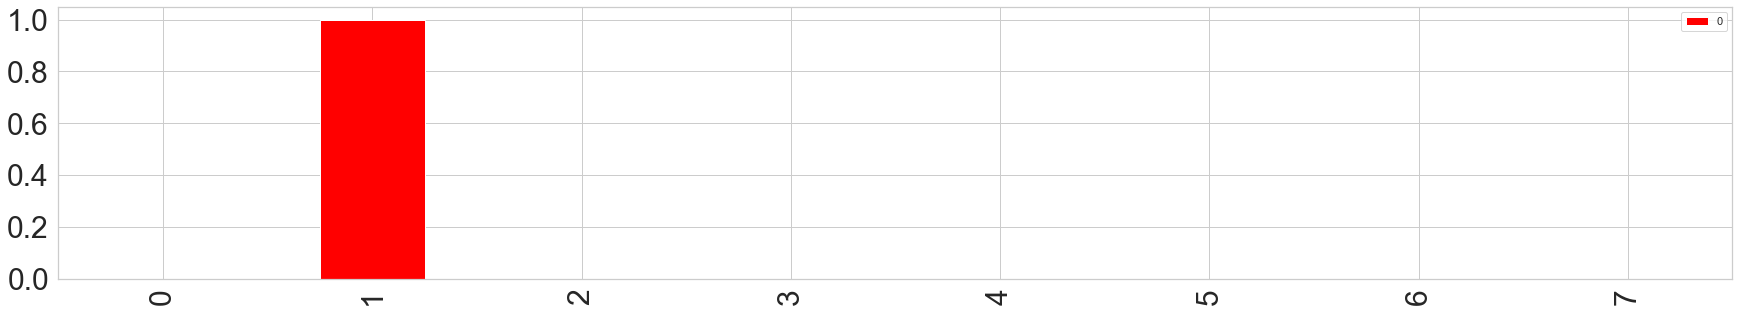

In [245]:
model_dt=DecisionTreeClassifier(splitter='best',criterion="gini",max_depth=1,random_state=5)
model_dt.fit(X_train,y_train)
print("Model Feature Importances of a Decision Tree Classifier = " ,model_dt.feature_importances_)
feature_importances_dt=pd.DataFrame(model_dt.feature_importances_)
feature_importances_dt.plot(kind='bar',color='red',figsize=(30,5),fontsize=30)
y_train_predict=model_dt.predict(X_train)
y_predict=model_dt.predict(X_test)
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=any)
print("Accuracy of Training = ", accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

## ROC Curve

No state AUC score = 0.500 
Decision Tree AUC score = 0.967 


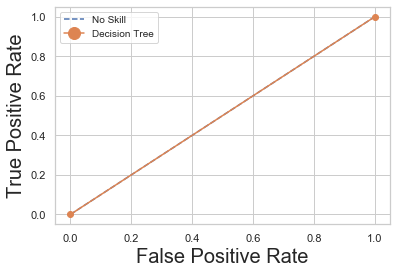

In [246]:
from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
dt_probability=model_dt.predict_proba(X_test)
dt_probability = dt_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
dt_auc=roc_auc_score(y_test,dt_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Decision Tree AUC score = %.3f " %(dt_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
dt_fpr, dt_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(dt_fpr, dt_tpr, marker='o', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Precision-Recall Curve

Decision Tree: f1=0.000 auc=0.516


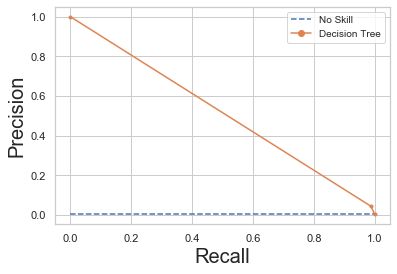

In [247]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
dt_probability = model_dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
dt_probability = dt_probability[:, 1]
# predict class values
y_predict = model_dt.predict(X_test)
dt_precision, dt_recall,i = precision_recall_curve(y_test, dt_probability)
dt_f1, dt_auc = f1_score(y_test, y_predict), auc(dt_recall, dt_precision)
# summarize scores
print('Decision Tree: f1=%.3f auc=%.3f' % (dt_f1, dt_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(dt_recall, dt_precision, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## 3) Extra Trees Classifier

 Model Feature Importances of a Extra Trees Classifier  =  [0.2 0.3 0.1 0.1 0.1 0.2 0.  0. ]
[[123646      0]
 [   311      0]]
Accuracy of Training =  99.76039912734113
Accuracy of Testing =  99.74910654501159
Precision score =  99.49884256528073
Recall score =  99.74910654501159
F1 score =  99.62381738399374
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    123646
         1.0       0.00      0.00      0.00       311

    accuracy                           1.00    123957
   macro avg       0.50      0.50      0.50    123957
weighted avg       0.99      1.00      1.00    123957



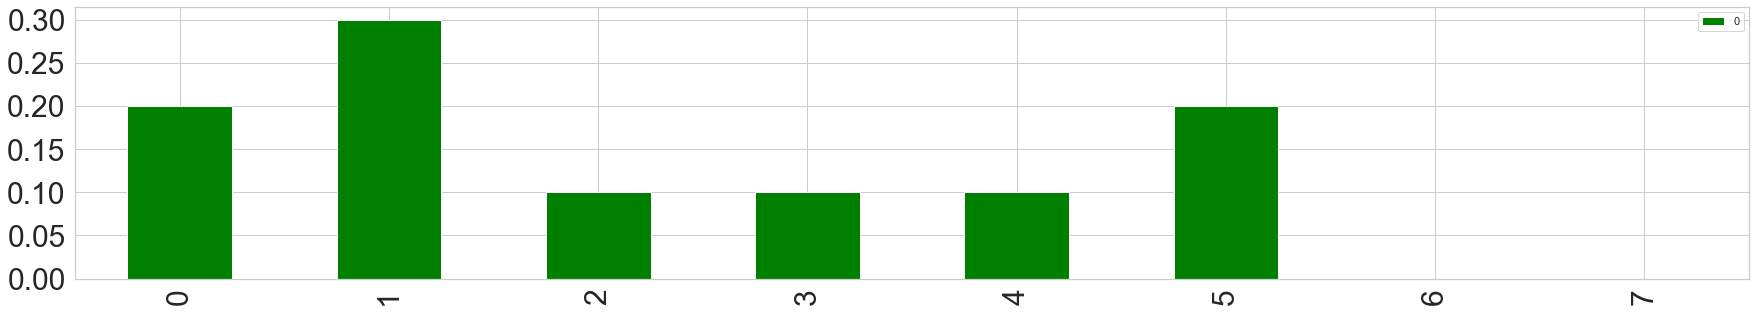

In [248]:
model_et=ExtraTreesClassifier(n_estimators=10,n_jobs=1,criterion="gini",max_depth=1,random_state=5)
model_et.fit(X_train,y_train)
print(" Model Feature Importances of a Extra Trees Classifier  = " ,model_et.feature_importances_)
feature_importances_et=pd.DataFrame(model_et.feature_importances_)
feature_importances_et.plot(kind='bar',color='green',figsize=(30,5),fontsize=30)
y_train_predict=model_et.predict(X_train)
y_predict=model_et.predict(X_test)
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=any)
print("Accuracy of Training = ", accuracy_score(y_train,y_train_predict)*100)
print("Accuracy of Testing = ", accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

## ROC Curve

No state AUC score = 0.500 
Extra Tree AUC score = 0.920 


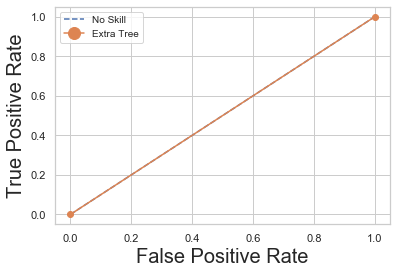

In [249]:
from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
et_probability=model_et.predict_proba(X_test)
et_probability = et_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
et_auc=roc_auc_score(y_test,et_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Extra Tree AUC score = %.3f " %(et_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
et_fpr, et_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(et_fpr, et_tpr, marker='o', label='Extra Tree')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Precision-Recall Curve

Extra Tree: f1=0.000 auc=0.015


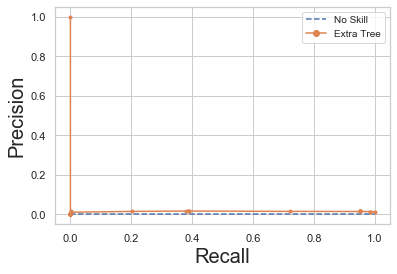

In [250]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
et_probability = model_et.predict_proba(X_test)
# keep probabilities for the positive outcome only
et_probability = et_probability[:, 1]
# predict class values
y_predict = model_et.predict(X_test)
et_precision, et_recall,i = precision_recall_curve(y_test, et_probability)
et_f1, et_auc = f1_score(y_test, y_predict), auc(et_recall, et_precision)
# summarize scores
print('Extra Tree: f1=%.3f auc=%.3f' % (et_f1, et_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(et_recall, et_precision, marker='.', label='Extra Tree')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## 4) XGBoost Classifier

 Model Feature Importances of a XGBoost Classifier =  [0. 1. 0. 0. 0. 0. 0. 0.]
[[123646      0]
 [   311      0]]
Accuracy score of Training =  99.76039912734113
Accuracy score of Testing =  99.74910654501159
Precision score =  99.49884256528073
Recall score =  99.74910654501159
F1 score =  99.62381738399374
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    123646
         1.0       0.00      0.00      0.00       311

    accuracy                           1.00    123957
   macro avg       0.50      0.50      0.50    123957
weighted avg       0.99      1.00      1.00    123957



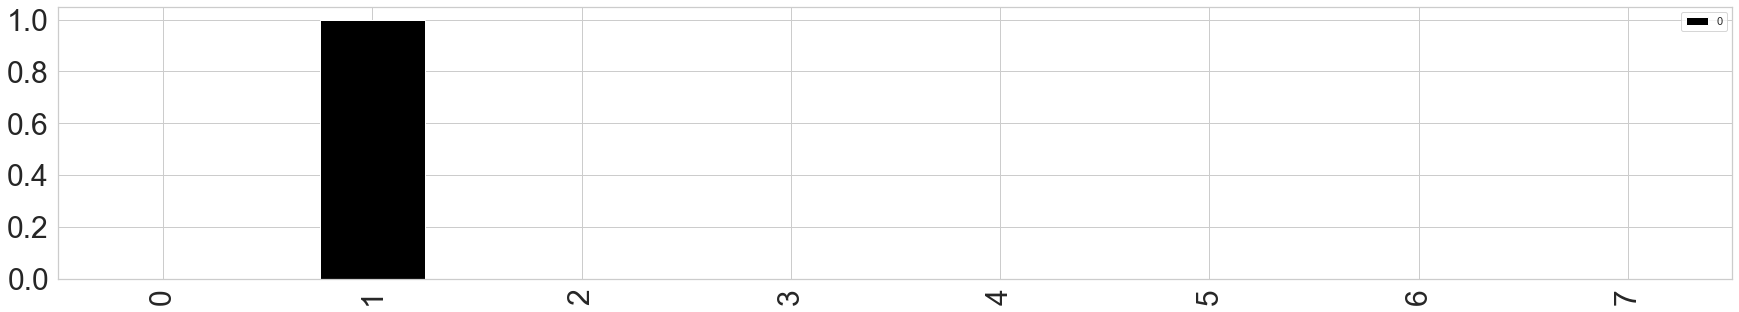

In [251]:
model_xgb=XGBClassifier(max_depth=1,learning_rate=0.1,test_size=0.3,n_estimators=10,n_jobs=1,random_state=5,gamma=0.1)
model_xgb.fit(X_train,y_train)
print(" Model Feature Importances of a XGBoost Classifier = " ,model_xgb.feature_importances_)
feature_importances_xgb=pd.DataFrame(model_xgb.feature_importances_)
feature_importances_xgb.plot(kind='bar',color='black',figsize=(30,5),fontsize=30)
y_train_predict=model_xgb.predict(X_train)
y_predict=model_xgb.predict(X_test)
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=any)
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

## ROC Curve

No state AUC score = 0.500 
XGBoost AUC score = 0.968 


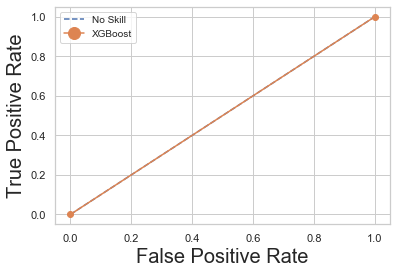

In [252]:
from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
xgb_probability=model_xgb.predict_proba(X_test)
xgb_probability = xgb_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
xgb_auc=roc_auc_score(y_test,xgb_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("XGBoost AUC score = %.3f " %(xgb_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
xgb_fpr, xgb_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(xgb_fpr, xgb_tpr, marker='o', label='XGBoost')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Precision-Recall Curve

XGBoost: f1=0.000 auc=0.508


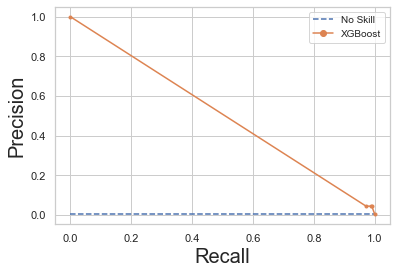

In [253]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
xgb_probability = model_xgb.predict_proba(X_test)
# keep probabilities for the positive outcome only
xgb_probability = xgb_probability[:, 1]
# predict class values
y_predict = model_xgb.predict(X_test)
xgb_precision, xgb_recall,i = precision_recall_curve(y_test, xgb_probability)
xgb_f1,xgb_auc = f1_score(y_test, y_predict), auc(xgb_recall, xgb_precision)
# summarize scores
print('XGBoost: f1=%.3f auc=%.3f' % (xgb_f1, xgb_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(xgb_recall, xgb_precision, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## 5) Gradient Boosting Classifier

 Model Feature Importances of a Gradient Boosting Classifier =  [0. 1. 0. 0. 0. 0. 0. 0.]
[[123646      0]
 [   311      0]]
Accuracy score of Training =  99.76039912734113
Accuracy score of Testing =  99.74910654501159
Precision score =  99.49884256528073
Recall score =  99.74910654501159
F1 score =  99.62381738399374
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    123646
         1.0       0.00      0.00      0.00       311

    accuracy                           1.00    123957
   macro avg       0.50      0.50      0.50    123957
weighted avg       0.99      1.00      1.00    123957



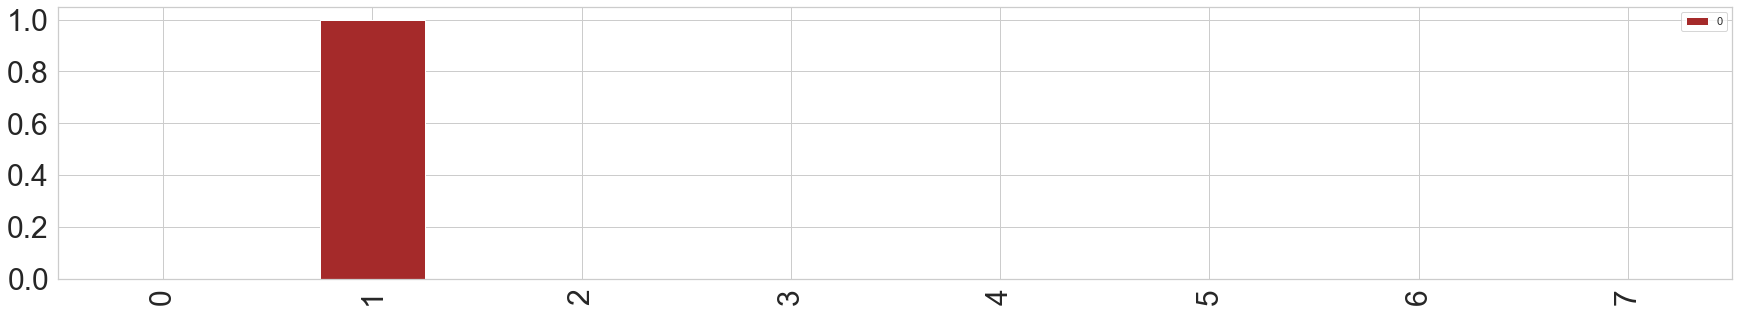

In [254]:
model_gb=GradientBoostingClassifier(learning_rate=0.1,n_estimators=10,subsample=1.0,max_depth=1,random_state=5)
model_gb.fit(X_train,y_train)
print(" Model Feature Importances of a Gradient Boosting Classifier = " ,model_gb.feature_importances_)
feature_importances_gb=pd.DataFrame(model_gb.feature_importances_)
feature_importances_gb.plot(kind='bar',color='brown',figsize=(30,5),fontsize=30)
y_train_predict=model_gb.predict(X_train)
y_predict=model_gb.predict(X_test)
print(confusion_matrix(y_test,y_predict))
pd.crosstab(y_test,y_predict,margins=any)
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

## ROC Curve

No state AUC score = 0.500 
Gradient Boosting AUC score = 0.973 


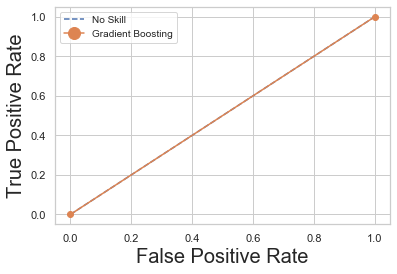

In [255]:
from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
gb_probability=model_gb.predict_proba(X_test)
gb_probability = gb_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
gb_auc=roc_auc_score(y_test,gb_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Gradient Boosting AUC score = %.3f " %(gb_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
gb_fpr, gb_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(gb_fpr, gb_tpr, marker='o', label='Gradient Boosting')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Precision-Recall Curve

Gradient Boosting: f1=0.000 auc=0.499


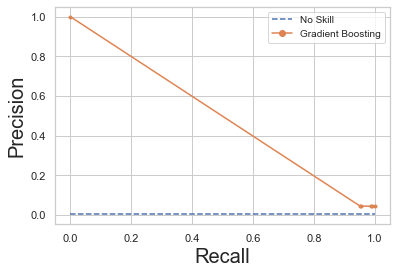

In [256]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
gb_probability = model_gb.predict_proba(X_test)
# keep probabilities for the positive outcome only
gb_probability = gb_probability[:, 1]
# predict class values
y_predict = model_gb.predict(X_test)
gb_precision, gb_recall,i = precision_recall_curve(y_test, gb_probability)
gb_f1,gb_auc = f1_score(y_test, y_predict), auc(gb_recall, gb_precision)
# summarize scores
print('Gradient Boosting: f1=%.3f auc=%.3f' % (gb_f1, gb_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(gb_recall, gb_precision, marker='.', label='Gradient Boosting')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## 6) Logistic Regression

Model Feature Importances of a Logistic Regression =  [-2.57382151e-05 -2.34609104e-03 -9.85792986e-06 -5.11070290e-04
 -2.36968842e-06 -6.02711286e-09  4.85332075e-04 -2.68666786e-06]
[[123645      1]
 [   311      0]]
Accuracy score of Training =  99.76039912734113
Accuracy score of Testing =  99.74829981364506
Precision score =  99.4988405463064
Recall score =  99.74829981364506
F1 score =  99.62341401731776
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    123646
         1.0       0.00      0.00      0.00       311

    accuracy                           1.00    123957
   macro avg       0.50      0.50      0.50    123957
weighted avg       0.99      1.00      1.00    123957



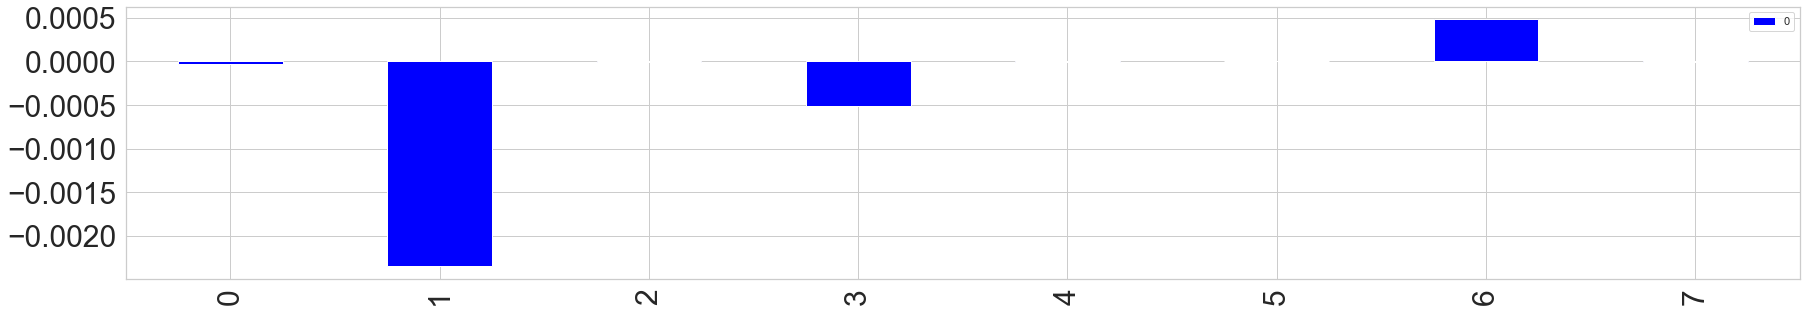

In [257]:
model_lr=LogisticRegression()
model_lr.fit(X_train,y_train)
print("Model Feature Importances of a Logistic Regression = ", model_lr.coef_[0])
feature_importances_lr=pd.DataFrame(model_lr.coef_[0])
feature_importances_lr.plot(kind='bar',color='blue',figsize=(30,5),fontsize=30)
y_train_predict=model_lr.predict(X_train)
y_predict=model_lr.predict(X_test)
pd.crosstab(y_test,y_predict,margins=any)
print(confusion_matrix(y_test,y_predict))
print("Accuracy score of Training = ",accuracy_score(y_train,y_train_predict)*100)
print("Accuracy score of Testing = ",accuracy_score(y_test,y_predict)*100)
print("Precision score = ",(precision_score(y_test,y_predict,average='weighted')*100))
print("Recall score = ",(recall_score(y_test,y_predict,average='weighted')*100))
print("F1 score = ",(f1_score(y_test,y_predict,average='weighted')*100))
print(classification_report(y_test,y_predict))

## ROC Curve

No state AUC score = 0.500 
Logistic Regression AUC score = 0.968 


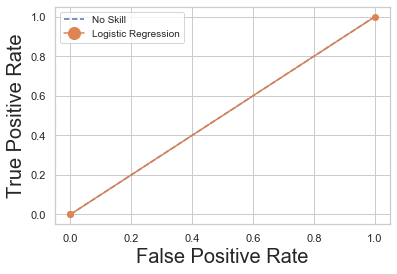

In [258]:
from sklearn.metrics import roc_curve,roc_auc_score
nostate_probability=[0 for i in range(len(y_test))]
lr_probability=model_lr.predict_proba(X_test)
lr_probability = lr_probability[:, 1]
# Calculating the roc_auc scores
nostate_auc=roc_auc_score(y_test,nostate_probability)
lr_auc=roc_auc_score(y_test,lr_probability)
print("No state AUC score = %.3f "%(nostate_auc))
print("Logistic Regression AUC score = %.3f " %(lr_auc))
nostate_fpr, nostate_tpr,i= roc_curve(y_test, nostate_probability)
lr_fpr, lr_tpr,i = roc_curve(y_test,y_predict)
# plot the roc curve for the model
pyplot.plot(nostate_fpr, nostate_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='o', label='Logistic Regression')
# axis labels
pyplot.xlabel('False Positive Rate',fontsize=20)
pyplot.ylabel('True Positive Rate',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()

## Precision-Recall Curve

Logistic Regression: f1=0.000 auc=0.038


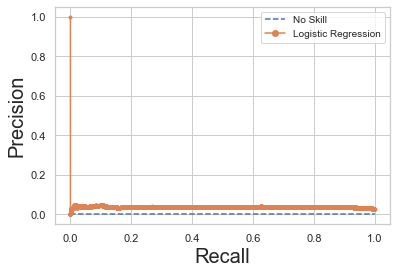

In [259]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
# predict probabilities
lr_probability = model_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probability = lr_probability[:, 1]
# predict class values
y_predict = model_lr.predict(X_test)
lr_precision, lr_recall,i = precision_recall_curve(y_test, lr_probability)
lr_f1,lr_auc = f1_score(y_test, y_predict), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic Regression: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic Regression')
# axis labels
pyplot.xlabel('Recall',fontsize=20)
pyplot.ylabel('Precision',fontsize=20)
# show the legend
pyplot.legend(loc='best',markerscale=2.0,fontsize=10)
# show the plot
pyplot.show()